In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta

In [0]:
df_patient=pd.read_csv('H:/DATA_SET/coronavirusdataset/patient.csv')
df_patient.tail()


,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
5323,5324,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5324,5325,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5325,5326,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5326,5327,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5327,5328,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated


In [0]:
df_patient.isna().sum()

id                     0
sex                 4945
birth_year          4958
country                0
region              4957
group               5247
infection_reason    5188
infection_order     5293
infected_by         5258
contact_number      5281
confirmed_date         0
released_date       5296
deceased_date       5308
state                  0
dtype: int64

In [0]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val: val if val > 0 else np.nan)


In [0]:
df_patient.confirmed_date = pd.to_datetime(df_patient.confirmed_date)
daily_count = df_patient.groupby(df_patient.confirmed_date).id.count()
accumulated_count = daily_count.cumsum()

In [0]:
df_patient.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


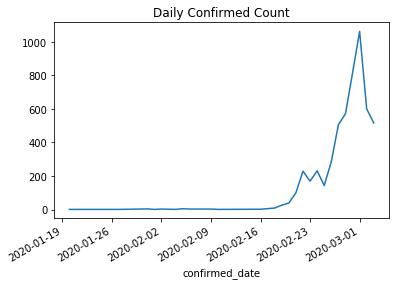

In [0]:
daily_count.plot()
plt.title('Daily Confirmed Count');


In [0]:
df_patient['age'] = 2020 - df_patient['birth_year'] 

In [0]:
dead = df_patient[df_patient.state == 'deceased']
dead

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
37,38,female,1963.0,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased,57.0
53,54,male,1963.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,57.0
54,55,male,1961.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,59.0
102,103,male,1957.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-20,NaN,2020-02-19,deceased,63.0
106,107,male,1953.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased,67.0
113,114,male,1946.0,Korea,Daegu,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-26,deceased,74.0
204,205,female,1965.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-21,deceased,55.0
285,286,male,1958.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-23,deceased,62.0
297,298,male,1962.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-25,deceased,58.0
442,443,male,1979.0,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,2020-02-23,NaN,2020-02-22,deceased,41.0


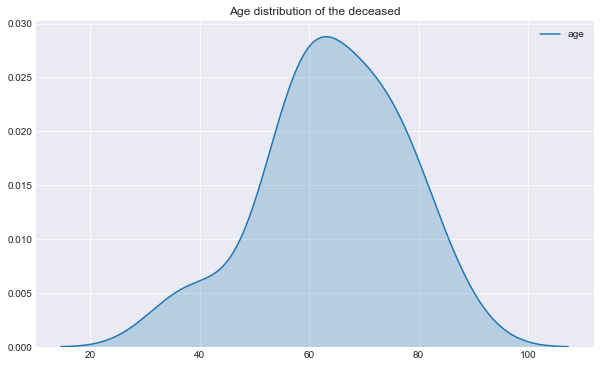

In [0]:
plt.figure(figsize=(10,6))data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlgAAAFvCAYAAACW8bVUAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3XdgVGXCNfBzp6ZMkplJIyFMGoTQAqFIBxEBKa4UFzA6YlnLru76sasrlrWgFH1d1u4rq+K+qJAIYsVCUyCQCIEQkkCAJAQS0vukTL3fH6xZWQIhkOROOb+/DNPO5TqXk3uf+zyCKIoiiIiIiKjLyKQOQERERORuWLCIiIiIuhgLFhEREVEXY8EiIiIi6mIsWERERERdjAWLiIiIqIuxYBE5MavVigkTJuB3v/tdt37O8uXL8cYbbwAA7rvvPpw6deqyz7/nnntQU1PT7mO/vD49PR1z5szpdJZPP/0UH3/8MQBgw4YNWLt2baffo7NKS0sxZ84c3HLLLTh8+PAl87zxxhtYvnx5l372nDlzkJ6e3qXv2d2+++47GI1GqWMQOTWF1AGI6NK2bduG+Ph4ZGdnIz8/H7Gxsd3+mf/85z87fE5qamqHr6+urr6qz8/IyEC/fv0AALfddttVvUdnpaenIygoCB9++OFl8xARXSkWLCIntmHDBsyaNQsGgwH/+te/2s6erF27Fps2bYKvry9GjhyJHTt2YOfOnbBYLHjllVdw4MAB2O12DBw4EE8//TQ0Gs0F72symfDUU0/h+PHjCAkJgVwux4gRIwAAN9xwA1577TXExMTgiSeeQFFREWQyGQYNGoTly5fjqaeeAgAsWbIEa9euxe23346EhATk5eXhz3/+M1atWoXXXnsNANDc3Iw//elPKCoqgr+/P5YvX47o6GgsW7YM/fr1w7333gsAbT8bDAbs3LkTqamp8PLyQk1NDWpra/HMM8/g5MmTWL58Oerq6iAIAu655x7MnTsX6enp+Mc//oE+ffrg5MmTsNlseP7559u259eSk5Oxfv16yGQyBAUF4W9/+xvKy8vx6quvorGxEUajEevXr297/rZt2y7IAwAFBQUwGo2orKxEUFAQ1qxZg5CQEJSXl2P58uUoLS2F1WrF7Nmz8eCDD16U4dSpU3jyySfR0tKCmJgYNDc3tz126NAhvPLKK2hpaYFMJsPDDz+MKVOmAADeffddbNmyBQqFApGRkVi9ejX8/Pzw6aefYsOGDXA4HNBqtfjb3/6G2NhYFBYWYvny5WhqakJlZSXi4+Px6quvQq1W4/XXX8e2bdugVCqh0+mwatUqhISEID8/HytWrEBdXR3sdjuMRiNuvfVWAMBrr72Gr776ClqtFpGRkVfxfzORhxGJyCmdPHlSHDRokFhTUyMeOXJETEhIEGtqasTdu3eLM2bMEOvr60WHwyE+8cQT4pQpU0RRFMU33nhDXL16tehwOERRFMW///3v4rPPPnvRe69YsUL861//KjocDrG6ulqcNGmS+Prrr4uiKIpTpkwRs7KyxC1btoj33HOPKIqiaLPZxKeeeko8ffq0KIqiGBcXJ1ZXV7c9/80332x7719en5aWJsbHx4sZGRmiKIrixo0bxVtvvVUURVF8/PHHxffee6/tNb/++df//frrr4vPP/+8aLVaxalTp4rff/+9KIqiWFZWJk6cOFE8dOiQmJaWJg4YMEDMzc0VRVEU33//ffH222+/aJv37dsn3njjjW25N2/eLM6cOVN0OBzi5s2bxfvvv7/d/fDfeW644Ya29/j973/ftu1Go1HcsWOHKIqi2NraKhqNRvGbb7656P1uueUWMSUlRRRFUTx48KDYv39/MS0tTayrqxOnT58unj17tm0bJ02aJJaUlIjbt28Xp0+fLtbV1YmiKIorV64U3377bTE9PV1MSkoSm5ubRVEUxT179og33XSTKIqiuHr1avHzzz8XRVEULRaLOGfOHPG7774Tz507Jw4fPlw0m81tf1/btm0TrVarOGvWLDE7O1sURVFsaGgQZ86cKR4+fFjctm2bOGvWLLGxsVG0Wq3i/fffL95xxx3t/n0R0Xk8g0XkpDZs2IApU6ZAp9NBp9MhIiICKSkpqKysxE033QR/f38AwO233460tDQAwI8//ojGxkbs27cPwPkxXIGBgRe99/79+/Hkk09CEATo9XpMmzbtoueMGDEC//jHP2A0GjFu3DgsWbLkkmcuRo4c2e6f9+/fH8OHDwcAzJs3D8899xwaGxs7/Xdx+vRpmM1mTJ8+HQAQGhqK6dOnY8+ePRg9ejTCw8MxYMAAAMDAgQOxZcuWi95jz549mDVrFvR6PQBg/vz5WLFiBYqLizuVZfz48W3vER8fj5qaGjQ3N+PAgQOor6+/4Ozd8ePHMWvWrLbX1tbWIi8vD3PnzgVw/u/4l8uPmZmZqKysxEMPPdT2fEEQkJeXh/379+Omm25CQEAAAOCJJ54AALz88ssoKirC4sWL217T0NCAuro6PPbYY0hNTcU///lPnD59GhUVFWhubkZoaCji4+Mxb948TJo0CZMmTcLYsWNx6tQpnDlzBk8++WTbe7W2tiI3Nxf5+fmYNm1a25nQBQsWXHCmj4guxoJF5ISam5vxxRdfQKVS4YYbbgBw/rLeRx99hNmzZ0P81RKicrm87b8dDgeefPJJTJ48GQDQ1NQEs9nc7mdc6j1+0adPH2zbtg3p6elIS0vD3XffjeXLl7fl+TUfH592P0Mmu/A+GkEQoFAoIAjCBZ9vtVrbff0v7HY7BEG4KL/NZgOAtst3v3yG2M4Sqw6H46I/+/V7XCmF4j+HzV8+y+FwQBRFbNy4Ed7e3gCAmpoaqNXqdt/j1/l+eT+73Y7Y2Fh8+umnbY+Vl5dDr9cjLS3tgu1vaGhAQ0MDHA4HbrnlFjz22GNt21hRUYGAgAAsXboUdrsdM2fOxPXXX4/S0lKIogiZTIaPPvoIR48exf79+7Fy5UpMnDgRt9xyC/z8/PDFF1+0fU5VVRX8/Pzw8ssvd/j/CxFdiHcREjmhX8a67NmzBzt37sTOnTuxfft2NDc3Y9CgQfjhhx/azgRt2rSp7XUTJkzAxx9/DIvFAofDgb/97W9Ys2bNRe8/ceJEbNq0CQ6HA/X19dixY8dFz/nkk0/wxBNPYMKECXjssccwYcIE5ObmAjj/D+yVFJO8vDwcO3YMwPnxTyNGjIC3tzd0Oh2ys7MBnC8RP//8c9tr2nvvmJgYKBQK/PDDD22v+f777zFu3LgOM/x6m7du3dp29+PmzZuvaDzRlWyrRqPBsGHDsG7dOgDnC9Btt9120d+rTqfDoEGD2kpUTk4OTpw4AQAYNmwYioqKcODAAQDAsWPHMGPGDJSXl2PcuHHYtm0bTCYTgPN3M3744YeYMGECvvnmG1RUVAA4f9ZzyZIlAIC9e/fioYceajuDduTIEdjtdhw/fhxz5sxBbGwsHnjgAdx11104evQooqOj4eXl1VawfrmzMjs7G5MmTcJ3333XVup+XcKIqH08g0XkhDZs2IC77777gjMF/v7+MBqN+PDDD7Fw4UIsWrQIXl5e6NevX9tZkz/84Q946aWXMG/ePNjtdgwYMADLli276P3/+Mc/4tlnn8XMmTOh1+sRFxd30XPmzp2Ln3/+GbNmzYK3tzfCwsLabs2/6aabYDQa26Z2uJSYmBi8+eabOHv2LAIDA7F69WoAgNFoxKOPPooZM2YgIiICY8aMaXvNpEmT2p73C6VSibfffhsvvvgi3njjDdjtdjz00EMYM2bMFU9xMH78eNx1111YsmQJHA4H9Ho93n333YvOsv239vK055VXXsELL7yAm2++GRaLBXPmzMFvfvObi563Zs0aPPHEE9i4cSMMBgNiYmIAAHq9Hq+//jpefvllmM1miKKIl19+GREREYiIiMCpU6fa7qrs27cvXnjhBWg0Gtx333245557IAgCNBoN3nzzTQiCgKVLl+Khhx6Cj48PNBoNRo0ahTNnzuC3v/0tZs6ciQULFsDHxwdeXl54+umnoVKp8Pbbb2PFihV47733YLPZ8Mgjj7TdLJCXl4cFCxbA398f8fHxqK2tvaK/dyJPJYjtnUsnIqd19OhRHD58GHfeeScAYN26dThy5AheffVViZMREdEvWLCIXIzJZMKTTz6JgoICCIKAsLAwvPDCCwgNDZU6GhER/RsLFhEREVEX4yB3IiIioi7GgkVERETUxTosWA6HA8888wwWLVoEo9GIoqKiCx5PSUnB/PnzsXDhQuzatQsAUFlZiSVLliApKQmPPPIIWlpaAAA7d+7EggULsGjRIqSkpHTD5hARERFJr8NpGrZv3w6LxYLk5GRkZmZi9erVeOeddwCcL1Lr16/H5s2bYTabkZSUhPHjx2Pt2rWYN28e5s6dizfeeAPJycm4/fbbsWrVKmzatAne3t647bbbMGXKFAQHB1/weZWVnZ/l2RVoNGqYTO1P+EjOi/vN9XCfuSbuN9fDfXZecLBfu3/eYcHKyMjAxIkTAZyfCO+XyQEBICsrC4mJiVCpVFCpVDAYDDh+/DiefPLJttmNS0tLERUVhfz8fBgMhralHkaMGIGDBw9i5syZXbF9Tk+h4MzHroj7zfVwn7km7jfXw312eR1eIjSZTG3rTwEXzmpsMpng5/ef5ubr6wuTyQRBEGC32zFnzhykp6dj+PDhl3wuERERkbvp8AyWRqNBU1NT288Oh6Nt7az/fqypqamtRCmVSmzduhX79u3D448/jqeffvqSz73w89Ru2Yrlchm02vbXayPnxf3merjPXBP3m+vhPru8DgvW8OHDsWvXLsyaNQuZmZkXLKmRkJCAV199FWazGRaLBfn5+YiLi8Nzzz2Hm266CWPGjIGvry8EQUBsbCyKiopQV1cHHx8fHDx4EPfee+9Fn+eu13O1Wh/U1TVLHYM6ifvN9XCfuSbuN9fDfXbeVY/BmjZtGlJTU7F48WKIooiVK1di3bp1MBgMmDp1KoxGI5KSkiCKIpYuXQq1Wg2j0YjnnnsOb731FmQyGZ577jkolUosW7YM9957L0RRxIIFCzjzNBEREbklp5vJ3V3vImTTd03cb66H+8w1cb+5Hu6z8y51BosTjRIRERF1MRYsIiIioi7GgkVERETUxViwiIiIiLpYh3cREhEREbmapiYTVq9+ESZTI+rr63DzzfPQv3881qx5GT4+PtDpdFCp1HjqqeewadNGbNv2PQRBwNSp0/Hb3y6+5s9nwSIiIqJu9U1OOb7MLuvS9/zN4F6YPejS0z0VFxfjxhunY/LkG1BVVYmHH74fPj4+ePrp5YiJicW7776FqqpKFBYWYMeObXj77fcgCAL+3//7A0aPHgODIeqa8rFgERERkdsJDAxESson+OmnXfDx8YXNZkNVVRViYmIBAEOHJmLHjh9QUJCP8vIyPPLI7wEAjY2NKC4uZsEiIuoqJvP5dVaVchlUcgGCIEiciMg9zB4UetmzTd1hw4b1GDw4AfPm3YpDhw5i//69CAkJRWFhAaKjY5CTcxQAYDBEIioqBn//++sQBAHJyR8jJqbvNX8+CxYReawTFSZkltQj61wDjp5rwLmGC5fqUitk6B+iwYg+AUiMCEBCuD98VTxsErmC8eMn4ZVXVuGHH75FQEAA5HI5li79K1atWg5vbx8olQoEB4egX784jBw5Cn/4w72wWKwYMGAQgoODr/nzOZN7D+GMt66J+831XMk+yzhbh7X7inCouP78a7yViA70QaTOGwqZAJtDhNXuQIvVgcLqZhTVNsMhAnKZgCl9g7B4eDgSwv15hqsL8bvmelxxn23enIIbbpgGnU6HtWvfhlKpxN1333dN73nVaxESEbmLXxerAG8FfjssDIm9A6DzUV62LLVa7SiobkZ2aSP2FdZg+4lKxIX4YnFib8wcEAKFnDPeELkCvV6PP//5IXh7+0Cj0eCpp57rts/iGawe4opNn7jfXFF7+8zuEPHmnkJ8dLAYAd4KzOgfggkxeqgUnS9GZpsD6UW1+PFkNc41tCJS742/TInF2Ch9V22CR+J3zfVwn53HM1hE5JHqW6x46ptjSC+qw+S+gViQEHZVxeoXaoUMk2IDMTFGj6xzDdh8pBR/2pyNCTF6LL0+FgaddxemJyJXxYJFRG7rVFUTHv08B+WNZhhHRmB8TNedZRIEAUN7B2BgLz/sOlmFrbkVWPThQdw/LhJ3juoDuYzjs4g8GQsWEbmlo+ca8NCmLKgUMvz5+hjEBPl2y+co5TJMjw/B6Egdkg+fw9t7TyO1sAbPz+yP3gE8m0XkqTgyk4jczpnaFizdkg2NWoFlU/t1W7n6tQBvJe4ba8Ddo/vgRIUJSf86hK9zyuBkw1yJqIewYBGRW6k2mfGnzUdhF0X8cWI0dD7KHvtsQRAwOlKHp6fHobfWC89/dwIvfH8CZpujxzIQkXNgwSIit9FiteO+jzJQaTLjoQnRCPFTS5Ij0FeFpZNjMGtgCL7KKcf9yUdQ3mju+IVE5DZYsIjILdgdIp78+hhyzjXg3jEGRAf6SJpHJhPwm8G98MC4SBRUNcG4/hAy/z2xKRG5PxYsInILn2QUY29BDYyjDRjaO0DqOG0SIwLw16l9oVIIePDTLHyVXSZ1JCLqASxYROTy8qua8M7e00js7Y8bB4RIHeci4QFeeHxqP/QL9sXy70/gn/uLOPidyM2xYBGRS7PZHXj22zx4KeVIGhHhtOsD+qjkeHhCFMZE6rB2XxFW/HASNjsHvxO5K86DRUQu7YP0M8irMOHB8ZHw83LuQ5pCLsOS6yKg91Xii+wyVJjMWH3zQPio5FJHI6IuxjNYROSyjpU34v20MxgdqcUwJxp3dTmCcH7w++0jeiOtqBZ/3HwUja02qWMRURdjwSIil2SxOfDs1jwEeCmxMDFc6jidNjE2EPePjUROWSMe/PQIapstUkcioi7EgkVELikl8xwKa5qRNLI3fFXOfWnwUhIjAvCH8VEorG7G/clHUGniXFlE7oIFi4hcTn2LFe+nFWFQLz8MCfOXOs41GRTmhz9OjEZZgxm/23gEpQ2tUkcioi7AgkVELueD9DNostgxf2iY1FG6RFyIBo9MjkFdsxUPJh9BGUsWkctjwSIil1Jc14KUw+cwLkqH3gFeUsfpMtGBPnhkcjRqW2x4ICWLJYvIxbFgEZFLeWvPacgEATcP7iV1lC4XqffBnyZFo7bZggdTsrh+IZELY8EiIpdx9FwDtp+oxLT+QdB6K6WO0y2iA33wp0kxqG6y4MEUDnwnclUsWETkEkRRxKs/FcDfS4Fp/YOljtOtzpesaFSZLHh401HUtViljkREncSCRUQuIa2oFlnnGjBnYCi8lO4/83lMkC9+PyEKZ2tb8Mhn2WiycDJSIlfCgkVELuHD9LPQeSsxLlondZQe0z9Eg9+NNeB4eSP+8nkOzDauXUjkKliwiMjpZZc24FBxPabGBUEh96zD1tDeAVhyXR9knK3Hk18fg80hSh2JiK6AZx2piMgl/evns/BRyjEhRi91FEmMjtRhcWI4dudXY/X2kxBFliwiZ+ea60sQkcc4Xd2Mn05VY+aAEI8Ye3Up1/cLQkOrDV8cLUMvPzV+NzZS6khEdBksWETk1NYfPAuFXMD1/YKkjiK5mweHoqbFinf3FSHET43fuOFcYETuggWLiJxWRaMZW3MrMD5GD38vHq4EQYBxZATqW6xY8cMJBGtUGBvlmZdNiZwdx2ARkdPacKgEDlHEtDj3nveqM+QyAfePi0TvAC88/mUuTlSYpI5ERO1gwSIip9TYasPmI+cwoo8WQRqV1HGcirdSjocmRsNLKcefP89BdZNF6khE9F9YsIjIKW3NLUeL1YFp/Tn2qj1abyV+Pz4Stc0WPPYF58gicjYsWETkdERRxOYjpYjS+8Cg85E6jtMy6Hxw12gDjpY2YuW2E5y+gciJsGARkdM5XFKPwppmTIrlAO6ODI8IwM2DQrE1twL/d6BY6jhE9G8sWETkdD47UgpvpRwj+2iljuISZg0Mwcg+AXhrTyFSC2qkjkNEYMEiIidT02zBjhNVGBOlhUrBQ9SVEAQBd47qgwitF57eegzFdS1SRyLyeB0evRwOB5555hksWrQIRqMRRUVFFzyekpKC+fPnY+HChdi1axcA4Ny5c7jrrrtgNBpxxx13oKCgAACwbt06zJ49G0ajEUajse3PiYh+8XV2OWwOEZNiA6WO4lJUChnuHxcJhwN4/MtctFrtUkci8mgdzty3fft2WCwWJCcnIzMzE6tXr8Y777wDAKisrMT69euxefNmmM1mJCUlYfz48Xjttddwxx134MYbb8SePXuwZs0avPnmm8jJycFLL72EwYMHd/uGEZHrcYgiPssqRVywL8L8vaSO43KCNWrcPaYP3tpzGqt3nMKzM+IgCILUsYg8UocFKyMjAxMnTgQADBs2DNnZ2W2PZWVlITExESqVCiqVCgaDAcePH8fjjz8OPz8/AIDdbodarQYA5OTkYO3ataisrMT111+PBx54oDu2iYhc1M9FtSipb8W9YwxSR3FZQ8L8MXtgCL7JKUdCmB/mDw2XOhKRR+qwYJlMJmg0mraf5XI5bDYbFAoFTCZTW5ECAF9fX5hMJuj15+/8KSgowEsvvYS33noLADB79mwkJSVBo9Hg4Ycfxq5duzBlypQLPk+jUUOhcL8FXeVyGbRa3m7uarjfetaXuXnw91JgQv9gKOVXN/5KJpNBo1F3cTLXsug6A87Wm/E/O/Mxqm8whvQOkDpSh/hdcz3cZ5fXYcHSaDRoampq+9nhcEChULT7WFNTU1vhSktLw/PPP4+XX34ZMTExEEURS5YsaXt88uTJyM3NvahgmUzma98qJ6TV+qCurlnqGNRJ3G89p9Jkxo7j5ZjWPxjmFiuu9kig0ajd9jjSGXeO7I0V25rxp42H8ZFxOHxVzr2WI79rrof77LzgYL92/7zDXxGHDx+O3bt3AwAyMzMRFxfX9lhCQgIyMjJgNpvR2NiI/Px8xMXFIS0tDStWrMB7772HIUOGADh/JmzOnDloamqCKIpIT0/nWCwiavPdsQo4RGBcNOe+6goatQL3jO6DkvpW/M+OU1LHIfI4Hf5KM23aNKSmpmLx4sUQRRErV67EunXrYDAYMHXqVBiNRiQlJUEURSxduhRqtRorV66E1WrFsmXLAADR0dFYvnw5li5dijvvvBMqlQpjx47F5MmTu30Dicg1fJNbjmi9D0L9PPvyXlfqF6zBrAEh+Ca3AtdF6jBrYKjUkYg8hiA62doKlZWNUkfoFjyV6pq433rGiQoTbl9/CIuHh+P6vte29iAvEV7I7hDxj58KUFLXgk/uHIEIrbfUkdrF75rr4T4776ovERIRdbetuRWQywTO3N4N5DIB91zXBzJBwFNfH4PVzkWhiXoCCxYRScrmEPHdsXIM7uUHjdq5B2K7Kr2vCneMjEBuuQkfpJ2ROg6RR2DBIiJJHThTi+pmK0ZH6aSO4tYSIwIwJlKHD9LP4Fi5ew7FIHImLFhEJKmtuRXwUcoxJKz9cQzUdRYmhiPAS4nnvs2DxcZLhUTdiQWLiCTTZLHhx5NVGNEn4KonFqUr56OS446RESiobsa7+4o6fgERXTUe0YhIMrtOVqHV5uDlwR40KMwPE2L0+OjgWRw91yB1HCK3xYJFRJLZmluBYF8VYgO53EZPunVoGHTeSjz3XR5arXap4xC5JRYsIpJERaMZB8/U4bpILQRBkDqOR/FSymEc1QdnalvwPu8qJOoWLFhEJIkdJ6sgAhhl4NxXUogP1WBclA7rDxbjVFVTxy8gok5hwSIiSWzPq0TvAC/08veSOorHmj80DN5KGVZtOwmHcy3qQeTyWLCIqMeVN5qRda4BI/oESB3Fo2nUCtw6NBxZ5xrweVap1HGI3AoLFhH1uJ0nqwAAwyNYsKQ2OlKL/iEavLG7EFVNFqnjELkNFiwi6nHb8yoRwcuDTkEQBCSN6A2zzYE1u/KljkPkNliwiKhH/XJ5cDgvDzqNUD81Zg4Mwba8SqSfrpU6DpFbYMEioh7Fy4POaVr/YIRoVHhl1ynY7FxGh+hasWARUY/i5UHnpJTLcOuwcJyuacGnRzjgnehasWARUY/h5UHnNiTMDwNDNVibehq1zRzwTnQtWLCIqMfsOFEJABjRh5OLOiNBEPDbxHC0WO3431QuBk10LViwiKjH7DhRhYgAL4T6qaWOQpcQ5u+FyX2DsCWrFHkVJqnjELksFiwi6hG8POg65gwKha9ajr/vPAWRM7wTXRUWLCLqEbvzqwHw7kFX4KOS45bBvXC4pAG7/n3XJxF1DgsWEfWIH09WoZefmncPuohx0XqE+avx1t7TsDl4Fouos1iwiKjbNbRakVFcj6G9/aWOQldILhMwd0gvnKltwZfZZVLHIXI5LFhE1O1SC2tgd4gsWC4mIdwfsUE+WLuvCC1Wu9RxiFwKCxYRdbufTlUjwEuBKL2P1FGoEwRBwPyEMFQ3WbDxUInUcYhcCgsWEXUrs82BfYU1SAj3h0wQpI5DnRQb5Iuhvf3xr5/Poq7ZKnUcIpfBgkVE3erAmVq0WB0Y1pt3D7qquUN6odlqxwfpZ6SOQuQyWLCIqFv9eKoaXgoZ4kJ8pY5CVynM3wvjovT4NPMcShtapY5D5BJYsIio29gdInafqsbgMD8o5TzcuLI5g0IAAB+k8SwW0ZXgEY+Iuk12aQNqW6wYysuDLk/no8KEGD2+yilHSX2L1HGInB4LFhF1mx9PVUMuEzC4l5/UUagL3DQgBDIA69LOSh2FyOmxYBFRtxBFEbtOVqF/iC+8VXKp41AX0HorMSFWj69yylBcx7NYRJfDgkVE3aKwphkl9a0YFs7Lg+5kRnwI5DKBY7GIOsCCRUTdYk9+DQBgSDhnb3cnWm8lJsYE4pvccpyt5VksokthwSKibrGnoBp9tN7Q+SiljkJdbEZ8MOQyAe9zXiyiS2LBIqIuV9dixdFzDUgI5+B2dxTgrcSk2EB8y7NYRJfEgkVEXW5fYQ0cIi8PurPp/YMhFwSsP8g7Conaw4JNmG4XAAAgAElEQVRFRF1uT34NArwUMOi8pY5C3STAW4kxUTp8nV2OSpNZ6jhETocFi4i6lM3uwP7TNRgc5sfFnd3c9Phg2EQRn2SUSB2FyOmwYBFRlzpcUo8mi52XBz1AsEaNkX202HzkHBparVLHIXIqLFhE1KX2FtRAKRMQH6KROgr1gBnxwWixOvBp5jmpoxA5FRYsIuoyoihid3414kI08FJy9nZPEKH1xpAwP2zIKEGr1S51HCKnwYJFRF2mqLYFxXWtGMLpGTzKjAEhqG+14fOjZVJHIXIaLFhE1GX2Fvx79vYwjr/yJH2DfNE3yAcfHSyG1e6QOg6RU2DBIqIusye/GhEBXgj0VUkdhXrYjAEhKG80Y1tepdRRiJwCCxYRdYmGVisyS+oxmHcPeqRBvfwQ5q/GxxnFEEVR6jhEkuuwYDkcDjzzzDNYtGgRjEYjioqKLng8JSUF8+fPx8KFC7Fr1y4AwLlz53DXXXfBaDTijjvuQEFBAQBg586dWLBgARYtWoSUlJRu2Bwikkra6drzs7eHcfyVJ5IJAqbGBeFERRMOFddLHYdIch0WrO3bt8NisSA5ORl/+ctfsHr16rbHKisrsX79emzcuBHvv/8+1qxZA4vFgtdeew133HEH1q9fjwceeABr1qyB1WrFqlWr8MEHH2D9+vVITk5GZSVPJRO5i32FNfBVyRGt95E6CknkOoMOfmoFPj5YLHUUIsl1WLAyMjIwceJEAMCwYcOQnZ3d9lhWVhYSExOhUqng5+cHg8GA48eP4/HHH8fkyZMBAHa7HWq1Gvn5+TAYDAgICIBKpcKIESNw8ODBbtosIupJDlFEamEtBvbyg0zG2ds9lUohw6RYPfYU1KCoplnqOESSUnT0BJPJBI3mPxMGyuVy2Gw2KBQKmEwm+Pn953KAr68vTCYT9Ho9AKCgoAAvvfQS3nrrLdTU1LT73P+m0aihULjf/DlyuQxaLX+zdzXcb1cmq7gedS1WjIzWQ6NRS5pFJpNJnsGTzRoajh/yKvFZTjmev3nQFb+O3zXXw312eR0WLI1Gg6amprafHQ4HFApFu481NTW1lai0tDQ8//zzePnllxETEwOLxXLJ5/6ayU0XDdVqfVBXx9/oXA3325X5PuscBACxWi/Jv8MajVryDJ5MDuA6gxabD5Xg7pER0Horr+h1/K65Hu6z84KD2x932uElwuHDh2P37t0AgMzMTMTFxbU9lpCQgIyMDJjNZjQ2NiI/Px9xcXFIS0vDihUr8N5772HIkCEAgNjYWBQVFaGurg4WiwUHDx5EYmJiV2wbEUlsb2ENogJ9oFF3+DsbeYCpccEw2xzYklUqdRQiyXR4NJw2bRpSU1OxePFiiKKIlStXYt26dTAYDJg6dSqMRiOSkpIgiiKWLl0KtVqNlStXwmq1YtmyZQCA6OhoLF++HMuWLcO9994LURSxYMEChIaGdvsGElH3qmm24FhZI+YM4veZzgsP8MLAXhokHyrB7SMioFJwRiDyPILoZBOWVFY2Sh2hW/BUqmvifuvY1txyPPttHp6c1hcGnfTjMXiJ0DnklDXijd2FWD6rP2YO6Lh887vmerjPzrvqS4RERJeTWlCDAC8FIrTeUkchJzIgVINQPzWSD52TOgqRJFiwiOiq2Rwi9p+uxaBefpAJnJ6B/kMmCLi+byByyhqRU+aeVyaILocFi4iuWk5pAxrNNgzi7O3UjjFROngpZPj0cInUUYh6HAsWEV211MIayARgYCgLFl3MWynH6Cgdfjheidpmi9RxiHoUCxYRXbW9BTWIDfKFt8r9JgemrnF930BYHSI+P1omdRSiHsWCRURXpaLRjJOVTRjMy4N0GWH+XogP0WBzZilsDqe6aZ2oW7FgEdFV2X+6BgAwOMxf4iTk7K7vF4hykxm786uljkLUY1iwiOiqpBbWQu+jRLg/1/2jy0sI80egjxLJhzjYnTwHCxYRdZrV7kD6v6dnEDg9A3VAJhMwqW8gDhXX41RVU8cvIHIDLFhE1GmZJfVotto5/oqu2PhoPRQyAVuOcH1C8gwsWETUaakFtVDIBPQP0UgdhVyERq3A8IgAfJNbjharXeo4RN2OBYuIOi21sBpxwb7wUnJ6Brpyk2ID0WSxY9vxSqmjEHU7Fiwi6pSS+hacrmnBIN49SJ0UG+SDcH8vbD7C9QnJ/bFgEVGn7CusBQCOv6JOEwQBE2P1yC034Vg51yck98aCRUSdklpQgxCNCqF+nJ6BOm90pA4quYDPONid3BwLFhFdsVarHQfP1nFxZ7pqPio5Rhq0+O54BUxmm9RxiLoNCxYRXbFDxfUw2xycvZ2uyaTYQLRaHfj2WIXUUYi6DQsWEV2xfYU1UMkFxAX7Sh2FXFikzhsGnTc2HzkHUeT6hOSeWLCI6IqIoog9BTXoH6KBUs5DB109QRAwMUaP/KpmHC3lYHdyTzxKEtEVKaptwbn6Vl4epC4xyqCFWiHDl0fLpI5C1C1YsIjoiqQW1AAAhnCAO3UBL6UcI/oE4Pu8CjRZONid3A8LFhFdkb0F1egd4AW9r0rqKOQmxkfr0Wp1YHseZ3Yn98OCRUQdMpltOFzSwMlFqUvFBPogzF+NL3iZkNwQCxYRdSi9qBZ2h4ghHH9FXUgQBIyL1uNoaSNOVpikjkPUpViwiKhDewtq4KuSIzrQR+oo5GZGR+oglwnYlFEsdRSiLsWCRUSX5RBFpBbUYGAvP8hlgtRxyM34eymQEO6PLZklsNodUsch6jIsWER0WcfKGlHbYuX4K+o246N1qG22Ynd+tdRRiLoMCxYRXdbeghoIAjCoFwsWdY+BoX7Q+6o42J3cCgsWEV3W3sIaxAT6QKNWSB2F3JRMJmBSvyCkna5FWUOr1HGIugQLFhFdUpXJjOPlJt49SN1uUr8giAC+yimXOgpRl2DBIqJLSi08P3s7x19RdwvxUyM+VIOvssvg4ALQ5AZYsIjokvYW1EDno0TvAC+po5AHGB+tR2mDGQfO1EkdheiasWARUbssNgfSi2oxJMwPgsDpGaj7DevtD1+VnIPdyS2wYBFRuw4X16PF6sBgjr+iHqKUy3BdpBY/nqxCXYtV6jhE14QFi4jatbewBkq5gPgQjdRRyIOMj9bD6hDx3bEKqaMQXRMWLCJq196CasQFa6BS8DBBPSdC640ovTc+P1oKkYPdyYXxyElEFymqaUZxXSuG8O5BksC4aD3yq5qRW84FoMl1sWAR0UX2Fvx7eoZwjr+injeqjxYquYAvOdidXBgLFhFdZG9BNcIDvBDkq5I6Cnkgb5Ucw/to8d2xCrRY7VLHIboqLFhEdAGT2YbDJQ0YzLUHSULjo/Vottqx80SV1FGIrgoLFhFdIL2oFnaHiCHhLFgknb5BPgjRqPBVNi8TkmtiwSKiC+wtqIGPSo6YQF+po5AHEwQBY6J0yCiuR0l9i9RxiDqNBYuI2jhEEakFNRgYqoFcxtnbSVpjonQQAHzDBaDJBbFgEVGbY+Um1LZYMYR3D5IT0Puo/r0AdDkXgCaXw4JFRG325ldDADCIA9zJSYyL1qGs0YyMs1wAmlwLCxYRtdlbUIOYQB9o1AqpoxABAIaGB8BbKcdX2bxMSK6lw4LlcDjwzDPPYNGiRTAajSgqKrrg8ZSUFMyfPx8LFy7Erl27Lnjsww8/xCuvvNL287p16zB79mwYjUYYjUYUFBR00WYQ0bWqMplxvMLExZ3JqagUMowyBGDnySqYzDap4xBdsQ5/Td2+fTssFguSk5ORmZmJ1atX45133gEAVFZWYv369di8eTPMZjOSkpIwfvx4OBwOPP3008jKysL06dPb3isnJwcvvfQSBg8e3H1bRERXZXd+NQAgoTcLFjmXsVF67M6vwba8SsxLCJM6DtEV6fAMVkZGBiZOnAgAGDZsGLKzs9sey8rKQmJiIlQqFfz8/GAwGHD8+HGYzWbMnTsXDz744AXvlZOTg7Vr1+K2227Du+++28WbQkTX4qdT1Qj2VSHcXy11FKILROm9Ee6v5pxY5FI6PINlMpmg0WjafpbL5bDZbFAoFDCZTPDz+89gWF9fX5hMJgQEBGDChAn47LPPLniv2bNnIykpCRqNBg8//DB27dqFKVOmXPAcjUYNhUJ+rdvldORyGbRaH6ljUCd5yn4zmW04cLYON8aHwM/PS+o410Qmk0GjYUl0NR3tt8n9g7HhQDGqrQ7EBmsu+TzqOZ5yfLxaHRYsjUaDpqamtp8dDgcUCkW7jzU1NV1QuH5NFEUsWbKk7fHJkycjNzf3ooJlMpk7vxUuQKv1QV1ds9QxqJM8Zb9tz6uE1S5iYIivy38HNRq1y2+DJ+povw3r5YdkAfhkfxH+OCm6B5PRpXjK8bEjwcHt954OLxEOHz4cu3fvBgBkZmYiLi6u7bGEhARkZGTAbDajsbER+fn5Fzz+ayaTCXPmzEFTUxNEUUR6ejrHYhE5iZ/yq6FRc/Z2cl4B3koMDvPD1txy2BycE4ucX4dnsKZNm4bU1FQsXrwYoihi5cqVWLduHQwGA6ZOnQqj0YikpCSIooilS5dCrW7/FK+fnx+WLl2KO++8EyqVCmPHjsXkyZO7fIOIqHNsdgf2FlRjSJg/Z28npzY2So939xUh/XQtxsfopY5DdFmCKDrX9LiVlY1SR+gWPJXqmjxhv/1cVIuHNh3Fg+MjMax3gNRxrhkvEbqmK9lvNrsDT3x9HNdFarH65oE9lIwuxROOj1fiqi8REpF7++lUNVRyAQNDOXs7OTeFXIZRBi12n6pGXYtV6jhEl8WCReTBRFHET6eqMSDUDyoFDwfk/MZF62B1iPj+WIXUUYgui0dUIg+WV2FCucmMoZxclFxEhNYbBq03vsrh0jnk3FiwiDzYT6eqIQjAEC6PQy5kbLQOeRUmnKw0SR2F6JJYsIg82E/51YgN8oWfFxd3JtcxyqCFQiZwAWhyaixYRB6quK4FJyubMDScZ6/ItWjUCiSE++PbY+Ww2h1SxyFqFwsWkYfadbIKAJAY4fpTM5DnGRutQ12LDXsLaqSOQtQuFiwiD7X9RBUidd4I8lVJHYWo0waG+kHrreAC0OS0WLCIPFBpQytyyxoxvA/PXpFrkssEjI7UIbWwBlVNFqnjEF2EBYvIA+08cf7y4HBeHiQXNjZKB4cIfJvLwe7kfFiwiDzQjhOV6KP1RrCm/bVDiVxBL38vxAb64KuccjjZqm9ELFhEnqasoRVHSxt59orcwpgoHQqrm5Fb5p7r2JLrYsEi8jC7TlUDAMdfkVsYadBCJRc4szs5HRYsIg+z40QlIgK8EOrHy4Pk+ryVciRGBOD7YxVotdqljkPUhgWLyINUmszIKmng3FfkVsZG6WGy2PHTv8/OEjkDFiwiD7LrZBVE8PIguZe4EF8E+qrwVQ7nxCLnwYJF5EF2nKhCmL8aYf5eUkch6jIyQcCYSC1+LqpDWUOr1HGIALBgEXmMKpMZh4vrefcguaWxUXqIAL7hnFjkJFiwiDzED3mVEHH+risidxOkUaF/iC++zuacWOQcWLCIPMR3xyrQR+vNy4PktsZG6VFc34rMkgapoxCxYBF5gqKaZhwrN+G6SJ69IveVGBEAL6WMC0CTU2DBIvIA3x2rgABgZB8WLHJfaoUMIyICsP1EJZotnBOLpMWCReTmRFHEt8cqEBeigc5HKXUcom41NlqPFqsDO05USh2FPBwLFpGbyylrREl9K67j4HbyALGBPujlp+bSOSQ5FiwiN/fdsQooZQKnZyCPIAgCxkTpcLi4HsV1LVLHIQ/GgkXkxmwOET8cr8TgcH94q+RSxyHqEaMjdRAE8CwWSYoFi8iN/VxUi9oWKy8PkkfR+SgxMNQP3+SUw+7gnFgkDRYsIjf23bEK+CjlGBzmJ3UUoh41NkqH8kYzDp6pkzoKeSgWLCI31WK148dTVUiMCIBSzq86eZahvf3ho5JzAWiSDI+6RG5qe14lWqwOjInSSR2FqMcp5TKM6qPFrpPVaGy1SR2HPBALFpGb+iK7DKF+avQN8pE6CpEkxkXrYLE78ENehdRRyAOxYBG5odPVzThS0oDx0ToIgiB1HCJJGHTe6B3gha+yeTch9TwWLCI39EV2GeQCeHmQPJogCBgbpUNOWSMKqpukjkMehgWLyM1Y7Q58nVOOIeH+8Pfi0jjk2a6L1EEugGexqMexYBG5mT0FNahrsWJ8jF7qKESS8/dSYHCYP7bmlsPGObGoB7FgEbmZL7JKofNWYlAo574iAoCx0TrUNFuxv7BG6ijkQViwiNxIWUMr9p+uxdgoHWQyDm4nAoAhYf7w91Jw6RzqUSxYRG7k65xyiADGRfPyINEv5DIB1xm02JNfjdpmi9RxyEOwYBG5CYco4svsMsSHahCkUUkdh8ipjIvWw+YQ8U0u58SinsGCReQmUgtqUNpgxgQObie6SHiAF2IDfbAlqxSiyMHu1P1YsIjcxIZDJdB5K5HYO0DqKEROaUKsHmdqW3C4pF7qKOQBWLCI3MCpqiYcOFOHyX0DIefgdqJ2jYjQwlspx5YsLgBN3Y8Fi8gNJB8qgUou8PIg0WWoFDJcF6nFjhOVqG+xSh2H3BwLFpGLq2u2YmtuBa6L1EGjVkgdh8ipTYzRw2oXsfUYB7tT92LBInJxW46WwmJ3YEq/IKmjEDm9CK03ovQ++JyD3ambsWARuTCb3YFPM88hPkSD3gFeUschcgkTYnQoqG5G1rkGqaOQG+uwYDkcDjzzzDNYtGgRjEYjioqKLng8JSUF8+fPx8KFC7Fr164LHvvwww/xyiuvtP28c+dOLFiwAIsWLUJKSkoXbQKR59p5sgqVJgtuiOPZK6IrNbKPFl4KGT4/ysHu1H06LFjbt2+HxWJBcnIy/vKXv2D16tVtj1VWVmL9+vXYuHEj3n//faxZswYWiwWtra149NFH8cknn7Q912q1YtWqVfjggw+wfv16JCcno7Kysnu2ishDbDhUghCNCoPDuO4g0ZXyUsoxyqDFtrxKNLbapI5DbqrDgpWRkYGJEycCAIYNG4bs7Oy2x7KyspCYmAiVSgU/Pz8YDAYcP34cZrMZc+fOxYMPPtj23Pz8fBgMBgQEBEClUmHEiBE4ePBgN2wSkWc4XFyP7NJGTOkXBJnAqRmIOmNirB5mmwNbc7k+IXWPDm85MplM0Gg0bT/L5XLYbDYoFAqYTCb4+f3nN2dfX1+YTCYEBARgwoQJ+Oyzzy54n/ae+980GjUUCvlVb5Czkstl0Gp9pI5BneTM+23dlmwEeCsxfUgvqN3wO3O1ZDIZNBq11DGok3p6vw3UqBEb7IstR8tw/5S+EPhLSqc58/HRGXRYsDQaDZqamtp+djgcUCgU7T7W1NR0QYm63Ptc6rkmk/nK07sQrdYHdXXNUsegTnLW/XakpB77C2qwYGgYrK02WMHLHL/QaNRuexxxZ1Lst/FROvzfgWLszC7FiD7aHv1sd+Csx8eeFhzcfu/p8BLh8OHDsXv3bgBAZmYm4uLi2h5LSEhARkYGzGYzGhsbkZ+ff8HjvxYbG4uioiLU1dXBYrHg4MGDSExMvJptIfJ4/9xfBD+1ApNiA6WOQuSyRvbRwlclx6bMUqmjkBvq8AzWtGnTkJqaisWLF0MURaxcuRLr1q2DwWDA1KlTYTQakZSUBFEUsXTpUqjV7Z/iVSqVWLZsGe69916IoogFCxYgNDS0yzeIyN0dPdeA9KI6zEvoBbWCM60QXS2VQoYxUTrsOlWFqiYLgnxVUkciNyKITjbTWmVlo9QRugVPpbomZ9xvj2w+iqzSBrw4Kx5eSo69+m+8ROiapNpv5Y1mPPttHn4/Pgr3jDH0+Oe7Mmc8Pkrhqi8REpHzyClrxL7TtbgxLpjliqgLhPqpER+qwWdZpbA7nOp8A7k4FiwiF/Le/iL4quS4vi/HXhF1lcmxgShvNGNvQY3UUciNsGARuYgjJfXYW1CDqXFBPHtF1IUSwv2h9VZi85FzUkchN8KCReQCHKKIv+/Kh85bialxwVLHIXIrcpmA8dE6pJ2uRXFdi9RxyE2wYBG5gG9zK3Cs3IS5vHOQqFtMjA2ETAA+zeRZLOoaPFITOblmix1v7ilElN4bowycDJGoO2i9lRjeR4svj5ah2WKXOg65ARYsIif3fwfOoqrJgoXDwrnmIFE3mtI3ECaLnesTUpdgwSJyYmUNrVh/oBijDFrEBPlKHYfIrUUH+iBS543kwyVwsikiyQWxYBE5sTd2F0KEiHlDekkdhcjtCYKAKf2CcLqmBT+fqZM6Drk4FiwiJ5V2ugY/5FViWv9g6LmEB1GPGNEnAP5qBZIPlUgdhVwcCxaREzKZbXjh+xPo5afGzAEhUsch8hhKuQwTYvTYW1DDKRvomrBgETmhf/yYj8omC5Zc1wdKOb+mRD2JUzZQV+CRm8jJpBbU4MvscszoH4zoQB+p4xB5HJ2PEokRAZyyga4JCxaRE2loteLFH04g3N8LsweFSh2HyGPd0C8IJosdX2WXSR2FXBQLFpET+fuufNQ0W7DkugheGiSSUEyQL2ICfbDhUAnsDk7ZQJ3HIziRk/jyaBm25lbgpgEhiNTz0iCR1G7sH4yS+lb8dKpK6ijkgliwiJxAdmkDVm8/ifgQDWYP5KVBImcwLNwfwb4qfHSwWOoo5IJYsIgkVtVkwWNf5CLAW4nfjTVALuNyOETOQCYTcENcEI6WNiLrXIPUccjFsGARSchqd+DxL3PR0GrFg+MjoVErpI5ERL8yNkoHH6UcH/MsFnUSCxaRRERRxCs785F1rgF3juqDCK231JGI6L94KeWYGKvHj6eqOPEodQoLFpFE3t1XhM+ySjEjPhgjDVqp4xDRJUzpFwRBELAhg8vn0JVjwSKSwPtpRXg/7QzGR+txCxdyJnJqWm8lRvXR4svsMtS3WKWOQy6CBYuoh60/cBb/m1qE0ZFa3D6yN2QCB7UTObtp8cFotTmQcpjL59CVYcEi6kEbDpXg9d2FGNknAHeO6sNyReQiegd4ISHcHxsOlXD5HLoiLFhEPcAhinhjdyHW7MrHsN7+uHs0p2MgcjU3DQhGo9mGLVmlUkchF8CCRdTNmi12/PWLXPzfgbOYGKPHfWMjWa6IXFBMoC/6h/hi/cFiWGwOqeOQk2PBIupGZQ2tuG9jJnYXVGPhsHAkjejNckXkwm4aEILqJgu+zi2XOgo5ORYsom6yt6AaSz4+jDO1LXhoQhRuiDt/qzcRua74EA2i9N74v5/PwsZFoOkyWLCIupjJbMOL35/A0i058FbK8depfTE4zF/qWETUBQRBwIz4EJTUt2J7XqXUcciJcV0Ooi6UcbYOz3+Xh7JGM2bEB2POoFAo5fw9hsidDO3tjzB/Ndaln8H0+GDeDUzt4pGfqAuUNrTiqa+P4cGULNgcIh6dEot5CWEsV0RuSPbvs1gF1c348VS11HHISfEMFtE1aLLY8K+fz+LjgyUQIWLWgBDMGBACtYLFisidjTJo8e2xCqzddxrX9w3kWSy6CAsW0VVostiwObMUHx0sRm2LFdcZtJg7pBf0viqpoxFRD5DLBMweGIIP0s9i54kq3Ng/WOpI5GRYsIg6ob7FipTD57DhUAkazTYMDNXg/nGRiA70kToaEfWwkX1+OYtVhCn9gjgFC12ABYvoCpyqbMKnmefw7bFytFgdGBruj5kDQxClZ7Ei8lQymYDZA0PxXtoZ7DhRienxIVJHIifCgkV0CVa7A98cLcWHqYXILGmAUi5gVB8tpsYFobfWW+p4ROQEhvcJQHiuF9buL8LUuGCexaI2LFhE/6Wi0YwtWaXYklWK6mYrgjUqzE8Iw7hoHTRqfmWI6D9kgoDZg0Lwz/1n8ENeBWYOCJU6EjkJ/mtBBEAURRwuqUfK4XPYdbIKoggMCvPD3eOjEKP14h1CRHRJiREBiAjwwj/3FWFa/xAoeBaLwIJFHq7Fase3xyqQcrgE+VXN8FXJMTUuCJNiAxGsUUOjUcNkMksdk4icmEwQMGdwKP43tQhfZZdhXkKY1JHICbBgkUcqrmvBp5nn8GV2GUxmOyK0XjCOjMAogxYqzmFFRJ00NNwfsYE+eHdfEW4aEAJvpVzqSCQxFizyGKIo4ueiOmw4VIJ9hTWQCedP7V/fNwixQT5ciJmIrpogCJg3NAyv7MzHhowS3DPGIHUkkhgLFrk9hyjix5NV+CD9LPIqTPD3UmDWwBBMiAmEzkcpdTwichN9g3wxNNwf//r5LOYl9ILOhxMPezIWLHJbdoeI749X4IP0MyiqaUGonwrGkRG4LlLLNQKJqFvMTeiF5d+fwPtpZ/DoDX2ljkMSYsEityOKIn46VY23955GYU0zIgK88LsxBgyPCICMd/cQUTcK8/fC+Gg9Nh8pxeLhvRHBOfM8FgsWuZWMs3V4c08hsksbEeqnxn1jzxcrjq8iop4yZ1Aofi6qxTt7T2PFnAFSxyGJsGCRWyhraMWrPxVgx4kq6LyVMI6MwJgoHWdVJqIep/VWYmpcML49VoHFw3tjSLi/1JFIAh0WLIfDgeeeew55eXlQqVR48cUXERkZ2fZ4SkoKNm7cCIVCgd///veYMmUKampq8Oijj6K1tRUhISFYtWoVvL298eKLL+LQoUPw9fUFALz99tvw8/Prvq0jt2e2ObD+wFl8+PNZOEQRNw8KxbT+wZxqgYgkNSM+GPtO1+B/dp7Ch7cncrJiD9Rhwdq+fTssFguSk5ORmZmJ1atX45133gEAVFZWYv369di8eTPMZjOSkpIwfvx4vP3225gzZw7mz5+PtWvXIjk5GXfddRdycnLw3nvvQa/Xd/uGkfs7cKYWK344iZL6ViRGBODWoWEI9OVdO0QkPS+lHPMTwrAu/Sy+zi7Hb4b0kjoS9bAOf83PyMjAxIkTAQDDhg1DdnZ222NZWVlITJBL0JEAABTQSURBVEyESqWCn58fDAYDjh8/fsFrJk2ahH379sHhcKCoqAjPPPMMFi9ejE2bNnXTJpG7M5ltePGHE/jDp0dhtTvwyORoPDAukuWKiJzKdQYtYgJ98MaeQjS22qSOQz2swzNYJpMJGo2m7We5XA6bzQaFQgGTyXTBJT5fX1+YTKYL/tzX1xeNjY1obm7GHXfcgbvvvht2ux133nknBg8ejPj4+As+T6NRQ6Fwvxlw5XIZtFofqWO4vB3HK/DMlzmoMpn/f3v3Hh1Vea9x/Dv3TDK5QgK5QyRBLkYId7mIolWXsuyx1gJdQLG1SjlVUCxKBXTJUbHq0qNLW+mp1iAKHrXaKqctWomgBRuIXCQBuROSkAshmUkymcs+f8SmVoMoJpmZ5Pms5Upm9jb+xl8y+5n9vvvdXH1Bf64bmYajC39fzGYzLpejy36+dD71LDL11L7NmziA5W9+QuGOcpZe1bMmvOu49tXOGrBcLhcej6f9cTAYxGq1drjN4/EQGxvb/nxUVBQej4e4uDicTidz5szB6Wy7ZHX8+PGUlpZ+KWD11Pu+JSREU1/fFOoyIlZTa4DH3jvAG7sqSY+PYsm0QWQnReNr8eOj6z4Z6l6EkUc9i0w9tW/JUVYm5iTxwt+PcmVeX3L6xIS6pE6j41qb5OSO55KfdYiwoKCAoqIiAEpKSsjLy2vflp+fT3FxMV6vl8bGRg4cOEBeXh4FBQVs2rQJgKKiIkaNGsXhw4eZNWsWgUAAn8/H9u3bGTZsWGe8Nunh9lQ08MPCYt7cVckV5ydz92Vt4UpEJBJcO7w/DouZR989gGEYoS5HuslZz2BdfvnlbNmyhRkzZmAYBg888ADPPfccWVlZTJs2jdmzZzNr1iwMw2DRokU4HA7mz5/PkiVLWL9+PYmJiTz66KNER0czffp0brjhBmw2G9deey25ubnd8RolQgWCBs9vO8qzHxwhwWlj0dQc8lJcZ/8XRUTCSGyUlenD+7Fuxwn+WlbNd85PCXVJ0g1MRpjF6erqxlCX0CV0KvWbqWtqZdlbpWw7Ws+YrARmFqQTbe/+uXk9ddiiJ1PPIlNP71swaLDqnU9paPHzyrzRxDsj/z6oOq61OechQpHutv14PbNe2M6O8tPMHp3BjeMyQxKuREQ6i9lsYvaYDE63+Hhi08FQlyPdQAFLwoZhGPx+2zHmr9+J1QxLpg1iYk6SbnMjIj1CRoKTywcn88c9VXx09FSoy5EupoAlYaHFF+Cet0p56v1DjMyI567LcnWTVBHpca4e2o8Ul53/+st+WnyBUJcjXUgBS0Ku2u3lp+s+5q9l1Xz3gv78ZHwWTpuGBEWk57FbzcwalUH56RZ++/ejoS5HupACloTUJ5WNzFmzg4O1Tdw8MZsrh6RoSFBEerTz+7m4aEAihR8d45PKnnlhlyhgSQj9pfQkN71cgmEY3HnpeYxIjw91SSIi3eJ7I1KJd9pYvqFUQ4U9lAKWdLugYfDrLYf55VulZCU6Nd9KRHqdGLuVuWMyOFLXzJNFh0JdjnSBsy40KtKZmn0Blr9dynuf1nLRgERmjkrHZlHOF5He5/x+sVya25f1JSeYdF4SEwYkhbok6UQ6skm3qWxo4ccvlbDpQC3XX5jK7DEZClci0qt994L+pMY5uO//9lHf7At1OdKJdHSTbrHzRANzXtzB8fpmFkwawGWDkzWZXUR6PbvVzLxxWdQ3+1i1cb/uVdiDKGBJl3v7kypuWfcxVrOJOy8dxPDUuFCXJCISNrISnUwf1o+N+2p4fWdFqMuRTqI5WNJlAkGDpzcf5oWPjjE4JYabJmTjcuhXTkTki75zfjL7qt088u4BhvSPZUi/ju9vJ5FDZ7CkS3ha/dz5xh5e+OgYU85L4tYpOQpXIiJnYDaZuHFcFrFRVpa8+QkNLZqPFekUsKTTlZ9u5sa1JWw5VMeMkWnMLEjHYtZ8KxGRr+JyWLlpQjYn3a2s2FBGUPOxIpoClnSq7cfrmbtmB5UNXn4+ZSBTc/tqMruIyNc0sE8011+YyuaDdbyw7Vioy5FvQQFLOs0buypY8MouomwWllw2SHMIRETOwdRBfRidGc8zWw6z5WBdqMuRc6SAJd+aP2jw2N8OsPIv+8lLjuEX086jX6wj1GWJiEQkk8nE7DGZpMc7uftPn7C/2h3qkuQcKGDJt+L2+rn99d28tL2cS3L7sGDyQGLsmswuIvJtOKxmfjZpAA6rhUWv76HG0xrqkuQbUsCSc3a4rokfrd3BtiOn+OGodH4wUpPZRUQ6S2K0jZ9NyuZUk487Xt+tm0JHGAUsOSebPq1l7pod1Hpaue3iHCaf1yfUJYmI9DhZidHcOD6TvVVuVmwoIxDUlYWRQgFLvpGgYbD6gyMsfmMPyS47Sy/LJS/FFeqyRER6rBHp8XzvwlTe3V/DQ7qdTsTQZBn52txeP8vfLuX9g3WMz05k1qh07FZldBGRrnbZ4GTcXj9/2FVJtN3CwotztAROmFPAkq/lcG0Ti9/Yw7H6Zn4wMo2pg/roj1tEpBtde0F/vP4ga4vLibFb+OlFA0JdknwFBSw5q/f217BiQxkWs4mFF+doSFBEJARMJhPfH5lGiz/I6g+P4rRZmD0mM9RlyRkoYMkZBYIGqz88wv/8/SgDkpz89KJskqLtoS5LRKTXMptMzB6dQWsgyH8XHcIfNJg3LivUZUkHFLCkQ9VuL/e8Vcr246eZMKBtvpXNovlWIiKhZja33RjabDrG05sP4/YG+M/JAzRtI8woYMmXfHCojhUbymhqDTB3bAYTBiSFuiQREfkci9nEvHGZOG0WXvjoGG6vn19MG6S1CMOIApa08wWC/HrLYV746Djp8VHcdvFAUuOiQl2WiIh0wGwyMbMgjWibmdd2VtDo9bPiysE4dHV3WFDAEgA+rfGw/O1S9ld7mJyTxPdHpGkJBhGRMGcymfhufirRdguv7ayksqGFh68dRt8YzZcNNR1Be7mgYfDiP44zp3A7VQ1e5k/M5oejMxSuREQiyHfOT+GmCVmUnXTzozU7KKvSDaJDTUfRXuzoqWbmr9/J45sOMjQ1lmVX5HFhenyoyxIRkXMwKjOBxZcOwhcM8pOXS3h3X3WoS+rVFLB6IX8gyHNbjzLj9/9gb1Ujc8ZkcMtF2cRGacRYRCSSZSU6WTJtEKnxUSz5414eefdTvP5gqMvqlXRE7WX2VDay8s/7+LTGQ0FGPD8YmUa80xbqskREpJPEO23cPjWH13dWsm7HCYqPneaBa4YwsE90qEvrVRSweolaTytPbz7EH3dXEe+0ccvEbEZoOFBEpEeyWczcMDKNIf1dvLDtOLPXbOf2qTn8R36q1svqJiYjzG7LXV3dGOoSukRCQjT19U3d/t/1BYKs23GC3354hBZfgEty+3L10H447ZZuryUSuVwO3G5vqMuQb0A9i0zqW9c53ezj+W3H2FvlpiAjnqWX55Kd9O3PZoXquBZukpNjO3xeZ7B6qKBhsLGsml9vOcyx+haG9Y/l+yNS6a91rUREepV4p42fTxnIloN1vLazkpm/L2be+CzmjsnUFeNdSAGrhzEMgy2H6nh682H2V3tIj49iwaQBXJAWF+rSREQkRMwmE5PP60N+WhyvlJzg2Q+O8OfSk9w6JYfJOUkaNuwCGiLsJl19KjVoGLx/oJbntx1jd0UjyS4704f1Y3RmAmbdOuGcadgi8qhnkUl96167Khr435IKqhq9jEiP47aLcxie+s0+iGuIsI2GCHsoXyDIhr0nKfzoGIfrmukbY2fWqHQmDkzSPalERKRDF6TGMbRfLJsP1vHWJ1XMW1vCJbl9mTcukyH9Og4M8s0oYEWoyoYW/rCrkj/sqqTW00pGQhQ/Hp9JQUaCgpWIiJyVxWzi4kF9GJedwMZ9Nbyzr5q/7a9hTFYCc8dkMjY7QUOH34KGCLtJZ5xK9QeCfHj4FK/vrGDLoToMA4alxnLJoL4M7e/SH0IX0LBF5FHPIpP6FnrNvgDvH6jlnf01nG72k5scw3X5qVw5JAWX48vnYzRE2OZMQ4QKWN3kXH8RDcNg54kGNuw9ycayak63+IlzWLkoJ4lJOUm6oWcX05t+5FHPIpP6Fj58gSDbjtTzt09rOF7fQpTVzGWDk7l2eH/y0+Mwf/ZhXgGrjeZgRZBWf5Dtx+spOlBH0YFaqhq92C0m8tPiGJudyNB+LqwWXVorIiKdz2YxMzEniYsGJnLkVDObD9axsayaP+2pIsVl59K8ZKbl9mVKnDPUpYY1ncHqJl+V9A3D4FBdE/84epqPjp5i25F6mnwB7BYTQ/rFMjIjnhHpcUTZtDhod9On6sijnkUm9S28tfgCfHyige3HTvNJZSO+oEFfl51xWQmMG5DIuOxEkqJ754iKhghD7PMBq8UXoOykm90VjeyuaGT78XrqmnwA9ImxMaRfLBemxTE4xaVF4EJMb/qRRz2LTOpb5Gj2Bdhd0cCeKg+7T5zG7Q0AkJscw4j0ePLT4shPiyM1ztEr5gYrYIVA0DA42ejlYG0T5R4fu46e4tMaDwdrmwgE2/63J0XbOK9vDOenuBic4qKvq3d+AghXetOPPOpZZFLfIo/L5aChoYVj9c3sqWyk7KSHI3VNtPiDQNvxLS/FRV5yDLnJLgb1jSEz0Ymjh504OOeAFQwGuffeeykrK8Nut7Ny5Uqys7Pbt69fv56XX34Zq9XK/PnzueSSS6irq2Px4sW0tLSQkpLCgw8+iNPp7HDfL4qkgNXsC1DtbqXa7aXG3Uq1p+37E6dbOHqqmeP1LbQGgu37JzptpMVHkZkQxYA+0QxMiibeaQvhK5Cz0Zt+5FHPIpP6Fnk66lkgaHDidAsHaj0crmumvL6ZigYv/s9OKpiAfrEOBiRFk54QRYrLQbLL/tk/DlJcDlwOS0Sd+TrnSe4bN26ktbWVdevWUVJSwkMPPcQzzzwDQHV1NYWFhbz66qt4vV5mzZrFxIkTefrpp7nmmmu47rrrePbZZ1m3bh1XX311h/va7d17xsYXCFLZ4MUXDOILGPgDbV//+dgXMGj2BfC0+nF7A7i9ftxeP57Wz75vDXCqqZVqdyue1sCXfr7dYqZvjI2+LgdTzksiJdZBapyD3LR48H15fxERkZ7CYjaRmegkM/FfE+ADQYPKhhZONLRQ1dhKVaOXioYWdlU0dHgcjbKa6euy0yfGTqzDSozdgsthJcZuxeVo+97lsBBts2CzmLFZTNjMZqyf/2oxk+yy4wzh3OWzBqzi4mImT54MwIgRI9i9e3f7tp07dzJy5Ejsdjt2u52srCxKS0spLi7m5ptvBmDKlCk89thjZGZmdrhvfn5+F720ji3fUMrGspqvvb/ZBE5bWyOjbGaibBaSou0M7BNNQpSNeKeNBKf1s682oqzmDpO3y2HFrYAlIiK9jMVsIj3BSXrCl686bPUHOd3io77ZT32zj/pmH6c/+9rQ4ueUx0eLP0CzL0iTL9A+vebryE2OYe2cUZ35Ur6RswYst9uNy+Vqf2yxWPD7/VitVtxuN7Gx/zo1FhMTg9vt/rfnY2JiaGxsPOO+X3SmU22d5bfzxnXpzxcRERE560wzl8uFx+NpfxwMBrFarR1u83g8xMbG/tvzHo+HuLi4M+4rIiIi0tOcNWAVFBRQVFQEQElJCXl5ee3b8vPzKS4uxuv10tjYyIEDB8jLy6OgoIBNmzYBUFRUxKhRo864r4iIiEhP87WvIty3bx+GYfDAAw9QVFREVlYW06ZNY/369axbtw7DMLj55pu54oorqKmpYcmSJXg8HhITE3n00UeJjo7ucF8RERGRnibs1sHqCXw+H0uXLqW8vJzW1lbmz5/PoEGDuOuuuzCZTOTm5rJixQrM5p61FkhPUFtby3XXXcfvfvc7rFarehYBfvOb3/Duu+/i8/mYOXMmY8eOVd/CmM/n46677qK8vByz2cz999+vv7Uw9/HHH/PII49QWFjIkSNHOuzVU089xXvvvYfVamXp0qXdfgFbONJvcBd48803SUhIYO3ataxevZr777+fBx98kIULF7J27VoMw+Cdd94JdZnyBT6fj+XLlxMVFQWgnkWArVu3smPHDl566SUKCwuprKxU38Lcpk2b8Pv9vPzyyyxYsIDHH39cPQtjq1ev5p577sHrbVvvqqNe7dmzh23btvHKK6/w2GOPcd9994W46vCggNUFrrzySm677bb2xxaLhT179jB27FigbemKDz74IFTlyRmsWrWKGTNmkJKSAqCeRYDNmzeTl5fHggULuOWWW5g6dar6FuYGDhxIIBAgGAzidruxWq3qWRjLysriySefbH/cUa+Ki4uZNGkSJpOJtLQ0AoEAdXV1oSo5bChgdYGYmBhcLhdut5tbb72VhQsXYhhG+/pY/1y6QsLHa6+9RlJSUvuab4B6FgFOnTrF7t27eeKJJ7jvvvtYvHix+hbmoqOjKS8v56qrrmLZsmXMnj1bPQtjV1xxRfvKAdDx++IXl3NSD9ucdR0sOTcVFRUsWLCAWbNmMX36dH71q1+1b/vn0hUSPl599VVMJhMffvghe/fuZcmSJf/2CUw9C08JCQnk5ORgt9vJycnB4XBQWVnZvl19Cz/PP/88kyZN4o477qCiooK5c+fi8/nat6tn4e3zc+O0DNNX0xmsLlBTU8ONN97InXfeyfXXXw/A0KFD2bp1K9C2dMXo0aNDWaJ8wYsvvsiaNWsoLCxkyJAhrFq1iilTpqhnYW7UqFG8//77GIZBVVUVzc3NTJgwQX0LY3Fxce0H3/j4ePx+v94fI0hHvSooKGDz5s0Eg0FOnDhBMBgkKSkpxJWGnq4i7AIrV65kw4YN5OTktD/3y1/+kpUrV+Lz+cjJyWHlypVYLKG7R5Kc2ezZs7n33nsxm80sW7ZMPQtzDz/8MFu3bsUwDBYtWkRGRob6FsY8Hg9Lly6luroan8/HnDlzGD58uHoWxo4fP87tt9/O+vXrOXToUIe9evLJJykqKiIYDHL33XcrJKOAJSIiItLpNEQoIiIi0skUsEREREQ6mQKWiIiISCdTwBIRERHpZApYIiIiIp1MAUtERESkkylgiYiIiHQyBSwRERGRTvb/nwLY5IpTsSEAAAAASUVORK5CYII=
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased")
sns.kdeplot(data=dead['age'], shade=True)


In [0]:
male_dead = dead[dead.sex=='male']
female_dead = dead[dead.sex=='female']

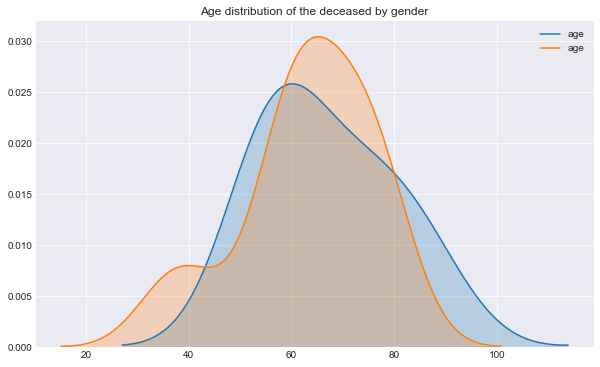

In [0]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased by gender")
sns.kdeplot(data=female_dead['age'], shade=True)
sns.kdeplot(data=male_dead['age'], shade=True)


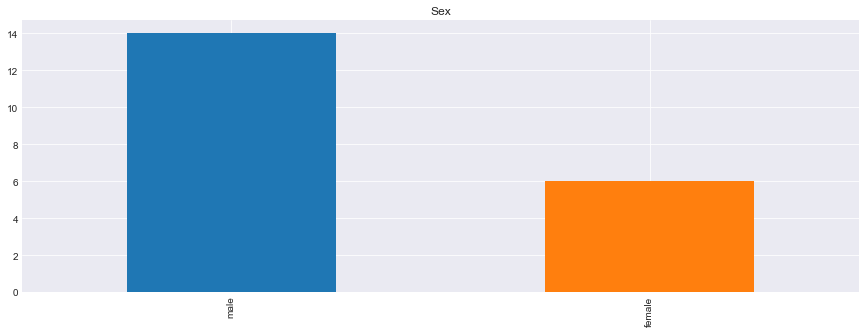

In [0]:
plt.figure(figsize=(15, 5))
plt.title('Sex')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlgAAAFvCAYAAACW8bVUAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3XlgVNX5//H3nTWTTPYNWQJJIOyBAC4oi4grUjdc0bi1tm5txWrdcENBpJbWvS79Yn/UClS0WrXKKvsikR3CkrCIkGRCyDKTZLZ7fn+kpCAJCckkM0me11+SO/fc5+bMjJ+cc++5mlJKIYQQQgghAsYQ7AKEEEIIIdobCVhCCCGEEAEmAUsIIYQQIsAkYAkhhBBCBJgELCGEEEKIAJOAJYQQQggRYBKwhGgkr9fLiBEj+MUvftGix5kyZQqvv/46APfccw979+497evvvvtuSkpK6tx2fP9169Yxfvz4M67ln//8Jx9++CEAH330Ee++++4Zt3Gmjhw5wvjx47n66qvZuHFjvfW8/vrrTJkyJaDHHj9+POvWrQtomy3t66+/Jjs7+5SfN7XPW0t9dQvRXpiCXYAQbcXChQvp06cP27ZtIy8vj/T09BY/5nvvvdfga1atWtXg/kePHm3S8XNycujVqxcAt9xyS5PaOFPr1q0jISGBDz744LT1CCFEKJOAJUQjffTRR4wbN46UlBT+9re/1Y6evPvuu3z88cdEREQwbNgwFi9ezJIlS/B4PLzyyit89913+P1++vXrx+TJk7Hb7Se163Q6eeqpp8jNzSUpKQmj0cjQoUMBuOiii3j11VdJS0vjiSee4MCBAxgMBvr378+UKVN46qmnALjjjjt49913ufXWW8nMzGTXrl08/PDDvPTSS7z66qsAVFZW8pvf/IYDBw4QFRXFlClTSE1N5fHHH6dXr178/Oc/B6j9d0pKCkuWLGHVqlWEhYVRUlLCsWPHeOaZZ9izZw9TpkyhtLQUTdO4++67ueaaa1i3bh1/+tOf6NatG3v27MHn8/H888/Xns+J5s6dy+zZszEYDCQkJPD0009TWFjIn//8ZyoqKsjOzmb27Nm1r1+4cOFJ9QDk5+eTnZ2Nw+EgISGBmTNnkpSURGFhIVOmTOHIkSN4vV6uvPJK7r333lNq2Lt3L08++SRVVVWkpaVRWVlZu+3777/nlVdeoaqqCoPBwIMPPsiYMWMAeOedd/j0008xmUx0796d6dOnExkZyT//+U8++ugjdF0nJiaGp59+mvT0dPbt28eUKVNwuVw4HA769OnDn//8Z6xWK6+99hoLFy7EbDYTGxvLSy+9RFJSEnl5eUydOpXS0lL8fj/Z2dlcf/31ALz66qv8+9//JiYmhu7du9f7nq2rz5OTkxk9ejTz5s0jNTUVgDvvvJPbbruNiy+++KT9m/Levuiii7j22mtZs2YNR44c4eqrr+ahhx46bd0NtXfie/qSSy6p93yFCClKCNGgPXv2qP79+6uSkhK1efNmlZmZqUpKStTy5cvVZZddpsrKypSu6+qJJ55QY8aMUUop9frrr6vp06crXdeVUkr98Y9/VM8+++wpbU+dOlX9/ve/V7quq6NHj6pRo0ap1157TSml1JgxY9SWLVvUp59+qu6++26llFI+n0899dRTav/+/UoppTIyMtTRo0drX//GG2/Utn18/7Vr16o+ffqonJwcpZRSc+bMUddff71SSqnHHntMvf/++7X7nPjvE//7tddeU88//7zyer1q7Nix6ptvvlFKKVVQUKBGjhypvv/+e7V27VrVt29ftWPHDqWUUn/961/Vrbfeeso5r169Wl188cW1dc+fP19dccUVStd1NX/+fPXLX/6yzn74aT0XXXRRbRv33Xdf7blnZ2erxYsXK6WUqq6uVtnZ2erLL788pb2rr75azZs3Tyml1IYNG1Tv3r3V2rVrVWlpqbr00kvVDz/8UHuOo0aNUj/++KNatGiRuvTSS1VpaalSSqlp06apt956S61bt05NnDhRVVZWKqWUWrFihbr88suVUkpNnz5d/etf/1JKKeXxeNT48ePV119/rQ4fPqyGDBmi3G537e9r4cKFyuv1qnHjxqlt27YppZQqLy9XV1xxhdq4caNauHChGjdunKqoqFBer1f98pe/VLfddtsp53a6Pn/xxRfVyy+/rJRS6sCBA2r06NHK5/OdtH9T39tjxoxR06dPr/29DRw4UB08ePC0dTfU3onvaSHaChnBEqIRPvroI8aMGUNsbCyxsbF07dqVefPm4XA4uPzyy4mKigLg1ltvZe3atQB8++23VFRUsHr1aqDmGq74+PhT2l6zZg1PPvkkmqYRFxdX51/oQ4cO5U9/+hPZ2dmcf/753HHHHfWOXAwbNqzOn/fu3ZshQ4YAcO211/Lcc89RUVFxxr+L/fv343a7ufTSSwFITk7m0ksvZcWKFZx77rl07tyZvn37AtCvXz8+/fTTU9pYsWIF48aNIy4uDoDrrruOqVOncujQoTOq5YILLqhto0+fPpSUlFBZWcl3331HWVnZSaN3ubm5jBs3rnbfY8eOsWvXLq655hqg5nd8fPpx06ZNOBwOHnjggdrXa5rGrl27WLNmDZdffjnR0dEAPPHEEwDMmDGDAwcOcPPNN9fuU15eTmlpKY8++iirVq3ivffeY//+/RQVFVFZWUlycjJ9+vTh2muvZdSoUYwaNYrhw4ezd+9eDh48yJNPPlnbVnV1NTt27CAvL49LLrmkdiR0woQJJ430nai+Pp84cSK33XYbkyZNYu7cuVx//fUYjcaT9l22bFmT39tjx44Fat4b8fHxlJWVsWbNmnrrbqi9+t7TQoQyCVhCNKCyspLPPvsMi8XCRRddBNRM6/3973/nyiuvRJ3wOM8T/yel6zpPPvkko0ePBsDlcuF2u+s8Rn1tHNetWzcWLlzIunXrWLt2LXfddRdTpkypredE4eHhdR7DYDj5nhZN0zCZTGiadtLxvV5vnfsf5/f70TTtlPp9Ph9A7fTd8WOoOh53quv6KT87sY3GMpn+9xV2/Fi6rqOUYs6cOdhsNgBKSkqwWq11tnFifcfb8/v9pKen889//rN2W2FhIXFxcaxdu/ak8y8vL6e8vBxd17n66qt59NFHa8+xqKiI6OhoJk2ahN/v54orruDCCy/kyJEjKKUwGAz8/e9/Z+vWraxZs4Zp06YxcuRIrr76aiIjI/nss89qj1NcXExkZCQzZsxo8P1yXH19npqaSu/evVm8eDFffPEF8+bNq/N329T39om/6xPfA01tr773tBChTO4iFKIBx68ZWbFiBUuWLGHJkiUsWrSIyspK+vfvz4IFC2pHgj7++OPa/UaMGMGHH36Ix+NB13WefvppZs6ceUr7I0eO5OOPP0bXdcrKyli8ePEpr/nHP/7BE088wYgRI3j00UcZMWIEO3bsAGr+R9WYYLJr1y527twJ1Fz/NHToUGw2G7GxsWzbtg2oCRHr16+v3aeuttPS0jCZTCxYsKB2n2+++Ybzzz+/wRpOPOevvvqq9u7H+fPnN3g9UWPP1W63M3jwYGbNmgXUBKBbbrnllN9rbGws/fv3rw1R27dvZ/fu3QAMHjyYAwcO8N133wGwc+dOLrvsMgoLCzn//PNZuHAhTqcTqLmb8YMPPmDEiBF8+eWXFBUVATWjnnfccQcAK1eu5IEHHqgdQdu8eTN+v5/c3FzGjx9Peno6v/rVr7jzzjvZunUrqamphIWF1Qas43dWbtu2jVGjRvH111/XhroTQ9hP1dfnABMnTmTGjBlkZmaSnJx8yr6jR49u9nv7RKeruyntCRHqZARLiAZ89NFH3HXXXSf9xR0VFUV2djYffPABN954IzfddBNhYWH06tWr9n9g999/Py+//DLXXnstfr+fvn378vjjj5/S/q9//WueffZZrrjiCuLi4sjIyDjlNddccw3r169n3Lhx2Gw2zjrrrNpb3C+//HKys7Nrl3aoT1paGm+88QY//PAD8fHxTJ8+HYDs7GweeeQRLrvsMrp27cp5551Xu8+oUaNqX3ec2Wzmrbfe4sUXX+T111/H7/fzwAMPcN555zV6iYMLLriAO++8kzvuuANd14mLi+Odd945ZcTlp+qqpy6vvPIKL7zwAj/72c/weDyMHz+eq6666pTXzZw5kyeeeII5c+aQkpJCWloaAHFxcbz22mvMmDEDt9uNUooZM2bQtWtXunbtyt69e2vvquzZsycvvPACdrude+65h7vvvhtN07Db7bzxxhtomsakSZN44IEHCA8Px263c/bZZ3Pw4EFuuOEGrrjiCiZMmEB4eDhhYWFMnjwZi8XCW2+9xdSpU3n//ffx+Xz89re/rb1ZYNeuXUyYMIGoqCj69OnDsWPH6vw91NfnAGPGjGHy5MknTWmeaPjw4c1+b59o9OjR9dbdlPaECHWaqmv8XgjRKFu3bmXjxo3cfvvtAMyaNYvNmzfz5z//OciVCXF6GzduZPLkyXzxxRenTPmCvLeFaC4JWEI0g9Pp5MknnyQ/Px9N0zjrrLN44YUX6pxyESJUPPbYY6xfv54//elPDB48uM7XyHtbiOaRgCWEEEIIEWBykbsQQgghRIBJwBJCCCGECDAJWEIIIYQQARZyyzQ4HGe+snQostutOJ11Lyopgkv6JjRJv4Qu6ZvQJX0TfImJkXX+XEawWojJVP/qyiK4pG9Ck/RL6JK+CV3SN6FLApYQQgghRIBJwBJCCCGECDAJWEIIIYQQASYBSwghhBAiwCRgCSGEEEIEmAQsIYQQQogAk4AlhBBCCBFgErCEEEIIIQJMApYQQgghRICF3KNyhBBCCCGay+VyMn36izidFZSVlfKzn11L7959mDlzBuHh4cTGxmKxWHnqqef4+OM5LFz4DZqmMXbspdxww83NPr4ELCGEEEK0qC+3F/L5toKAtnnVgE5c2T+53u2HDh3i4osvZfToiygudvDgg78kPDycyZOnkJaWzjvvvElxsYN9+/JZvHghb731Ppqm8dBD93PuueeRktKjWfVJwBJCCCFEuxMfH8+8ef9g2bKlhIdH4PP5KC4uJi0tHYBBg7JYvHgB+fl5FBYW8Nvf3gdARUUFhw4dkoAlhBCNphSapxxlCgOjNdjVCNFhXNk/+bSjTS3ho49mM2BAJtdeez3ff7+BNWtWkpSUzL59+aSmprF9+1YAUlK606NHGn/842tomsbcuR+Sltaz2ceXgCWEaL+UjvngMiw/rsLk2I7JsRWDu7Rmk8GMMkfgi8vA220knm6j8CUNAoN8LQrRHlxwwSheeeUlFiz4D9HR0RiNRiZN+j0vvTQFmy0cs9lEYmISvXplMGzY2dx//8/xeLz07dufxMTEZh9fU0qpAJxHwDgcFcEuISBiYsIpLa0MdhmiDtI3oSmg/eL3YN3zGeHfv43p2G6UwYw/qhv+6B7o9s6g+9B8VWjeSoyl+RhL89FQ6GGxVA28k6qBd6FscYGppR2Qz0zokr45M/Pnz+Oiiy4hNjaWd999C7PZzF133dOsNhMTI+v8eYN/qum6znPPPceuXbuwWCy8+OKLdO/evXb7vHnzmDNnDiaTifvuu48xY8bgcDh45JFH8Hq9JCYmMn36dGw2G0uWLOHNN9/EZDIxYcIEbrzxxmadlBBC/JRl/2Ls3z6G0VWAL6o7riEP4u0yHIzmevfR3OWYHNuwHFpBxHd/InzjX6jqdwtVQ+5Hj+jUitULIVpSXFwcDz/8ADZbOHa7naeeeq7FjtXgCNaCBQtYsmQJ06dPZ9OmTbzzzju8/fbbADgcDu6++27mz5+P2+1m4sSJzJ8/nz/84Q/079+fa665htdff53IyEhuvfVWxo0bx8cff4zNZuOWW27hL3/5yynDcDKCJVqa9E1oana/+L1ErP8D4d+/hT+qO1X9b62Z8tO0M2rGUP4DYXs+x3xoJcocjuv8p6juNxG0jrtsoHxmQpf0TfA1eQQrJyeHkSNHAjB48GC2bdtWu23Lli1kZWVhsViwWCykpKSQm5vLk08+iVIKXdc5cuQIPXr0IC8vj5SUFKKjowEYOnQoGzZs4IorrgjE+QkhOjCD8zBR39yPuWAD7h4XUzXwTjBamtSWHtWNyqEPYOh9HbZN7xH57eNYd3+Kc8wf8MekBbZwIUS71WDAcjqd2O322n8bjUZ8Ph8mkwmn00lk5P+SW0REBE6nE03T8Pl8XH311bjdbh544AGOHDlS52t/ym63YjIZm3teQWc0GoiJCQ92GaIO0jehqcn9UvYDpk+ugapj+C/4HcbU0dgb3qth9lS4bCr+vIWYc2YRO/dS/ONfR/WfEIjW2xT5zIQu6ZvQ1WDAstvtuFyu2n/ruo7JZKpzm8vlqg1RZrOZr776itWrV/PYY48xefLkel97IqfT3fSzCSEybBu6pG9CU1P6RXMVEfPJdajqMlwjnscf0wOc1YEtrNMotIsGELHhVUz/uofK/RtwDX+iQ91tKJ+Z0CV9E3z1TRE2eFHBkCFDWL58OQCbNm0iIyOjdltmZiY5OTm43W4qKirIy8sjIyOD5557jrVr1wI1I1WappGens6BAwcoLS3F4/GwYcMGsrKyAnFuQogOSKs+Rsznt2B0FeAa/kRNuGohyhaH84KncadeRvimd4j+921o1cda7HhCiLavwYvcj99FuHv3bpRSTJs2jeXLl5OSksLYsWOZN28ec+fORSnFr371Ky677DLy8vJ47rnnADAYDDzzzDOkp6fX3kWolGLChAnceuutpxxPLnIXLU36JjSdUb94K4n5142YirfjOu8xfEmZLVvcCSwHlmLb/D7+6B6UXf1Rh7jLUD4zoUv6JvjqG8GSdbBaiLzpQ5f0TWg6k36xL3mEsJ1zqTznd3g7n9PClZ3K5NhOxLoZ6OGJlF49Bz0qpdVraE3ymQld0jfB1+S7CIUQIpRY9n6BbeccqjOuCUq4AvAl9sd5/mQi1rxEzCfXUXb1HPyxzX+0hhAicFwuJ9Onv4jTWUFZWSk/+9m19O7dh5kzZxAeHk5sbCwWi5WnnnqOjz+ew8KF36BpGmPHXsoNN9zc7ONLwBJCtBmG8kNELn0UX2wvqvsEd6Fif1wvnCOexb56KjGfTqD0uk9lGQch6mHN/ZiwnXMC2mZ135tx97m+3u2HDh3i4osvZfToiygudvDgg78kPDycyZOnkJaWzjvvvElxsYN9+/JZvHghb731Ppqm8dBD93PuuefJw56FEB2E7iNq4YNouo/KYb8Jibv49OjuNSFrxbNEf3YLpRP+hW4/K9hlCSGA+Ph45s37B8uWLSU8PAKfz0dxcTFpaekADBqUxeLFC8jPz6OwsIDf/vY+ACoqKjh06JAELCFExxCe8wbmgg24hv4aPSI52OXU0iO74Dr/Sewrnyf684mUXvcJKiw22GUJEVLcfa4/7WhTS/joo9kMGJDJtddez/ffb2DNmpUkJSWzb18+qalpbN++FYCUlO706JHGH//4GpqmMXfuh6SlNX/KXwKWECLkGcoPEp7zGp4u5+PtNjLY5ZzCH5OG69xHiVjzEtFf3E7pVXPAEhHssoTo0C64YBSvvPISCxb8h+joaIxGI5Mm/Z6XXpqCzRaO2WwiMTGJXr0yGDbsbO6//+d4PF769u1/ymP8mkLuImwhcmdH6JK+CU2n65eor36B5eC3lF/8Z5QtrpUrazzz4fWEfzcTT49LKL/ivXbz/EL5zIQu6ZszM3/+PC666BJiY2N59923MJvN3HXXPc1qs8kLjQohRDCZf1iBdd/XVGdcE9LhCsDb+RyqBtyOdd83hK//Y7DLEUL8RFxcHA8//AD33/8L9u7dzXXX3dBix5IpQiFE6PJ7sa94Bn9EMu6e44NdTaN40q7AWHaAiA2v4o/rjbvXVcEuSQjxX2PGXMyYMRe3yrFkBEsIEbJs2/4fpmN7qBpwOxgtwS6ncTSNqkG/wBfXh8jFD2NybA12RUKIIJCAJYQISVr1McLX/xFvYia+TsOCXc6ZMZpxnfMwymIn6qu75bmFQnRAErCEECHJtvl9DJ7ymtErTQt2OWdMhcXgOud3GCodRC5+GELrfiIhRAuTgCWECDmauwzb5r/i6XwuenTbfc6fPzad6n63Yt2/ENuW/wt2OUKIViQBSwgRcmxbZmHwOnFnTAh2Kc3mTh+Ht9NQIla/KNdjCdGBSMASQoQUzVOBbfN7eDsNxR/TI9jlNJ+mUTnkfpQ1isiv70PztI+1/oQQpycBSwgRUsK2/g2Du4zq3m1/9Oo4ZYnENey3GCsOErFqSrDLEUK0AglYQojQ4a0kfNM7eJMG449t/rPAQok/vg/unldh2/ER5oPfBrscIUQLk4AlhAgZtu0fYqg+1q5Gr05U3ecG/JHdiFzyCJq7LNjlCCFakAQsIURo0P3YNr+PL74f/vjewa6mZRjNVA65D0NlERErZapQiPZMApYQIiRoexdgdP6IO+3yYJfSovyxPXH3ugZb7lws+xcHuxwhRAuRgCWECAmGDe+h2+LxnnV2sEtpcdW9J+CL6o7928fQPM5glyOEaAESsIQQQWc8thfDvm9x97gEDMZgl9PyjGaqBt+D0VVA+Hd/CnY1QogWIAFLCBF0YVv/hjKY8fQYG+xSWo0/LgN397HYNr+PsXhHsMsRQgSYBCwhRFBpHidhufNQ3S9AWaODXU6rqu4/EWWOIHLZE6D0YJcjhAggCVhCiKCy7pqPwetC7z0+2KW0OmWJpLr/rZgLcgjbOS/Y5QghAkgClhAieJTCtnUWvtiekJAR7GqCwpMyGl98HyLWTEWrPhbscoQQASIBSwgRNKaCDZiO7cXT49JglxI8moHKzF+gucsIXz8z2NUIIQJEApYQImjCcuehTDY8Xc4LdilBpUen4Ol+EbZtszGW5ge7HCFEAEjAEkIEh7cK657P8XQ+F0xhwa4m6Kr73AhGMxGrpwa7FCFEAEjAEkIEhTX/Pxi8LjwpFwa7lJCgwmKo7nU11n3fYP5xTbDLEUI0kwQsIURQhOX+E394Mv74PsEuJWS4e45HtyUQsWqKLNsgRBsnAUsI0eoMFYcxH1qJt9tI0ORrqJbRQlW/mzE7tmLd/WmwqxFCNIN8swkhWl3YrvloKDwpo4NdSsjxdh2BLyadiLUzwO8JdjlCiCaSgCWEaF1KYc2diy+hH3pEcrCrCT2ageq+N2F0/kjYzrnBrkYI0UQSsIQQrcpUkIOpbD+ebjJ6VR9f0iB8cb0J3/Aq+KqDXY4QogkkYAkhWlXYrvkooxVP54699tVpaVrNKJarANv2D4NdjRCiCSRgCSFaj+7Dmvcl3k5DwWwLdjUhzZc4AG/CAMJzXgdvVbDLEUKcIQlYQohWY/5xDYbqErxdhge7lDahuu+NGKqKsW39INilCCHOkCnYBQghOg7r3s9RJhuVCYPZXKTYeUyRW6LYVaqo9rvQUBg1CDdBn1iNfnEa/eM0esWAyaAFu/xW54/vgzdpEOEb36J6QDbKYg92SUKIRpKAJYRoHX4v5r1fsS1sCHd8aaTE7QcgzqroYdfpajfg9en4Fbi8sOCggU/ya0JVQhj8LFXjqlQDqVEdK2hV97mRyOVPEbb971Rl3RvscoQQjSQBSwjR4grKq1n09Vwmecp4zXkuqXF+7s7wkxGtE2OpeY3NZqGqylu7j1JQVK2xp0xjVZGRv+UamLVTMSge7h1o4LxkDU1r/2HLH9cLb8IAbJvepSrzLjBag12SEKIRJGAJIVqMrhQfbzrCGyvyeVFbQKUxnGvP7kNChLfBfTUNkm2KZJtiRCedUjesKDTyn0Mm7vtW55wkjV8PMjAwvv2HLHfGNdhXv0jYrvlU95sY7HKEEI0gF7kLIVrEodIqfjl3M39YspdesWZ+Zs7BlZBFQkTT/q6LscLPUvy8ep6bO3t5yT2mk73Qz5Nr/JS6VYCrDy2+xIH4YtKxff8W6P5glyOEaAQJWEKIgNt2pJw7P9zIniIXd5zTlWf6HMHid1KScHaz2zYbYFw3P68Pd3Nddx/fHNS57is/Sw6144cjaxruXldjKtuPJf8/wa5GCNEIDQYsXdd55plnuOmmm8jOzubAgQMnbZ83bx7XXXcdN954I0uXLgXg8OHD3HnnnWRnZ3PbbbeRn58PwKxZs7jyyivJzs4mOzu79udCiPZj2d6j3DtvCxajgccu7snwHnGcdfhrfKYIyqP7Bew4NhPcnO7jpWEeosw6D6/UeXy1nwpP+xzN8nY+B7+9c826WKp9nqMQ7UmDY/WLFi3C4/Ewd+5cNm3axPTp03n77bcBcDgczJ49m/nz5+N2u5k4cSIXXHABr776KrfddhsXX3wxK1asYObMmbzxxhts376dl19+mQEDBrT4iQkhWt/8zYeZsXgvKbE27h+RSlSYCc3vIblgKcfislCGwF/22SNSMW2Yh38dMPLxfhM7ShQzRxjpGdPOrs3SDLh7XUX4xr9g/mE5XnlQthAhrcERrJycHEaOHAnA4MGD2bZtW+22LVu2kJWVhcViITIykpSUFHJzc3nssccYPbrmw+/3+7Faa+562b59O++++y633HIL77zzTkucjxAiSP69rYDpi/bSv1Mkky5MJyqsJkzFF6/D5HNREj+sxY5tMsD1qX6ezfJQ7lHcttDPl/vb35Shp9sodFs84RvfDnYpQogGNPjnpNPpxG7/3+J2RqMRn8+HyWTC6XQSGRlZuy0iIgKn00lcXBwA+fn5vPzyy7z55psAXHnllUycOBG73c6DDz7I0qVLGTNmzEnHs9utmEzGgJxcMBmNBmJiwoNdhqiD9E3gLdvtYOqCPQzoHMXvLumFyfi/v9267PgWvzEMb6dB2AzmetvQNA2bzdKsOobY4NVYxYyN8NRanb1OI4+fY8HYjhYpVb2vxLLp/xHj2Q9JgZtyPR35zIQu6ZvQ1WDAstvtuFyu2n/ruo7JZKpzm8vlqg1ca9eu5fnnn2fGjBmkpaWhlOKOO+6o3T569Gh27NhxSsByOt3NP6sQEBMTTmlpZbDLEHWQvgmsHQUVPDhvM52jw/jFud2oPmEtK5RO3A+LKI0ZSKVbAZ5EgL1EAAAgAElEQVR626lZB6v+7Y1lA57KhP+318SsbXDgmI+pww3YTO0jZGmdRxO1dS6+VW/iHPOHVjmmfGZCl/RN8CUmRtb58wanCIcMGcLy5csB2LRpExkZGbXbMjMzycnJwe12U1FRQV5eHhkZGaxdu5apU6fy/vvvM3DgQKBmJGz8+PG4XC6UUqxbt06uxRKijTtUWsVDn2zDbjHx4MgehJlPHn2OObYFq/sox+KyWrUukwHuzvBxZy8vS3/UuWeJn5Lq9nFhuLJE4uk6grBdn6BVlQS7HCFEPRocwbrkkktYtWoVN998M0oppk2bxqxZs0hJSWHs2LFkZ2czceJElFJMmjQJq9XKtGnT8Hq9PP744wCkpqYyZcoUJk2axO23347FYmH48OG112kJIdoej0/nsc934PHrPDo6nWjbqdN/SQVL0DUjZbGZQaiwZjmHhDDFa9vNZC/085cLjXSLbPsjWe70cVgPLCZsxz+oGvpgsMsRQtRBUyq07vd1OCqCXUJAyLBt6JK+CYxXluxl7sbD3D+iB5mdo+p8zYjF4/GbItjV/3cNtheoKcK67C3XeGmzBatR4y9jjPSMbvshK2LVCxgqHZRkrwFj/de2BYJ8ZkKX9E3wNXmKUAghfmrZ3qPM3XiYi3ol1BuuIirysbv2t/r0YF16Rimey/Lg1xV3L/az7WhI/V3ZJO70cRhdBVhl4VEhQpIELCHEGSkor2bKN7voFmPj2sxO9b4uqWAJAMfiBrdWaafVza6YMtRDmEHxy6V+coradsjyJWfhjzgL2+a/BrsUIUQdJGAJIRrNryue/ioXj0/nF8NTMBvr/wpJPrIYpz0VrzWuFSs8vWSbYspQN7EWnQeW+fm+LYcszYA77TLMhTmYirYEuxohxE9IwBJCNNonW46w6cdybszqTHKktd7XWauLiCndGhLTgz8VZ4VnszzEWWtC1kZH2w1ZnpQLUUYrYdv/HuxShBA/IQFLCNEoDqebN1fso0+yneE9Yk/72qSCmueShmLAAoixwjNZHmL+O5K1pbiNhixzOJ4u5xO2+19onvZxg5AQ7YUELCFEo/xxaR4ev87EIV3QtNPfhZdYsIzqsCSqbZ1bqbozF2eFZ4d4iDIr7vu27V747km9BM1XiXX3p8EuRQhxAglYQogGrcg7yuLdxYzrm0zSaaYGAQz+auKL11EaMxAaCGLBFmeFZ7Lc2P8bsnaUtL2Q5Y9Jxxedim3b3yG0Vt0RokOTgCWEOK1Kj5+XF++lc1QYl/ROaPD1ccXrMepuymIHtUJ1zZcQBs9mubEZFfcu9ZN7rI2FFE3D02MspqM7MBVuDHY1Qoj/koAlhDitv649SGGFm4nDupz0EOf6JBYux2+wUh7duxWqC4yEsJprsizGmiUcdrWxkOXpOgJlDCNs+4fBLkUI8V8SsIQQ9Soor+aj7w9xbvcYeiZENLyDUiQVLqM8ui/K0LKriwdakk3xbJYHs6a491s/+8rbUMgyh+PpNoKwPZ+hucuCXY0QAglYQojTeHvVflBw9YD6FxQ9kb0iD1vVEUqD9OzB5kq2KZ7O8qCU4ldL/fzobDshy9PjYjR/NdZd84NdihACCVhCiHrsKnTynx1FXJSRQFyEpVH7JBYuB2izAQugc7hi8mAPVb6a6cLCyrYRsvwxafhi0gjbOSfYpQghkIAlhKiDUorXlucTYTVyWZ+kRu+XWLgMV0RKSK3e3hQpdsUTgzyUVNeMZJVUt42Q5Um5EHPxDoyO7cEuRYgOTwKWEOIUaw8cY/3BUq7om0y4xdiofUyeMmKObaIsZmALV9c6ekYpHh/k4bCrZgmHck/ohyxv1wtQBjNhufOCXYoQHZ4ELCHESXSleG3ZPhIjLIxOb/xIVIJjNQblp7SNLM/QGH1jFI8M9JJXpnhgmR+XN7RDlrJE4u00lLDdn4DfE+xyhOjQJGAJIU6yZHcxe4tdXDUwuVHLMhyXWLgcr8mOMzKtBatrfYPjdR4a4GV7ieKhFTrVvtAOWZ6UCzFUH8NyYEmwSxGiQ5OAJYSopSvFX9cepFOklaFdYxq/o9JJLFpBWcwA0Nrf18o5iToP9PWyoUjnkVU6Xn/ohixf0iD0sFjCdso0oRDB1P6+CYUQTbZ871H2Fru4ol8SBkPjH3MTVbYDi6eUstj2cf1VXUZ20rmnt4+VRxRPrtXx6SEasgxGPF1HYjmwGK3SEexqhOiwJGAJIYCaOwffW3uARLuFYd3OYPQKSChahUKjLKZ/C1UXGi7u4uf2nl4W/qB4fr2OHqLP/vOkXIim/ITt/lewSxGiw5KAJYQAYNW+EnYXubiibxLGMxi9AkgsXInL3gOfOaqFqgsd41P83Jjq5d/7FdNzdFQIhiw9qiu+2F6E7ZwrD4AWIkgkYAkhUErx/pqDJERYOLd77Bnta/KWE126pd2PXp1oQg8/V6X4mLdX8erm0AxZnm6jMJXkYizeEexShOiQJGAJIVh34BjbCyq4rE/iGY9exTvWYVD+mgvcOwhNg1vTfVzaxccHuYr3d4RewPJ2GY7SjITt+TTYpQjRIUnAEkLwwfofiLWZOa/HmY1eASQUrcRnDMcZmd4ClYUuTYO7M3yM6uTnza06f9+lB7ukkyhrFL6kQVh3/wtUaNUmREcgAUuIDm5XoZOcH8oY0yse8xmsewWAUiQUraQ8ui9ojVvxvT0xaHBfHy/nJvp5ZaPOJ3mhFWQ8XUdgdBVgPrI+2KUI0eFIwBKig/sw5xBhJgMj0uLPeN8IZz626sJ2vTxDQ4wG+G1/L1nxfl74Tuc/B0InZHnPGoYyWrHukmlCIVqbBCwhOrCiCjcLdjk4PzWu0c8cPFFi0UqADnX9VV1MBvjdAC/9YnQmr9VZeihEQpYpDO9ZZ2PN+0IenSNEK5OAJUQHNm/TYXSluKhXQpP2TyhcSaWtCx5r459Z2F5ZjPD7TA9pkTq/X62zpiA0Qpan6wgM7jIsB78NdilCdCgSsITooCo9fuZvPkxWl2gS7JYz3t/gqyK2JKdDLc/QEJsJnhjkoUu4zkMrdL4rDH7I8iVloluiai52F0K0GglYQnRQX2wvwOn2c3Hvpo1exR3dgFH3UBbbsacHf8puhqcGe0gM0/n18hAIWQYT3i7nYd23AM3jDG4tQnQgErCE6ID8uuIfOT+SFh9OWnxEk9pIcKzGbzBTEZkR4OravmgLPJPlISFM58EQCFmeriPQ/NVY9n0d1DqE6EgkYAnRAa3ZX8KPZdWMzWja6BVAvGM1zsgMlPHMpxc7ghgLPJvlIem/IWt9EEOWP643/vBErHv+HbQahOhoJGAJ0QF9vOkw0TYTg7tEN2l/a3URkRV5lMX0C3Bl7cvxkazk/04XrgvWhe+ahrfzeVh+WIbmLgtODUJ0MBKwhOhgDpVWsXrfMUakxp3xY3GOi3esAaBcLnBv0Ikh6zdBDFneLsPRdB+WfQuCcnwhOhoJWEJ0MJ9uOYKm0aSFRY+Ld6zBa46iMrxrACtrv6KOh6zwmpC1Ngghyx+TLtOEQrQiCVhCdCBun85nWwsY1CWa2HBz0xpRigTHmv8+Hke+QhorygLPDP5fyFp1pJVD1vFpwkPL0apLW/fYQnRA8u0oRAeyeLeDsmofo9ObPnplr9iD1X2Usmi5/upMHQ9ZXSJ0frtcZ9EPrRuyZJpQiNYjAUuIDuSfmw7TKdJK76SmLc0AkPDf669kgdGmOR6y0qJ0fr9K59/7Wi9k1UwTJmHdK9OEQrQ0CVhCdBC5hRVsO1LBqPR4NK1pF7cDxBetpsp2Fl55PE6TRZhh8iAP/WP9PL1OZ96eVgpZtXcTrkCrPtY6xxSig5KAJUQHMX/zESxGA+f1iG1yG5rfQ9zRDTI9GABhJngs08vQBD/TcnQ+2Nk6IcvbZTiakmlCIVqaBCwhOoBKj59vcosY1i2acIuxye3EHtuEUXfL8gwBYjHC7wZ4OT/Jz58367y5xY9SqkWP6Y9Jwx+eRJhMEwrRokzBLkAI0fIW7XZQ5dU5P61503rxjtXompHy6N4BqkyYDPCb/l7CjIr3dphw+XQezTI0axr3tDSt5tmEe79Cqy5FhcW0zHGE6OBkBEuIDuCzrQV0irSSHh/erHYSilbjtKehG20BqkwAGDT4VR8f47r5+MduxTPrdLx6y41kec86t2aa8MCiFjuGEB2dBCwh2rl9RyvZcric81PjmjUqYvaUElW2k3J5PE6L0DS4o6ePG1O9/Hu/YtIKnSpfy4Qsf2w6ui0ea95/WqR9IUQjApau6zzzzDPcdNNNZGdnc+DAgZO2z5s3j+uuu44bb7yRpUuXAnD48GHuvPNOsrOzue2228jPzwdgyZIlTJgwgZtuuol58+a1wOkIIX7qs60FGDWadXE7QFzxOjQU5dFy/VVL0TS4PtXPL3t7WX1E55dL/ZS6WyBkaQa8nc7GcnAZeCsD374QouGAtWjRIjweD3PnzuV3v/sd06dPr93mcDiYPXs2c+bM4a9//SszZ87E4/Hw6quvcttttzF79mx+9atfMXPmTLxeLy+99BL/93//x+zZs5k7dy4Oh6NFT06Ijs7r1/liewGZnaOICmveJZcJjjX4jDackakBqk7U5+IufiYN8JJ7THHXYj8FrsCHLG/nc9D81VgOfhvwtoUQjQhYOTk5jBw5EoDBgwezbdu22m1btmwhKysLi8VCZGQkKSkp5Obm8thjjzF69GgA/H4/VquVvLw8UlJSiI6OxmKxMHToUDZs2NBCpyWEAFiRd5Syal+zL25HKRKKVlMR3Qe0pt+FKBrv3CSdpwZ5KKxU3LHIT15ZYEOWL74vuiUSa75MEwrREhr8k9bpdGK322v/bTQa8fl8mEwmnE4nkZGRtdsiIiJwOp3ExdV8mefn5/Pyyy/z5ptvUlJSUudrf8put2Iytf0vcKPRQExM8y4oFi2jI/XNFzsdxEWYOTc9AYOh6ddfhVUcwFZ1mJJul2CzWQJY4f9omtZibbdVQ20w3a54dr3GXYv9vH+ZjSHJAfx+7HYO1gOLMUaawFj/774jfWbaGumb0NVgwLLb7bhcrtp/67qOyWSqc5vL5aoNUWvXruX5559nxowZpKWl4fF46n3tiZxOd9PPJoTExIRTWirXNoSijtI3hRVuVu4t5oq+SVRWeprVVuz+bwE4GtGb6qrmtVUfm81CVQu13ZZ1MsMLQzRe3GQm+6sq/nCBgVGdA3N/kilxGPa8xbi2L8KbcmG9r+son5m2SPom+BITT80y0IgpwiFDhrB8+XIANm3aREZGRu22zMxMcnJycLvdVFRUkJeXR0ZGBmvXrmXq1Km8//77DBw4EID09HQOHDhAaWkpHo+HDRs2kJWVFYhzE0LU4T87ClHA8NTmXdwOEO9Yg9saT3VYcvMLE2csyaZ4YaiHLuE6k1bofB6g5xf6EgeiTDa5m1CIFtDgCNYll1zCqlWruPnmm1FKMW3aNGbNmkVKSgpjx44lOzubiRMnopRi0qRJWK1Wpk2bhtfr5fHHHwcgNTWVKVOm8Pjjj/Pzn/8cpRQTJkwgOVm+rIVoCUopvthRSHpCOIl2a7Pa0nQf8cXrOBaXVXObmwiKaAs8m+Xhla1mnlkHR6vhzj5a8xYkNVrwJg/Guu9rnKOngaHtX54hRKjQVEs/l+EMORwVwS4hIGTYNnR1hL7ZXlDBnR9u5NahXRiZHt+stqJLNjN85a3szbiXkoRzAlThqWSKsHG8Ory5w8zqIiPZvTUmDTZgaM76ZodWE7Hhzxy79hN8nevu347wmWmrpG+Cr8lThEKItufL7YWYDRpDuzX/MSgJjjUoNMqj+wagMtFc5v8+Wufyrj5m71JMXqvj9Tf972RvchbKYMaa/3UAqxRCSMASop3x+nW+yS1iUJeoZj3Y+bh4x2oqI1Lwmev+K020PoMGd/XycXOal68OKH6zQqfS28SQZbbhS+iHZd8CCK0JDSHaNAlYQrQzK/NLKK/2cW4zV24HMPpcxBzbTJk8HifkaBpc18PPvX28rCvQuWepn5LqpgUkb6dhmMr3YyzNC3CVQnRcErCEaGe+2lFIVJiJfsnNH3GKK/4Og/LL43FC2EWd/Twy0MueUsWdi/z86DzzkOXtNBQAy76FgS5PiA5LApYQ7UhppZeV+SWckxKDsRkLix4X71iD32CmIqpXAKoTLWVYos7kwR6OVtes+r679MxClgpPwBedinX/gpYpUIgOSAKWEO3Igl1F+HTV7Ac7H5fgWE1FVAbKYA5Ie6Ll9IlRTBniQVeKuxb52VB0ZiHL12kIpoIctKqSFqpQiI5FApYQ7chXO4roGh1G1xhbs9uyVhVgd+6T6cE2pJtd8eJQNzEWnfu/9bP4h8YvSOrtNAxN6VgOLGnBCoXoOCRgCdFOHCqtYntBBWenNH9pBoAEx1oAucC9jUkIgylDPXS36zyySuefexsXsvwxqehhsVj3y3VYQgSCBCwh2okFuQ4AhgUoYMU71uAxR1EV3jUg7YnWE2mGZ7I8ZMX7mbpB5+2tfhpcU1oz4O00FPPBpeBvH8+EFSKYJGAJ0Q4opfh6ZxE9E8KJj7AEoEGdeMcayqP7gSZfE22R1QiPDPRyYScf72xXvPy9jt5AyPJ2GobBW4n5x7WtVKUQ7Zd8cwrRDuwtdrGvpDJgo1eR5buxekool+nBNs1kgPv6+hjfzcecPYrn1uv49fpDli9xAMpoQe4mFKL5JGAJ0Q58vdOBQYOhXQM3PQhQJhe4t3maBtk9fdyQ6uXzfYon1pzm0TpGC77ETFnVXYgAkIAlRBunK8WC3CL6JkcSGWYKSJsJjjVU2jrjtQZmuQcRXJoGN6T6ye7pZcEPiodX6lT76g5Q3k7DMDqPYDy6s5WrFKJ9kYAlRBu39XA5BRXugN09aPC7iT2aI9OD7dDPUvz8oreXlUd0Hlxe9/MLvZ2GoNCw7pNpQiGaQwKWEG3c1zuLMBs1BneJCkh7MSUbMerumgvcRbtzaRc/D/Tz8r1D595v/ZR7Tg5ZKiwGf2xPLLJcgxDNIgFLiDbM59dZtLuYgWdFEWY2BqTNBMcadM1IeXTvgLQnQs+oTjoPD/Cyo0RxzxI/x9wnhyxvp6GYizZjcBUEqUIh2j4JWEK0YesPllJa5eWc7oGZHgSId6zGGZmObmz+avAidJ2TqPP7TC/7yhW/Wuqn7ISQ5e00DADL/sXBKk+INk8ClhBt2De5RdjMBvp3igxIexb3UaLLdsrjcTqIwfEnhKwTpgv1qG74w5Ow7JNpQiGaSgKWEG1UtdfP0j3FZHWNxmwMzEe5dnmGmAEBaU+Evsw4nUcGetlbqrjvWz8VHgWahq/TECyHVoC3KtglCtEmScASoo1amV9ClVfnnADdPQiQULQKr8mOy949YG2K0JcVr/PwQC+7jinuX+bH6VU1D3/2u2tClhDijEnAEqKN+ia3iOgwExmJ9sA0qHQSHKtrlmeQx+N0OMMSdB4a4GV7ieLBZX7Ko/uiTOFyN6EQTSTfokK0QRXVPlbllzC0WwwGgxaQNiPLd2N1H5XpwQ7snESd3/b3suWo4tcrNaoTB2HdtxCUHuzShGhzJGAJ0QYt3VOMV1cBW1wUaqYHAcpi5AL3jmx4ks6Dfb1sdCjeLR2CoaoY7fD3wS5LiDZHApYQbdA3uUUk2i30iAvcUgoJRatwhXfDa5HH43R0Izrp3N/Xy6xjmehoqN3fBLskIdocCVhCtDHFTjcbfijl7G4xaFpgpgeNvkpiS76nXEavxH+NOkvn+owwNugZFOR8ji4PfxbijEjAEqKNWbi7GF3B2QFcXDSueD0G5ZPpQXGSS7v6ORqdSTf3Hv66cD1KQpYQjSYBS4g2ZmFuEV2jwzgrKixgbSY4VuM3WKiIyghYm6J96JI6EICyHV8za90PQa5GiLZDApYQbUhBeTVbj1QwtFvgRq8AEopWUhHdB2UwB7Rd0fZVR3TBY41ngn0bb6/az7+3yfMJhWgMCVhCtCGLdhcDMLRbdMDatLkOEeE6SJk8HkfURdOoSBjEEN9mBiZZmbpwD2v3lwS7KiFCngQsIdqQhbscpMTaSIq0BqzNBMd/l2eIlfWvRN0q4gdj8lfyWO9izoq08vvPd7CryBnssoQIaRKwhGgjDpdVs6OggqFdAzd6BTXLM1RbE6gO6xTQdkX74Yzrh66Z6Xp0JQ+MTCXMbOS3n2yjoLw62KUJEbIkYAnRRize7QBgSACnBzXdS3zxuprlGQK05INof5QxjPLoPiQWLiM23MyDI1Op9PiZ9Ol2XB5fsMsTIiRJwBKijViQ66B7rI1Ee+CmB2OObcHkc8njcUSDSmMziXAdJNx5gC7RYdwzPIX8oy6e/jIXvy7LNwjxUxKwhGgDDpVWkVvkbIG7B1ehMFAe3Teg7Yr2pzQ2E4DEwuUA9OsUyY2DO7Miv4Q3VuwLZmlChCQJWEK0AYt21UwPBvLuQagJWM7IdPym8IC2K9ofT1gilbbOJBYuq/3Zhb0SGN0znr9vOMRnW48EsTohQo8ELCHagIW7HaTGhRMfYQlYm2b3MaLKdsjq7aLRymIziTu6AaPPVfuzGwd3pl+ynemL9rL5x7IgVidEaJGAJUSIO3isit1FrsCPXjnWoKHk+ivRaKWxmRiUj3jHmtqfGQ0aPx+eQly4mcc+34HD6Q5ihUKEDglYQoS449ODgbx7EGrWv/Ka7LjsPQLarmi/nJE98RnDa6/DOi7CYuLeC3rg8vh59LMdeHx6kCoUInRIwBIixC3c5SAtPpy48MBND6IUCUWrKI/uB5p8DYjGUQYTZTH9agLWTx783Dk6jDvO6cb2ggpmLN4rD4YWHZ58swoRwvYfrWRvsSvgdw9Glu/C6i6W66/EGSuLzSTMXUxU2c5TtmV1jWZc3yQ+21bAJ1vkonfRsUnAEiKELTq+uGjAV29fDSDXX4kzVhozEICEohV1bh8/IJn+nSL545I8dhRUtGZpQoQUCVhChLCFuxz0TAgnNtwc0HYTHKuoDO+K1xob0HZF++ezROO0p5J0wnINJzJoGned243IMBOPfb6DsipvK1coRGiQgCVEiMo/6iL/aGXApweNXiexRzdQGjswoO2KjqM0NpPoY1sxu0vq3G63mrhneHccLg/P/mcXulyPJTqgBgOWrus888wz3HTTTWRnZ3PgwIGTts+bN4/rrruOG2+8kaVLl5607YMPPuCVV16p/fesWbO48soryc7OJjs7m/z8/ACdhhDtz6JdDjRaYHrQsRqD8lMaOyig7YqOoyw2Ew1FYtHKel+TGh/ODYPPYtW+Ev62/odWrE6I0GBq6AWLFi3C4/Ewd+5cNm3axPTp03n77bcBcDgczJ49m/nz5+N2u5k4cSIXXHABuq4zefJktmzZwqWXXlrb1vbt23n55ZcZMECu+xDidJRSNdODiRFE2wI7PZhUuAyfKQJnZHpA2xUdhyuiOx5zNImFyznc7ap6Xzc6PZ684kr+smo/g7tEkxXgPxaECGUNjmDl5OQwcuRIAAYPHsy2bdtqt23ZsoWsrCwsFguRkZGkpKSQm5uL2+3mmmuu4d577z2pre3bt/Puu+9yyy238M477wT4VIRoP/KOVrK/pCrgi4ui/CQWLq+5UFkzBrZt0XFoBspiB5JQtApN99X/Mk3j1qFdSLRbmPzlTkrleizRgTQ4guV0OrHb7bX/NhqN+Hw+TCYTTqeTyMjI2m0RERE4nU6io6MZMWIEn3zyyUltXXnllUycOBG73c6DDz7I0qVLGTNmzEmvsdutmExt/4vfaDQQEyPPdwtFbaFvVub8iEGDkb2TsAdwBCuyeCMWzzEqk4dgswVwXa0A0DQt5GoSNerqm8rkISQWreSs6u2UJ51T77524MExPXn+i528tHgvf7l1CJqmtXDFHUdb+D7rqBoMWHa7HZfrf8+d0nUdk8lU5zaXy3VS4DqRUoo77rijdvvo0aPZsWPHKQHL2U4esxATE05paWWwyxB1CPW+UUrx782H6ZVox+jXA/qZ6LR/MQoDjvA++Ks8AWs3EGw2C1UhVpOoUVffuG296aaZsO9fzOHw01/Plxhm4rrMs5i36TDvLN3LzUO6tGS5HUqof591BImJdeeeBqcIhwwZwvLlNY9F2LRpExkZGbXbMjMzycnJwe12U1FRQV5e3knbT+R0Ohk/fjwulwulFOvWrZNrsYSowx6Hi4PHWmB6EEgq+JaKqF74zfaGXyzEaegmGxVRvUisZ7mGnxrTK57MzlG8tiyf3EJZH0u0fw2OYF1yySWsWrWKm2++GaUU06ZNY9asWaSkpDB27Fiys7OZOHEiSikmTZqE1Wqts53IyEgmTZrE7bffjsViYfjw4YwePTrgJyREW7dotwNNg6wugQ1Y1qoCosp3cbD7DQFtV3RcZbGZpOyfS1jlYarDO5/2tZqmcfvZXZm6YA9Pf5XL7NuGEGZu+5eDCFEfTYXYA6Mcjvbxl40M24auUO4bpRTX/d932K0mHhqdFtC2u+2fR/8tU9gy+AWqw0NvikamCENXfX0TVnWEzI1PsX3gZH5IvblRbe0oqOC15fu4eUgXfjdG7mRtrlD+PusomjxFKIRoPbuLXBwqrWZYC0wPJhYup9qaSLXt9CMNQjRWdVgnqsOSGj1NCNCvUyRjesYz5/sfWXfgWAtWJ0RwScASIoQs3O3AoMHgAE8PGvzVxDvWUBqbCXIHlwgUTaM0ZiDxxesx+Koavdu1mWfRKdLKlK93UV4tSzeI9kkClhAhQinFwtwi+iTbsVsbvDzyjMQ71mLU3ZTJ6u0iwMpiB2HU3cQd/a7R+1hMBu46txtHXR5mLN7bgtUJETwSsIQIETsLnRwudzO0a2CfPQiQXLAYnzGc8ug+AW9bdGzl0b3xG6wkFi4/o/26x4Uzrl8y3+Q6WJBb1ELVCRE8ErCECNGtNOkAACAASURBVBGLdjkwajC4S1RA29V0H0kFSymNzUQZAjsyJoQymCmP7ktS4TI4w3umLu+bRGpcONMX7aWoon2sgSjEcRKwhAgBx5892LdTJBEBnh6MKdmIxVPKsbghAW1XiONKYzOxVR3BXpF3RvsZDRp3ntsNt09nyje7CLGb2oVoFglYQoSA7QUVFFS4GdICD8NNLliMrpkpi5WFfUXL+P/t3Xl8VNX9//HXnX1NZrLvYQ17IGFzwa3uSzf3WrW17bfW+m2r1VZrrbWWirbVb1f7a/125asCbnWrqIBAEURlkT2EAAGy78lMZr/39weCUkEg3Jk7IZ/n4+EDkpmc+xkPmfuee849p9tfCXDcw4QA+V47V04uZHV9N0+vb9K7NCEMIwFLiDTwRk0bFpOi+92DaBr5TYvo8Y1HNTv0bVuID8TsWQTdZeS2Hn/AAjhjZBYTCrz8ZvlOdnfKmk7i5CABSwiDqR8MD44v8OKy6buydUbPVpyhZhkeFEnX45uEr3MdlmjPcf/sgVXeLSaFn762nYQqQ4Vi8JOAJYTB3m/opS0QZXpZMvYe3L+5c3eWLM8gkqvbPxmTliCnbeWAfj7TaeXqqiI2NPbyzPpGnasTIvUkYAlhsNe3tWIzK0wq1PfuQYD8pkX0ZYwmbtW/bSE+KuAdQcziHdA8rANmlPmYUODldyt20dgT1rE6IVJPApYQBoqrGou3tzOxMEP3jW9dgXq8fXUyPChSQzHR45tAbuu/QUsMrAlF4YtTi0GDB9/YLncVikFNApYQBlq7t5uuUIxpZfovLprXvBiArqwq3dsW4nC6/ZXYot1kdm0acBtZbhufqyxgdX03r2xp0bE6IVJLApYQBnq9pg2HxcTEgsPvxn4iChpfJ+guJ+rI0b1tIQ6nxzcRDdOA7yY84MyR2YzKcfHomztpD0Z1qk6I1JKAJYRB4gmVN2vbqSzKwGbR91fRGdyLr3sTHTkzdG1XiE+SsHro8448oXlYACZF4fppJYRjCX6xuFan6oRILQlYQhhk9Z5uesPxpAwPFjYuBKAze7rubQvxSXr8lWT2bMUebjuhdgoyHFw6IZ8ltR0s2X5ibQlhBAlYQhjkjW2tuGxmxuV7dG+7oOFV+ryjZHhQpNyBVd1zTvAqFsD5Y3Ip8zt5ePEOesOxE25PiFSSgCWEASJxlaU7OphSlIHVrO+vobuvjoze7XTmyNUrkXohVwkRW9YJDxPC/r0Kb5hWQncoxq+W7tShOiFSRwKWEAZYtauTYDTB1GQMDzYsREOR4UFhDEWhx19JTtsqlMSJT1Av9Tu5YGweL21u4e3dnToUKERqSMASwgBv1LThtZsZm6fz8KCmUdDwKr0ZY4jZ9A9vQhyLbn8llkQ/WZ1rdGnv0vF55HvtPLRoB+HYwNbYEiLVJGAJkWKhWILldR1MKc7EbFJ0bdvbW4MnuJtOuXtQGKg3cxyqYtVlmBDAajbxhepiGnrC/O2dvbq0KUSyScASIsVW7OwkHFeTc/dgw6uoipmu7Km6ty3EsVLNdnozx5Lbsky3Nsfme5hZ7uPv7+xld0e/bu0KkSwSsIRIsTdq2sh0WBid49a3YU2jsOFf9GaOJ27Vf+FSIY5Ht78Sd3APrkC9bm1eMbkQm9nEnEW1so2OSHsSsIRIoUAkzoqdHVSXZmLSeXjQ17kOZ6hJFhcVaeHAcg16DRMCZDisfL6ygLX7enh1a6tu7QqRDBKwhEih5XUdxBIa00r1Hx4s2fs8CbNDhgdFWog6cul3Fuk6TAhw+ogshme7+J+lO+kJydpYIn1JwBIihd6oaSPLZWV4tkvXds3xfgoaFtKZPQ3V7NC1bSEGqsc/iayO9zDHg7q1aVIUvji1mN5wjN+v2KVbu0LoTQKWECnSG47x9u4uppZmYlL0HR4saHwdSyJEW94sXdsV4kR0+ysxaXGy297Wtd0Sn5NPjc7h+Q3NvN/Qo2vbQuhFApYQKbJ4eztxNTnDg8V7nifkyCfgHa1720IMVMA7mrjZqes8rAMum5BPlsvKnEW1xBOq7u0LcaIkYAmRIq9uaaEgw06Z36lru67AHrI619CeNwt0vjImxInQTBZ6fRP2Byyd7/pzWM1cXVVEXXs/T61t0LVtIfQgAUuIFGjqDbOuoZcZZT4UnUNQ8d5/omGiPfc0XdsVQg/d/kockTa8vdt0b3tKcSaVRRn8aWU9zb1h3dsX4kRIwBIiBV774JbyGWV+fRvWEhTv/Sc9vgnE7Dq3LYQOun2TAH2Xa/ioa6qKUDV45M26pLQvxEBJwBIiyTRN419bWhmV4ybHY9O17Zy2t3GEW2Vyu0hbcVsmAc9w8prfTEr72W4bl4zPY+mODlbJZtAijUjAEiLJtrcF2dXZz4wkbI1TUv8MMYuH7qwpurcthF66/VPwdW/CHm5LSvvnVuSQ57Hxi8U7iMZlwrtIDxKwhEiyV7e0YjYpVJdm6tquo7+J/KbFtOWdgWay6tq2EHrqyqoC0H3R0QOsZhPXVBeztzvME2v2JeUYQhwvCVhCJFFC1XhtWysTC7x47BZd2y7bPQ+A1sJP6dquEHoLuYoJ23PJa1qStGNMKPAypTiDv7y9Rya8i7QgAUuIJHpvbzftwSgzyvUdHjTFQ5TUP0NXVhVRe7aubQuhO0WhO2sy2e1vY473J+0wV00pQtU0/mfpzqQdQ4hjJQFLiCRauLUVp9VEZVGGru0WNbyCLdZDS+F5urYrRLJ0ZVVhVqPktL6VtGNku21cNC6PJbXtrK7vStpxhDgWErCESJJwLMGS7e1UlWRiNev4q6ZplO98gqC7jL6MCv3aFSKJAt7RxC1u8lqWJvU454/JJddj4+eLdxCTFd6FgSRgCZEky+s66I8lmFmu7/pUWR3v4u2rpaXgXFm5XQwamslCt28Suc1LUdR40o5jNZu4ekoRe7pCPLVGVngXxpGAJUSSvLq1Fb/Lyuhct67tlu18gpjFQ0fOTF3bFSLZurKqsMV68HWtT+pxJhVlUFnk5fG362ntiyT1WEIciQQsIZKgqz/Kqt1dTC/1YdLxKpMrsIf85jdpyz8TzazvoqVCJFuPbyKqYk7aoqMfddWUIhIJjV8vkwnvwhgSsIRIgjdq2kmoGjN1vntwZO0fUU0WWgrP17VdIVJBtTjpzRy3f7kGnTd//k+5HjsXjM3l9Zo23tvTndRjCXE4ErCESIKFW1soznRQ7HPq1qYrsIfCfS/Tln82MZu+i5YKkSrdWVW4+/fiDiT/ytKFY/PIce+f8B6XCe8ixY4asFRV5b777uOaa67hhhtuoL6+/pDHFyxYwOWXX87VV1/Nm28eetn3b3/7G7/85S8Pfr1kyRKuuOIKrrnmGhYsWKDTSxAivezrDrGxqU/3ta9G1P4JTTHRVHyxru0KkUpd/v3bOuU3LUr6sWwWE1dNKWRXZz/z1zUm/XhCfNRRA9aiRYuIRqPMnz+fO+64g4ceeujgY21tbcydO5d58+bx5z//mUcffZRoNEo4HObOO+/kySefPPjcWCzGnDlz+Mtf/sLcuXOZP38+bW3J2ZdKCCO9urUVBZiu496DzuAeiva9JFevxKAXs/vp845MScACqCzKYGKhlz+trKc9IBPeReocNWCtWbOGM844A4ApU6awadOmg49t2LCBqqoqbDYbXq+XsrIytm3bRiQS4XOf+xzf+MY3Dj63rq6OsrIyMjMzsdlsTJ06lffeey8JL0kI42iaxqtbWqjIc5Pl0m8S+sjtcvVKnDy6sqrJ7NmKsz/5yygoisLVU4qIJlR+vXxX0o8nxAFH3RwtEAjg8XgOfm02m4nH41gsFgKBAF6v9+BjbrebQCBAZmYms2bN4rnnnjukncM99z95PHYsFvOAX1C6MJtN+Hwuo8sQh5HMvlm/t5u93WG+NmsYHo9dlzbtgT0U73uJjpLzsGTmHf2XdpBSFAWnU+6MTEd6902oaCbUP01p5zIa827Srd0j8XjsXDqpgBfeb+KG04YxY1hW0o+ZKnKuSV9Hfa/2eDwEg8GDX6uqisViOexjwWDwkBD1Se0c6bmBk+QSrs/nors7eXtuiYFLZt889XY9NrPChFy3bv+WR6x5FFUxsTf/QmKhqC5tpiOn00boJH59g5nefRNSsgi6SvHtXsj2kut0a/eTnDsym3/XtnPfC5v4vxumYjGdHIv0yrnGeLm5h889Rx0irK6uZvny5QCsX7+eiooPt+aorKxkzZo1RCIR+vr6qKurO+Txjxo5ciT19fV0d3cTjUZ57733qKqqGshrESIthWMJXt/WSlVJJk6rPldh/R3vUdTwCs1FFxGz6TtpXggjdWdV4e9chy3cnpLj7Z/wXkRdez9Pr5cJ7yL5jnoF6/zzz+ett97i2muvRdM0HnzwQf76179SVlbGueeeyw033MB1112Hpmncfvvt2O2HHxaxWq3cfffdfPWrX0XTNK644gry8/N1f0FCGGXpjg4C0QSn6jT8oKhxxm18kIg9m6biS3RpU4h00Zk9leJ9L5LX/Cb7hl2VkmNOKc5gfL6HP761mwvG5JLtliFpkTyKpiV5tbfj1NbWZ3QJupDLtukrWX1z69Mb2NnRzwOXjNFl9fayXU8xfuPPqB3zTbqyp+lQYXqTIcL0lZS+0TQq1/2APu9o1pz6R33b/gQtfREeeG07F43L4/6LxqTsuMki5xrjDXiIUAhxdM29Yd7d080pw/y6hCtrpJPRW39DT+Z4urKm6lChEGlGUejKqia7fTWWWG/KDpvvtXNeRQ6vbG7h/YaelB1XDD0SsITQwcubW9CAU4b5dWmvYttvMCf6qR9+Hei4l6EQ6aQzeyomLU5uy/KUHveS8fn4XVZ+vngHCTWtBnHESUQClhAnSNU0Xt7cwpg8Dzk6zOnIaX2L0vpnaCk8j7CrSIcKhUhPQc9wojY/+Y1vpPS4douJKyYXsr0tyLPvN6X02GLokIAlxAlat6+Hhp4wpw0/8atXtnA7k9b+gH5XMftKP69DdUKkMcVEZ1Y1ua0rMMeDR3++jqaWZDImz8Mf3tpFV7/M/RP6k4AlxAl6aVMzTquJquIT3MJGU5m07odY4n3Ujb4ZzSx3OImTX2fOdMxqhLzmZSk9rqIoXFtdRCia4Hf/lhXehf4kYAlxAvrCcRZtb2daqQ+b5cR+nYbV/YPctrfYM+xaQu4SnSoUIr0FvKOI2vwUNC5M+bELMxx8qiKHFze1sKkpdRPtxdAgAUuIE/Dq1lYicZUzRp7Y2leZXRup2PorOrOqacs/W5/ihBgMFBOd2VPJaV2BOfbx7dOS7dLx+ficVh6WCe9CZxKwhBggTdN4bkMj5X4nZf6B7wXm7tvJ1NW3ELX52DXyy3LXoBhyOrNnYFaj5LUsTfmxHVYzV0wuYFtLgBc2yoR3oR8JWEIM0ObmPura+zl9xMCvXjn6m5i26r9A06gZfwcJq+foPyTESSbgHUHE5qeg8XVDjj+t1EdFrpvfr9hNdyhmSA3i5CMBS4gBen5DE3aLiellA9sj0BbpYPqqr2GN9VEz/nYiTtk6SgxRiomu7GnktvzbkGFCRVG4prqYQCTOYytkwrvQhwQsIQYgEInz+rY2ppX6BrSx84ErV45QE9vHfZuQuywJVQoxeHTmTMekxchrftOQ4xdnOjh7VA7/3NDMluaTY8s2YSwJWEIMwMKtrYQHOLk9q/0dTlt+Fa7gXmrHfotARkUSKhRicAl4RhCxZ1PY+JphNXx6Qj5eh4WfL96Bml7b9IpBSAKWEMdJ0zSe39BEqc9Bud95PD9I+c65TFv1XyTMTrZU3kuvb0LyChViMFFMdGZNJaf1rZTuTfhRTpuZyysL2dzcx0ubmg2pQZw8JGAJcZy2tATY3hZk1ohslGO84y+jewvTV36VcZsepttfyeZJ9xJ2Fia5UiEGl86cGZi0WMq3zvmomeU+RuW4+O3yXfTIhHdxAiRgiZObpqGEuzEFGjH17sHcvRM6d6KEOiAxsDfPp9c34rCYmFF+9MntzuA+Jq29m9OWX01Gz1Z2D/8iO8bcimo5jitfQgwRQc9wQo58iva9YlgN+1d4L6Y3EucPb+02rA4x+FmMLkAI3cT6sTavxdq4CkvbJsy9ezEF9mGK9X/sqTkf/KlZXCRcuajeYlRPEQlPEaqn8IO/7/9Ts2ceXJuquz/G69taOW1Y1hEnt9vDrRQ0vk5Bw0L8XetJmKw0Fl9CU/ElJCwDXy9LiJOeotCZM5OifS9hD7UYdmdtic/JOaNyeO79Ji6bkM/EwgxD6hCDmwQsMagp0T7sO17CXvMs1qY1KFocTTGR8JaiuXKJ+c9GdeWgWZxoJjMoFhx2M5FAD0osiBINYAp3Ygq1Y+ncjhLuRNHUQ46hWVwHw1ZzOIP/VuxMc1Xg22XBpMYwqVEc4RbcfTvxBHbiCLcCEHSVsrfs87Tnnk7MfmIrvQsxVLTnnkrxvhcpbPgXu0fdZFgdn5mYz7p9Pcx5o5a/X1+NxSQLAIvjIwFLDEqWto041z+Ove5fKIkwCU8xkVGXEs8ZTzxrDFiPfKXI7nEQDYQP/6CaQIl0Ywp1YAq1Y+rvQAl3YAp1ogRbKOjayLcsPZhqD73DKGGyE3IVEfCOpDX/LLr9Uwi7ZI6VEMcr4swn4BlB0b6XDQ1YDquZq6qK+NPKehasa+C6qbI/qDg+ErDEoGLu2Ip79SPYdy1Es7iIls4iWnYOCf8ofbaYMZnRnNkknNkkOHT5hKUNKrf9W+XOCf2c7utBU0xoJguaYkE12WSLGyF00pE7k/JdT+HuqyPoHWlYHVXFGUws9PL/3trNp0bnUJDhMKwWMfjIJHcxKCj97Xjf+Db+eRdg27uc0Nir6LnwMUJTvk4ia3RKws287RrZdo2puSZidj9xWyYJixvVbJdwJYSOOrJnoGGiaN/LhtahKArXVhWTUDUeebPO0FrE4CMBS6Q3TcNe8wxZT56NfcdLRCo+S+8FvyMy9qpPHAbU2+5ejbdbNM4rimOW3xohkipuy6THN57Cfa+AwQt+5nhsXDI+n6U7Olhe12FoLWJwkVOFSFumYDOZL99AxqLbUN159J3zMOHx16HZUr8h8vwdKhZF49ziRMqPLcRQ1JFzCq5QI77OdUaXwvljcinKdPCLxTsIxeQ9QBwbCVgiLVkbVuKffyHWhlX0T/oygTMeQPUaM8m0L6rxwk6NU/JUfDZDShBiyOnKriJhslG07yWjS8FsUvhCdTHNfRH+d1W90eWIQUIClkgvmoZz7R/IfOELaGYHfWc9SHTkJaAY90/1+Z0a/XG4rCxuWA1CDDWq2UlX9lQKG17FlDjCXb8pNDrXzWnD/TyxpoEdbUGjyxGDgAQskT7iIbyv3YJn1c+IFU6j76yfoWaUGlpSTNV4okZlgi/BCK9s/ipEKrXlzcIaD5DftNjoUgC4vLIQp9XEnEW1shm0OCoJWCItKOFufC9eh6PuZUITvkj/9O+mdBL7kSzeq9ESgkvLZN6FEKnWlzGGsD2X4j3PGV0KAB67hcsrC9nQ2MsLG2UzaPHJJGAJw5n6GvE9dzmWlvUEp91GZPRn02LZA03T+Mc2lSKXSnW2evQfEELoSzHRnnc6Oe2rcfY3GF0NAKcO81OR5+Y3y3bSFogYXY5IYxKwhKHMXXX4nv0M5r69BE/9AbGS04wu6aB1bbClCy4pTSC7ZAhhjPbc09BQKNr7gtGlAPvXxrp+agnRhMpDi2rRZKhQHIEELGEYc1cdmf+8EiUeIjDrJ8RzJxpd0iHm1qh4rRpnFcjwoBBGiTpy6M0cR8me50FLjyvJeV47n55YwPK6Tt6oaTO6HJGmJGAJQxwMV4kogdN/TMI3zOiSDlHfp7G0QeP84gR2s9HVCDG0teXNwhlqIqv9XaNLOejc0TkMy3LxiyU76OqPGl2OSEMSsETK7Q9XVx0MV2pG+m2i+retKhaTxkXFsjSDEEbryqombnZRkiaT3QFMJoUbp5fQF0nINjrisCRgiZQy9e4j84VrUBIRAqffl5bhqqVf46VdGucUJvDZja5GCKGZbXTkzCS/aRGWaI/R5RxUlOngknF5vLatTbbRER8jAUukjBLqIPPFL6BE+wicdq/ha1wdyd+3qWhofFYWFhUibbQVnIVZjVC890WjSznEhWNzKc50MOeNWvrC8p4hPiQBS6SEEg2Q+dL1mAMNBE+5CzWz3OiSDqszrPFsncasfJVcp9HVCCEO6HeX0ecdSdnueYZvAP1RFrOJG6eX0NEf5dfLdxpdjkgjErBE8iUiZPzrq1jaNxOc/l0S2WONruiIntiuEk1ofK5cPokKkW5a88/BHawnq3210aUcojzLxfkVubywsZl36ruMLkekCQlYIrk0De/iO7A1vEV/1S3EC6qNruiI+qIa87ZrzMxVKXanzydkIcR+nTnTiVk8lO2eb3QpH3PZhHzyvTZ+9vp2QjFZ2kVIwBJJ5nrnERy1/yQ07lpiZWcZXc4nml+rEYzD54fJ1Ssh0pFmstKeN4u85iXYQy1Gl3MIm8XE9dNKaeyN8Pt/7zK6HJEGJGCJpLFvexr3e78iUnYOkYrPG13OJwrENObWqFRlJxgumzoLkbZaC87GpCUo2fOs0aV8zOhcN+eMzmb+ukYZKhQSsERyWBtW4n3ze8RyJxGa8l9psbfgJ3myRqMnClcPl6tXQqSziCOPbt9ESnc/jaLGjC7nYz4/qZACr52fLKyRuwqHOAlYQnemnnoyXv06qruQ/unfBZPF6JI+UU9E4+/bVKbnJBiZIVevhEh3rQXn4Ii0kde81OhSPsZmMfHlmaW0B6P88s0dRpcjDCQBS+hKiQbIfOUm0BIET/k+ms1tdElH9Y8alf64xjUj5NOmEINBt38yEXsO5TvnGl3KYQ3LcnHxuDz+taWVJdtlr8KhSgKW0I+m4l10G+buHfRPvw3VnW90RUfVGdZ4skbj1DyVMo9cvRJiUFBMNBeeR1bnWjK6NhpdzWFdMj6fcr+TB9+opT0QMbocYQAJWEI3rnf/B/uuhYQm3kg8d5LR5RyTv25ViSQ0mXslxCDTlncGcbOT4XV/N7qUwzKbFG6aWUooluDHr9agptHiqCI1jjo5RlVV7r//fmpqarDZbMyePZvy8g9X4V6wYAHz5s3DYrFwyy23cM4559DZ2cmdd95JOBwmLy+POXPm4HQ6mT17NmvXrsXt3j9s9Nhjj+H1epP36kTK2Or+hfvd/yFSdjbRERcbXc4xaenXmF+rcWZBgiJZ90qIQUW1OGnLP4v8pjdw9DcSdhUZXdLHFGQ4uGpKEU+saeCJ9/Zxw/T03B5MJMdRr2AtWrSIaDTK/PnzueOOO3jooYcOPtbW1sbcuXOZN28ef/7zn3n00UeJRqM89thjXHbZZTz55JOMHz+e+fP3Lwq3efNm/vd//5e5c+cyd+5cCVcnCXPHVjIWfYe4fzShyel/x+ABj21UUTWNK4fLooBCDEYthecBMGzn/xlcyZHNGpFFVXEGj63YzdaWPqPLESl01IC1Zs0azjjjDACmTJnCpk2bDj62YcMGqqqqsNlseL1eysrK2LZt2yE/c+aZZ7Jy5UpUVaW+vp777ruPa6+9lmeeeSZJL0mkkhLqJPOVr6BZnARn3glmq9ElHZNtXRov7tK4qCRBnlOuXgkxGEXtWXRmT6dkz7NYYukZXhRF4fppJXjtFn748lb6o/KBbqg46hBhIBDA4/Ec/NpsNhOPx7FYLAQCgUOuQrndbgKBwCHfd7vd9PX10d/fz/XXX89NN91EIpHgxhtvZOLEiYwde+i+dB6PHYvFrNfrM4zZbMLncxldRnIlYphf/iZKfzOJ8+fgzik0uqJjoijwm40aXht8cZwJp9VmdEmC/Scip1P6Ih2lc990jbiMnHfeZmTzP2kY9zWjyzksj8fOLWePYM6rNfx6xW4evly/OapD4lwzSB01YHk8HoLB4MGvVVXFYrEc9rFgMIjX6z34fYfDQTAYJCMjA6fTyY033ojT6QTglFNOYdu2bR8LWIGT5G4Ln89Fd3e/0WUklXv5j7DWryBYfSsxRxkEwkaXdEze7bSwslHlptExzPEEIZnfnhacThuhUNToMsRhpHPfhCxF9GSMpXDrX9ledA2aOT2DYJnXzsXj83huXQMT89x8emKBLu0OhXNNusvNPfx0p6MOEVZXV7N8+XIA1q9fT0VFxcHHKisrWbNmDZFIhL6+Purq6qioqKC6upply5YBsHz5cqZOncru3bu57rrrSCQSxGIx1q5dy4QJE/R4bcIAji1P4dr4V8IjL0v7PQY/KqZqzFkdocilcn6xXKoX4mTQXHwJjnArxXtfMLqUT3TZ+HzG5Ll5ePEOdrQHj/4DYlBTNO2T7x09cBfh9u3b0TSNBx98kOXLl1NWVsa5557LggULmD9/PpqmcfPNN3PhhRfS3t7OXXfdRTAYxO/388gjj+ByuXj88cdZuHAhVquVz372s3zhC1/42PHa2tJzHP14ncyfKixN7+H755XEs8cTPPUHYBo8Q7rza1XmrFH53qQo03NVo8sRH5HOV0mGurTvG01j/MafYU6EWH7uv9BM6TsXtCcU42dv1OJ3WfnHF6tx2U7s/fNkPtcMFke6gnXUgJVqErDSmynQiH/BJWgmC4GzHkSzeY7+Q2miO6Lx2VcSlHk17q2MDJabHYeMtD+JD2GDoW8yuzYwZuuv2DT5fvaVX2l0OZ+opjXAr5bt5MKxeTxw8RiUE3gzOlnPNYPJgIcIhTgoHiLjX19DiQUJzvz+oApXAL9+XyUQ07h5gibhSoiTTI9vEgHPcEZs/1NabgL9UWPyPHx6Qj4Lt7by9Pomo8sRSSIBSxwbTcP75l1Y2zYQnPot1IwSoys6LuvbNZ7fqXFpaYJyWX5NiJOPotBQ8hlcoUaK9r1kdDVHddG4PCYVY+LZIAAAF8NJREFUenl0aR3r9vUYXY5IAglY4pg41/8Rx/bnCI27hnjhNKPLOS5xVeNn7ybIsWtcOUxuGRTiZNXjryTgGc7IQXAVy6QofGVmGTluG3e9uIWWvpPjDnrxIQlY4qis9W/iXvUg0aJTiFRcbnQ5x+2pWo3aHvhyRQzHURcmEUIMWopCY8mncfXvo2jvi0ZXc1ROm5lvnF5OKJbg+y9sJhKXG29OJhKwxCcyd+8k4/VvonpL6a/+5qDZBueAln6NP2xUqc5OMD1H3ryEONl1+ycT8Ixg9LbfYYqHjC7nqAozHHxpRilbWgLMWVRLmt13Jk6ABCxxREq4i4yXvwRAcOb3wOIwuKLjo2kaD7yrklA1bqqID7ZsKIQYCEVhz7CrcUTaGLbzH0ZXc0yqSjK5dHwer2xu4e/v7DW6HKETCVji8BJRMhbejLlvH8GZ30N15xld0XH7506Nt5o0vjgqTr7sNyjEkBHIqKAzq5oRtX/GFm43upxjctmEfKaX+fj9it0s2d5mdDlCBxKwxMdpGp5l92BrWEn/lK+TyB579J9JM01BjV+sU5ngT3CBrNguxJCzr/wKzIkwo7b/wehSjomiKNw4vYQR2S7ue7WGzc0nx5qQQ5kELPExznX/D+fWeYQrLh9U2+AcoGka97+jomoat4yNY5KhQSGGnLCzkNaCsympfwZ3306jyzkmVrOJb5w+DK/dwh3Pb6Kpd3Ds7yoOTwKWOIRt58IP7hg8lfC4q40uZ0CerdNY3aJxw6g4eTI0KMSQ1VD6GVSTjTFbHjW6lGOW4bDwzVnDCMVV/vuZjXT3p/dyE+LIJGCJgyxtG8l441sk/KPon3orKIPvn0ddj8Yv16lU+hOcVyRDg0IMZXFrBk3Fl5LXspTc5qVGl3PMijId3HL6MJp6w3zn+U30R+W9bDAafGdQkRSmQBMZL38Z1ebZf8eg2WZ0ScctFNf4/lsJ7GaNW8fH5K5BIQTNRRfQ7yzevxl0fPDs2Tc6181XTylja0sfd724hXhClpkZbCRgCYgGyXjly5iivfv3GHT4jK5oQH6+VmVnr8a3xsfw242uRgiRDjSThd0jb8AZamLk9v9ndDnHZUpxJl+cWszb9V3cv7CGhCpTHgYTCVhDXSJGxuvfxNKxleC076Bmlhtd0YC8slvl+Z0anytPUJkln/SEEB8KZFTQljeLYXV/x9O73ehyjsusEdl8flIBr21rY/br21FlIdJBQwLWUKZpeJd+H3v9YkKVXyFeUG10RQOyq1dj9rsqYzNVrh4uew0KIT5ub/nVJMwuJrz/E9AG14ewC8flcen4PF7e3MLDi3bIau+DhASsIcy96kEc254mNPYqosMvMLqcAemJaHx7eQKrSeM7E6KY5V+0EOIw4lYPe4ddjb/rfcp2zzO6nON22YR8Lhyby3MbmnjkzToJWYOAnI6GKOf6P+Fa9wciwy8gMuZKo8sZkJiq8b2VKk1BjTsnRckeXDv5CCFSrD33NLp9kxiz+RHcfXVGl3NcFEXhc5MKOK8ih/nrGvn54h0yXJjmJGANQY7NT+B56wGiRTMJVX5l0G3gfMAj61TeadH4+tg4Y33yRiOEOApFYdeor6CabFSuvRtFHVxrTCmKwhWTC7lgTC7PvN/EAwtr5O7CNCYBa4ix1zyDZ+ndxPKr6J/67UG51hXA0ztU5tVqXFYa5+xCWSNGCHFsYrZMdo38Epk9WxlV83ujyzluiqLw+coCPjMxn1e2tHLbgveJSchKS4Pz7CoGxF77Et7F3yWeM4HgjDvAbDW6pAFZsk9lznsqVdkJrh8lk9qFEMenO7ua1rwzGVH7Z/wda4wu57gpisIl4/O5cnIhr21p4fbnNxGMynthupGANUTY6l7B+8Z/k8iqIHjK9wflQqIAq5tV7lqpMipT5faJMdlnUAgxIHuGX0vEkUvlmu9ji3QYXc6AnDcml/+aNYx393Tz9Xnv0xaIGF2S+AgJWEOAveY5Ml77Jgn/SAKn3A2WwTkbfGOHxm3/Vil0qdxdGcVhNroiIcRgpZod7Ki4BVu0iynv3j7o5mMdcFZFLrfOGs6erhA3PbmeHe1Bo0sSH5CAdZJzbHkS76LvEM8eS+C0e8HqMrqkAant1rh1WYIMm8YPJ0fxDM7RTSFEGun3lLN75JfJ6lzL2E0/N7qcAZtQ6OWOc0YSjif42lPreWtXp9ElCSRgndSc7/8Z75vfJ543meCpPxi0V642dWh8dXECi6Jx75SobIMjhNBNR+4pNBVdRPnupyiuf9bocgas1O/krk+Nwu+ycvtzm/jr6j2yVpbBJGCdjDQV96oH8az4MdHC6YN282aAta0aX38zgcOs8UB1lHynvGEIIfS1t/wKejInMGHDbPwd7xldzoBluW18/1OjmFbm47EVu7n7pa30R+Uua6NIwDrZJCJ43/gWrrWPERl2Pv3Tvzto7xZc2aRyy7IEfpvKA1Mj5Em4EkIkg2JmR8XNRBw5VK++FW/PVqMrGjCbxcRXZpZyxeRC3tzRzo1PrKW2LWB0WUOSBKyTiBLuJvPF63HUvkBo/HWEJn8NTINzJvhzdSrfWq5S4FS5vzpKlgwLCiGSKGH1UDP+DlSzg+mrvo4rsNvokgZMURTOH5PLd84cQXcoxpeeWMeCdY0yZJhiErBOEuaObfifvhRr87sEp36LSMXnBuUK7QlV45F1CR54V2WSP8FPqqNkDs7RTSHEIBO1Z1Ez/g4ULcH0VV/DEWoyuqQTMjbfw73nVzAmz8Mvluzgzhc209kfNbqsIUMC1knAtuNl/M98BiXaS+D0HxMrPcPokgYkENO4fYXK3BqNi0vi3FUZw2UxuiohxFASdhZQM+52rNEeZrz1FZzBfUaXdEK8Dgu3zhrGVVMKWbmri6v/+h6vbW2Vq1kpIAFrMEtEca+cTeZr3yCRUULfWXNIZI8xuqoB2dypce3CBCuaVL5WEeOmijhm+dcphDBAv6ecmvHfxRbtZOaK6/H0bje6pBOiKArnVuRyz/mj8bus3Puvbdz5whbaZWHSpFK0NIuxbW19RpegC5/PRXd3f9LaN3fvxPv6f2Nt20Bk2PmEJn15UE5mVzWNJ2o0fv2+is+m8e0J0aRv3Ox02giF5DJ5upF+SV9DtW+c/Q2M2fIoihpnzSmP0Z1VZXRJH+Px2AkcR1BSVY1F29t5aXMzNrOJr59WztVTirDIJ9oBy831Hvb7ErCSJGkBS9Owb1uAd/mP0BQToaqbiRXN1P84KdAU1PjpuyormzVm5Cb4xthYShYQHaoni3Qn/ZK+hnLf2MLtjNnyCLZoNxurZtNcfLHRJR3ieAPWAS19ERasa2Rzcx/Ds1zc+amRzCj3J6HCk58ErBRLRsAy9e7Ds+we7HuWEMuZSP/UW9Gc2boeIxUSqsa8Wo3fbVDR0PjiyDgXFCdSNid/KJ8s0pn0S/oa6n1jifYyuub3ePtq2T3iBmrGfxfNlB4jBgMNWACaprGhsZen1zfRHoxy+vAsvjlrGBV5Hp2rPLlJwEoxXQOWGse54a+4V/8cNI3wuGuIjLwYlMF3SXdzp8ac9xJs6oSq7ARfq4iR60xtDUP9ZJGupF/Sl/QNKGqc0voFFDQtojOrivenPUrEkWt0WScUsA6IJVQWb2/n9W1thGIJLhiby82nDaPUn+I350FKAlaK6RWwrHtX4HnrASwdW4jlV9M/+WtorhwdKkythoDGbzeoLNyjkWHV+PLoGKfnq4asJCEni/Qk/ZK+pG8+lN32NsPq/k7C7GDrpHtoKr7E0CVx9AhYBwSjcd7Y1saS2g7iqsp5FbncOKOUMXJF6xNJwEqxEw1Y5o4a3Ct/hn3PEhKuXMITvkis6NRBt7ZVa0jjH9tU5tdqKGhcWprgs+VxQ5dfkJNFepJ+SV/SN4dy9DcyvO6vePvqaM0/m82VPyLizDekFj0D1gE9oRhLattZtqODcFzl1GF+rq0u5pRhfkyD7ByUChKwUmygAcvcUYNrzW+x73gRzeIkUvF5IiMuGnR7Ce7p0/jbVpWXdmskVI0zCxJcMyJOdhrsNy0ni/Qk/ZK+pG8OQ1PJb1pEyZ7nUE1Wdo6+mfoR16GaU/sml4yAdUB/NMHyug6W1LbTG45TnOngismFfHpCAT5XesxBSwcSsFLsuAKWpmFpWYtr3R+w71yIZnYQGX4+kdGfRbNnJLdQHSVUjbeaNZ7ZobGiUcNs0ji7MMFnyhJptUmznCzSk/RL+pK+OTJ7qIWyXU/h795AyFFA7bhv0VhyGSip2aYsmQHrgHhCZX1DL8vqOqhtC2IxKZw+PIuLx+cxa0Q2dsvgmw+sJwlYKXZMASsWwlH7Txwb/461fROq1U10xEVERl6CZjt8h6WjnT0aC/eovLBToyUEPpvGOYUJLi6J40vDPQTlZJGepF/Sl/TN0Xl7tlJa/wyewC4C7mHUj7yRhtLPJP2KVioC1kc19IRZtauTd/d20xOK47GZOXNUNmeNyuHUYX6c1sG5/+2JkICVYkcMWGoCa8Mq7LX/xF73CqZoH4mMMiLDLyBacgZY0/+uDU3T2N4Nyxo0XturUtcDChqVWSrnFSWYmqOSzh9o5GSRnqRf0pf0zTHSVLI63qOw4VXcwXqiNh97hl1LQ+nnCLlLknLIVAesA1RVY1trgHf2dLOxsZdgNIHNbGJGuY+Z5X5OKfdTnuVEGQJztiRgpdghASsewrZvJbb6Jdh2voq5vxXN4iRWOJ1I+bkkssem9eR1TdNo6od1bRpvN2usbNboCO8PVWN9GqfmJZiZm8CfhlerDkdOFulJ+iV9Sd8cJ03D21tDQeNr+LveB6AzayqNpZ+mpfB8YrZM3Q5lVMD6qISqsaM9yPp9PWxq7qMtsP/fSp7HRlVJJpOLM5lclMHIHDdmU/qe6wZKAlYqJWL4wzsIb1+GtWEVtn1voSTCaGY7sbxKYiWziBVMTduJ6x1hjZoujZpu2NKp8X67Rmto/2Neq8Ykv8qUbJXJWYMnVH2UnCzSk/RL+pK+GThbuJ3s9rfJaV2JM9yMhomurCm05Z9FW/4ZBLyjTmhNw3QIWP+pPRBla0sfW1sC7OzopzsUA8BhNTE6x82YPA9j8jwMy3JR6neS5bIO6itdErCSJRHD3LMbS/smLK0bsbRtwNq6ASW+/+pVwlNEPLeSWEE18ZzxhocqTdMIxaEtDK39+4NTY3D/XX97+jT2BKDrI7+rOQ6NigyVsT6VMZkq5R6Nwf4BRE4W6Un6JX1J3+hA03AHduPrWoevawPu4B4AYtYMurKq6Mqqotc3gd6MMcTsWcfcbDoGrI/SNI2O/hh17UHqO0Ps6QqxrztEOK4efI7LaqbU76DU56LU76DE5yTHbcPvsuJ3WvE5rTjSeG7XgAOWqqrcf//91NTUYLPZmD17NuXl5QcfX7BgAfPmzcNisXDLLbdwzjnn0NnZyZ133kk4HCYvL485c+bgdDoP+9z/lHYBKx7CFOrCFO7AFGjC3LsXU18D5t56zF21mHv2oGhxADSzjURGOQnfCCwlkwm4R6E5fAa/gP1Dew+tSdAZhp4oRNWPPyfLrlHg1ChwqpR6NMo9GsM8akr2Bkw1OVmkJ+mX9CV9oz9rpJPMni14enfg7avFGWo6+FjYnkMgo4J+dyn9rlL63aWEnQVEHHlE7FmH3KGY7gHrcFRNoyMYpaUvQlsgSmtfhNZAlPZglPZAhMRhUonTasL3kbBlMytYzSZsZhPWD/5uNSto2v4hy4SmMS7fy7XVxUl/PUcKWEdd7nHRokVEo1Hmz5/P+vXreeihh/jDH/4AQFtbG3PnzuXZZ58lEolw3XXXcfrpp/PYY49x2WWXcfnll/OnP/2J+fPnc+mllx72uTZbaq/oWBtXY92zFCURhUQURY1BIoaiRlESUZRoH0qoc3+gCnejxEMfa0Mz2VDdefuvTuVNJuEpJpFZjuotBtP+/6UejwMtEE7pazsSpwVy7CpFThWvFTxWDb9NI9sOWQ6NbLuGPX0/HAghxEknZs+iPW8W7XmzALDE+nAF9+Lq34sruBdHfyO+rvexxIOH/JyGiajNR9ziJm71oNkziJhc+7+2eGgrOPtgm+nKpCjkeuzkej4+xyShanT2R+kNx+mLxAlE4gQiiUP+HojESagacVUjntCIq+r+v6v7R1hMioJJUVANHp87asBas2YNZ5xxBgBTpkxh06ZNBx/bsGEDVVVV2Gw2bDYbZWVlbNu2jTVr1nDzzTcDcOaZZ/Loo49SWlp62OdWVlYm6aUdnr3meRxbnwKTZf9mnSbLB3//4E+LE83mJeGvIGb3otk+/E91ZqM6c9DsmWk9Kf0/jfUr3D05QSieMLoUIYQQhxG3eun1jafXN/6Q75tjARzhNqzRLmzRbqyxbqyxPsyJMOZECEu0B2usaf/X8RCgpH3A+iRm05HD1/EyeoufowasQCCAx/NhkWazmXg8jsViIRAI4PV+eGnM7XYTCAQO+b7b7aavr++Iz/1PR7rUppurfw/8HoBkRyTjBwc/lE61CCGESI7yD/4TxjvqrQsej4dg8MNLlKqqYrFYDvtYMBjE6/Ue8v1gMEhGRsYRnyuEEEIIcbI5asCqrq5m+fLlAKxfv56KioqDj1VWVrJmzRoikQh9fX3U1dVRUVFBdXU1y5YtA2D58uVMnTr1iM8VQgghhDjZHPNdhNu3b0fTNB588EGWL19OWVkZ5557LgsWLGD+/PlomsbNN9/MhRdeSHt7O3fddRfBYBC/388jjzyCy+U67HOFEEIIIU42abcO1mAUi8W45557aGhoIBqNcssttzBq1CjuvvtuFEVh9OjR/PjHP8ZkSuP9Y05iHR0dXH755fzlL3/BYrFIv6SJP/7xjyxZsoRYLMYXvvAFZsyYIX2TBmKxGHfffTcNDQ2YTCZ++tOfyu9NGnj//ff55S9/ydy5c6mvrz9sf/zud79j6dKlWCwW7rnnnpTfRCYOJb8hOnjxxRfx+Xw8+eSTPP744/z0pz9lzpw53HbbbTz55JNomsbixYuNLnNIisVi3HfffTgc+zdclX5JD6tXr2bdunU89dRTzJ07l+bmZumbNLFs2TLi8Tjz5s3j1ltv5Ve/+pX0jcEef/xx7r33XiKR/etdHa4/Nm/ezDvvvMPTTz/No48+yk9+8hODqxYSsHRw0UUX8Z3vfOfg12azmc2bNzNjxgxg/1IVK1euNKq8Ie3hhx/m2muvJS8vD0D6JU2sWLGCiooKbr31Vr7xjW9w9tlnS9+kieHDh5NIJFBVlUAggMVikb4xWFlZGb/97W8Pfn24/lizZg2zZs1CURSKiopIJBJ0dnYaVbJAApYu3G43Ho+HQCDAt7/9bW677TY0TTu4t9KBpSpEaj333HNkZWUdXMcNkH5JE11dXWzatIlf//rX/OQnP+HOO++UvkkTLpeLhoYGLr74Yn70ox9xww03SN8Y7MILLzx49z4c/n3sP5dUkn4y3lHXwRLHpqmpiVtvvZXrrruOT3/60/ziF784+NiBpSpEaj377LMoisKqVavYunUrd9111yGf6KRfjOPz+RgxYgQ2m40RI0Zgt9tpbm4++Lj0jXH+9re/MWvWLO644w6ampr40pe+RCwWO/i49I3xPjr/TZZCSl9yBUsH7e3tfOUrX+F73/seV155JQDjx49n9erVwP6lKqZNm2ZkiUPSE088wf/93/8xd+5cxo0bx8MPP8yZZ54p/ZIGpk6dyr///W80TaOlpYVQKMSpp54qfZMGMjIyDp6YMzMzicfj8n6WZg7XH9XV1axYsQJVVWlsbERVVbKyjn3TaKE/uYtQB7Nnz+bVV19lxIgRB7/3wx/+kNmzZxOLxRgxYgSzZ8/GbJYN/4xyww03cP/992MymfjRj34k/ZIGfv7zn7N69Wo0TeP222+npKRE+iYNBINB7rnnHtra2ojFYtx4441MnDhR+sZg+/bt47vf/S4LFixg165dh+2P3/72tyxfvhxVVfnBD34gQdhgErCEEEIIIXQmQ4RCCCGEEDqTgCWEEEIIoTMJWEIIIYQQOpOAJYQQQgihMwlYQgghhBA6k4AlhBBCCKEzCVhCCCGEEDqTgCWEEEIIobP/DxPWjEi7jWhZAAAAAElFTkSuQmCC
dead.sex.value_counts().plot.bar();

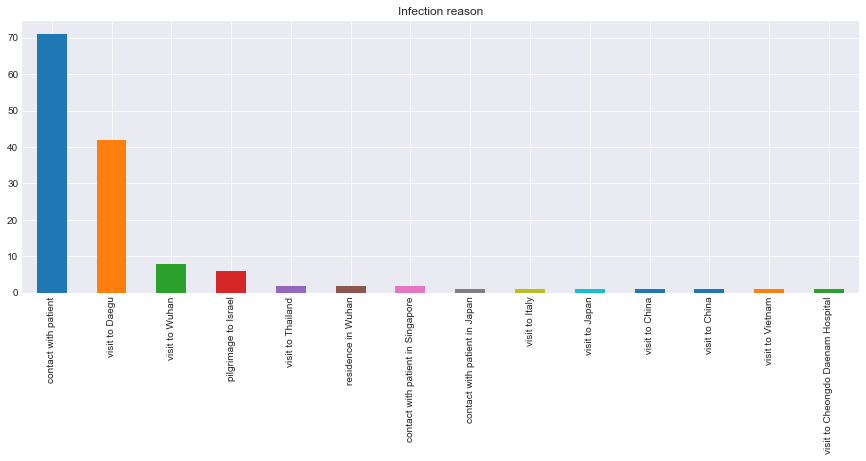

In [0]:
plt.figure(figsize=(15,5))
plt.title('Infection reason')
df_patient.infection_reason.value_coundata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA2IAAAFNCAYAAABiytxYAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAFW5JREFUeJzt3WuMnHXB/vFru2tb220ZCot4AikBCSSEoEBIAGkQ6qFUSIqFkjVo0UAQxGIKlh4IUtAIimmESgMSCwpGMWDwXBKwGKEiNIIN1HIwLYcW6GKHlu12O88r9/nzhz6F6e5vtjOfzyt2DptrXzDb79733NNWq9VqAQAAoJgRjR4AAADQaoQYAABAYUIMAACgMCEGAABQmBADAAAoTIgBAAAU1tHoAQBQj8ceeyzXXXddenp6UqvVsu++++bSSy/NQQcd1OhpALBTbT5HDIDdzdatW3P88cfnlltuyWGHHZYkufvuu/P9738/y5YtS3t7e4MXAsD/zamJAOx2tmzZkk2bNmXz5s0Dt02dOjXz5s1Lf39/7rvvvpxxxhk57bTTcuaZZ+bRRx9Nknzzm9/M1772tSTJ6tWrc+yxx2bNmjUN+RkAaG2OiAGwW/rxj3+c66+/PnvvvXeOPPLIHHPMMfnsZz+bl156KRdeeGF+8pOfZM8998zq1avzxS9+MX/4wx+SJKeffnrOO++83HzzzfnKV76SqVOnNvgnAaAVCTEAdlvVajUrVqzIihUrsmzZsiTJjBkzcsMNN2TfffcdeNyrr76aJUuW5JBDDsk///nPfP7zn8/UqVNz9dVXN2o6AC3OxToA2O088sgjefTRR3Puuedm0qRJmTRpUmbNmpUpU6akWq3m2GOPzfXXXz/w+BdeeCH77LNPkuSZZ55JpVLJqlWrsnXr1owcObJRPwYALcx7xADY7UyYMCE33nhj/va3vw3ctmHDhlSr1Zx00kl58MEHB977df/992fq1Kl54403snbt2ixcuDC33HJLJk6cmGuvvbZRPwIALc6piQDslv76179m0aJFefHFFzNq1KiMGzcuF1xwQU444YT89re/zeLFi1Or1dLR0ZE5c+bkiCOOyNlnn51TTjklM2fOzGuvvZZTTz01V155ZU488cRG/zgAtBghBgAAUJhTEwEAAAoTYgAAAIUJMQAAgMKEGAAAQGFD9jliGzZsGqpvDS2hs3NUqtXeRs8AoIX5XQS7pqtr3A7vc0QMhqmOjvZGTwCgxfldBENHiAEAABQmxAAAAAoTYgAAAIUJMQAAgMKEGAAAQGFCDAAAoDAhBgAAUJgQAwAAKEyIAQAAFPaOQmzlypXp7u5+022//vWvM3369CEZBQAA0Mw6dvaAJUuW5J577sl73/vegdtWrVqVX/ziF6nVakM6DgAAoBntNMT222+/LFq0KLNnz06SbNy4Mddee23mzJmTefPm7fB5nZ2j0tHRPnhLGXQHzftdoyfAbm31tz7V6AkAQ6q9fUQqlTGNngFNaachNnny5KxduzZJ0t/fn8svvzxz5szJqFGj/s/nVau9g7MQYJjq6dnc6AkAQ6pSGeO1DnZBV9e4Hd73ri7W8cQTT+S5557LFVdckVmzZuVf//pXFi5cuMsDAQAAWslOj4j9vw4//PDce++9SZK1a9dm1qxZufzyy4dkGAAAQLNy+XoAAIDC2mpDdOnDDRs2DcW3ZRAddd0DjZ4Au7UVl5zQ6AkAQ8p7xGDXDNp7xAAAANh1QgwAAKAwIQYAAFCYEAMAAChMiAEAABQmxAAAAAoTYgAAAIUJMQAAgMKEGAAAQGFCDAAAoDAhBgAAUJgQAwAAKEyIAQAAFCbEAAAAChNiAAAAhQkxAACAwoQYAABAYUIMAACgMCEGAABQmBADAAAoTIgBAAAUJsQAAAAKE2IAAACFCTEAAIDChBgAAEBhQgwAAKAwIQYAAFCYEAMAAChMiAEAABT2jkJs5cqV6e7uTpKsWrUqM2bMSHd3d2bOnJmXX355SAcCAAA0m52G2JIlSzJ37tz09vYmSRYuXJh58+Zl6dKlOfnkk7NkyZIhHwkAANBMOnb2gP322y+LFi3K7NmzkyTf+973ss8++yRJ+vv7M2rUqLd9XmfnqHR0tA/iVIDhpVIZ0+gJAEOqvX2E1zoYIjsNscmTJ2ft2rUDX/83wv7+97/ntttuy+233/62z6tWewdpIsDw1NOzudETAIZUpTLGax3sgq6ucTu8b6ch9nZ+85vf5MYbb8xNN92UCRMm1D0MAACgFb3rELv77rtz5513ZunSpalUKkOxCQAAoKm9qxDr7+/PwoUL8/73vz8XXnhhkuSoo47KRRddNCTjAAAAmtE7CrEPfehD+fnPf54kefjhh4d0EAAAQLPzgc4AAACFCTEAAIDChBgAAEBhQgwAAKAwIQYAAFCYEAMAAChMiAEAABQmxAAAAAoTYgAAAIUJMQAAgMKEGAAAQGFCDAAAoDAhBgAAUJgQAwAAKEyIAQAAFCbEAAAAChNiAAAAhQkxAACAwoQYAABAYUIMAACgMCEGAABQmBADAAAoTIgBAAAUJsQAAAAKE2IAAACFCTEAAIDChBgAAEBhQgwAAKAwIQYAAFDYOwqxlStXpru7O0ny3HPP5ayzzsqMGTOyYMGCbN++fUgHAgAANJudhtiSJUsyd+7c9Pb2JkmuueaaXHzxxfnpT3+aWq2WZcuWDflIAACAZtKxswfst99+WbRoUWbPnp0keeKJJ3L00UcnSU444YQ8+OCDOfnkk9/yvM7OUenoaB/kuQDDR6UyptETAIZUe/sIr3UwRHYaYpMnT87atWsHvq7Vamlra0uSjB07Nps2bXrb51WrvYM0EWB46unZ3OgJAEOqUhnjtQ52QVfXuB3e964v1jFixP8+5fXXX8/48ePrWwUAANCi3nWIHXrooXnooYeSJA888EA+/vGPD/ooAACAZvauQ+zSSy/NokWLMn369PT19WXy5MlDsQsAAKBptdVqtdpQfOMNG97+vWMMH0dd90CjJ8BubcUlJzR6AsCQ8h4x2DWD+h4xAAAAdo0QAwAAKEyIAQAAFCbEAAAAChNiAAAAhQkxAACAwoQYAABAYUIMAACgMCEGAABQmBADAAAoTIgBAAAUJsQAAAAKE2IAAACFCTEAAIDChBgAAEBhQgwAAKAwIQYAAFCYEAMAAChMiAEAABQmxAAAAAoTYgAAAIUJMQAAgMKEGAAAQGFCDAAAoDAhBgAAUJgQAwAAKEyIAQAAFCbEAAAAChNiAAAAhXXU86S+vr5cdtllWbduXUaMGJFvfetbOfDAAwd7GwAAQFOq64jY/fffn23btuWOO+7IBRdckOuvv36wdwEAADStuo6IHXDAAenv78/27dtTrVbT0fHWb9PZOSodHe27PBBguKpUxjR6AsCQam8f4bUOhkhdITZmzJisW7cun/70p7Nx48YsXrz4LY+pVnt3eRzAcNbTs7nREwCGVKUyxmsd7IKurnE7vK+uUxNvvfXWHHfccfn973+fu+++O5dddll6e4UXAADAO1HXEbHx48fnPe95T5Jkjz32yLZt29Lf3z+owwAAAJpVXSF2zjnnZM6cOZkxY0b6+vry9a9/PWPGOH8YAADgnagrxMaOHZsf/OAHg70FAACgJfhAZwAAgMKEGAAAQGFCDAAAoDAhBgAAUJgQAwAAKEyIAQAAFCbEAAAAChNiAAAAhQkxAACAwoQYAABAYUIMAACgMCEGAABQmBADAAAoTIgBAAAUJsQAAAAKE2IAAACFCTEAAIDChBgAAEBhQgwAAKAwIQYAAFCYEAMAAChMiAEAABQmxAAAAAoTYgAAAIUJMQAAgMKEGAAAQGFCDAAAoDAhBgAAUJgQAwAAKKyj3if+6Ec/yn333Ze+vr6cddZZOeOMMwZzFwAAQNOqK8QeeuihPProo/nZz36WLVu25JZbbhnsXQAAAE2rrhBbvnx5Dj744FxwwQWpVquZPXv2Wx7T2TkqHR3tuzwQYLiqVMY0egLs1t6zcEKjJ/AOdDV6ADvUd/mrjZ7ALqgrxDZu3Jjnn38+ixcvztq1a3P++efnd7/7Xdra2gYeU632DtpIgOGop2dzoyfAbs0/8GHX+D00/HV1jdvhfXWFWKVSycSJEzNy5MhMnDgxo0aNyquvvpq99tqr7pEAAACtoq6rJn7sYx/Ln//859Rqtbz00kvZsmVLKpXKYG8DAABoSnUdEZs0aVJWrFiRadOmpVarZf78+Wlv934wAACAd6Luy9e/3QU6AAAA2Dkf6AwAAFCYEAMAAChMiAEAABQmxAAAAAoTYgAAAIUJMQAAgMKEGAAAQGFCDAAAoDAhBgAAUJgQAwAAKEyIAQAAFCbEAAAAChNiAAAAhQkxAACAwoQYAABAYUIMAACgMCEGAABQmBADAAAoTIgBAAAUJsQAAAAKE2IAAACFCTEAAIDChBgAAEBhQgwAAKAwIQYAAFCYEAMAAChMiAEAABQmxAAAAAoTYgAAAIXtUoi98sor+cQnPpE1a9YM1h4AAICmV3eI9fX1Zf78+Rk9evRg7gEAAGh6HfU+8Tvf+U7OPPPM3HTTTW97f2fnqHR0tNc9DGC4q1TGNHoCAC3M76HdW10hdtddd2XChAk5/vjjdxhi1WrvLg0DGO56ejY3egLs1roaPQB2c34PDX9dXeN2eF9dpyb+8pe/zF/+8pd0d3dn1apVufTSS7Nhw4a6BwIAALSSuo6I3X777QP/3d3dnSuuuCJdXf6uBQAA8E64fD0AAEBhdV+s47+WLl06GDsAAABahiNiAAAAhQkxAACAwoQYAABAYUIMAACgMCEGAABQmBADAAAoTIgBAAAUJsQAAAAKE2IAAACFCTEAAIDChBgAAEBhQgwAAKAwIQYAAFCYEAMAAChMiAEAABQmxAAAAAoTYgAAAIUJMQAAgMKEGAAAQGFCDAAAoDAhBgAAUJgQAwAAKEyIAQAAFCbEAAAAChNiAAAAhQkxAACAwoQYAABAYUIMAACgMCEGAABQWEc9T+rr68ucOXOybt26bN26Neeff35OOumkwd4GAADQlOoKsXvuuSeVSiXf/e53s3Hjxpx++ulCDAAA4B2qK8Q+9alPZfLkyQNft7e3v+UxnZ2j0tHx1tsBmkWlMqbREwBoYX4P7d7qCrGxY8cmSarVai666KJcfPHFb3lMtdq7a8sAhrmens2NngC7ta5GD4DdnN9Dw19X17gd3lf3xTpeeOGFfOELX8jnPve5nHrqqfV+GwAAgJZT1xGxl19+OV/60pcyf/78HHvssYO9CQAAoKnVdURs8eLF+c9//pMbbrgh3d3d6e7uzhtvvDHY2wAAAJpSXUfE5s6dm7lz5w72FgAAgJbgA50BAAAKE2IAAACFCTEAAIDChBgAAEBhQgwAAKAwIQYAAFCYEAMAAChMiAEAABQmxAAAAAoTYgAAAIUJMQAAgMKEGAAAQGFCDAAAoDAhBgAAUJgQAwAAKEyIAQAAFCbEAAAAChNiAAAAhQkxAACAwoQYAABAYUIMAACgMCEGAABQmBADAAAoTIgBAAAUJsQAAAAKE2IAAACFCTEAAIDChBgAAEBhHfU8afv27bniiivy5JNPZuTIkbnqqquy//77D/Y2AACAplTXEbE//elP2bp1a+68885ccskl+fa3vz3YuwAAAJpWXSH2yCOP5Pjjj0+SHHHEEXn88ccHdRQAAEAzq+vUxGq1ms7OzoGv29vbs23btnR0/O+36+oat+vrGFLPfvuzjZ4AQCu74rVGL4DdWlejB7BL6joi1tnZmddff33g6+3bt78pwgAAANixukLsyCOPzAMPPJAkeeyxx3LwwQcP6igAAIBm1lar1Wrv9kn/vWriU089lVqtlquvvjoHHnjgUOwDAABoOnWFGAAAAPXzgc4AAACFCTEYZp599tncf//9efHFF+OANQBAc3KpQxhGbrvttvzxj3/Ma6+9ltNOOy3//ve/M3/+/EbPAqBFVKvVLFmyJBs2bMiJJ56Yj370o9l///0bPQuakiNiMIzce++9ufXWWzNu3Licc845WblyZaMnAdBC5syZkw9/+MN59tlns/fee+fyyy9v9CRoWkIMhpH/norY1taWJBk5cmQj5wDQYnp6ejJt2rR0dHTkyCOPdIo8DCGnJsIwMmXKlJx99tl5/vnn8+Uvfzmf/OQnGz0JgBazZs2aJMmLL76YESP8zR6GisvXwzCzZs2aPPXUUznggANyyCGHNHoOAC3kySefzPz587NmzZpMnDgxCxYsyGGHHdboWdCUhBgMA9ddd93A6Yj/v1mzZhVeAwDAUHNqIgwDEydObPQEAFrYcccdt8P7li9fXnAJtA5HxGAY2bZtW/7xj39k27ZtqdVqWb9+faZMmdLoWQAADDJHxGAY+epXv5q+vr6sX78+/f392WeffYQYAMU89thjueuuu9LX15ckWb9+fW6++eYGr4Lm5FI4MIxUq9XcfPPNOfzww3PXXXelt7e30ZMAaCFXXXVVjj766FSr1XzgAx9IpVJp9CRoWkIMhpH29vYkyZYtWzJ69Ohs3bq1wYsAaCXjx4/PlClT0tnZmQsvvDAvvfRSoydB0xJiMIyccsop+eEPf5hDDjkk06dPz7hx4xo9CYAW0tbWltWrV2fLli15+umns2HDhkZPgqblPWIwjOy7775Zvnx5+vr6Mnr06IEjZABQwmWXXZbVq1enu7s73/jGN3LWWWc1ehI0LVdNhGFk8uTJufLKK7PHHnsM3OZDnQEoqVqtpre3N7VaLW1tbdlrr70aPQmakiNiMIwcdNBBOeaYYxo9A4AWNXv27DzyyCMZP378QIj96le/avQsaEpCDIaRk046KdOnT3/TBzxfc801DVwEQCt55plnsmzZskbPgJYgxGAYWbp0ac4991wX6QCgIQ4//PA8/fTTb/qDIDA0hBgMI3vvvXc+85nPNHoGAC2qs7Mz06ZNy5gxYwZuW758eQMXQfMSYjCMjB49OjNnzsyhhx6atra2JMmsWbMavAqAVvHQQw/l4YcfTkeHfyLCUPN/GQwjkyZNavQEAFrYRz7ykbzyyit53/ve1+gp0PRcvh4AgCTJKaecknXr1qVSqQycmeHURBgaQgwAAKAwpyYCAJAkWb16dRYsWJBNmzbl1FNPzUEHHeS0eRgiIxo9AACA4eGqq67KNddck0qlkmnTpmXRokWNngRNS4gBADBg//33T1tbWyZMmJCxY8c2eg40LSEGANDiNm3alCTZY489cscdd2TLli259957M378+AYvg+YlxAAAWtx5552XJBk7dmzWrVuXPffcM48//niuvvrqBi+D5uWqiQAALW7mzJnp6enJc889lwMPPHDg9ra2ttxxxx0NXAbNS4gBALS47du3Z/369Zk/f34WLFjwpvs++MEPNmgVNDchBgAAUJj3iAEAABQmxAAAAAoTYgAAAIUJMQAAgML+B1vTbXBRrW2FAAAAAElFTkSuQmCCts().plot.bar();

In [0]:
df_route = pd.read_csv('H:/DATA_SET/coronavirusdataset/route.csv')
df_route.head()

,id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


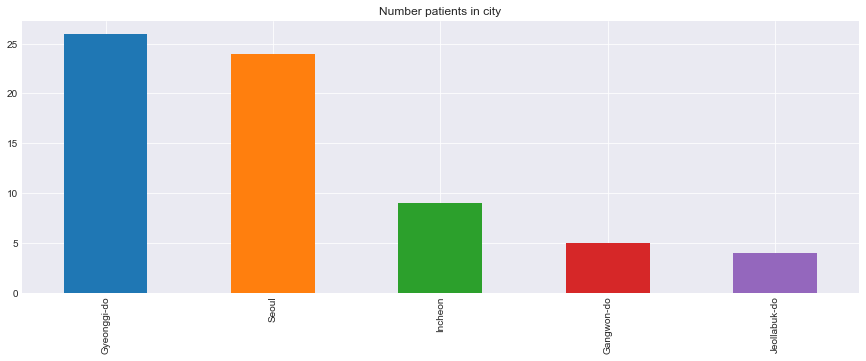

In [0]:
plt.figure(figsize=(15,5))
plt.title('Number patients in city')
df_route.province.value_counts().plot.bar();

In [0]:
data = daily_count.resample('Ddata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA2IAAAFpCAYAAAD+95t4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzt3XlYlWXCx/Hf4YC4oKGCyxuCYJpp5d6Mo+lkKU6JaZJKRi5kY4rmmF4SLlmYy6Bll6WNjjrmWC4t6lte9c5ojmvmhpqmgvtCuAAhLixy3j+8PBMppoT388j5fv4653nOefhdnPvi8Dv3fZ7H4XK5XAIAAAAAGONldQAAAAAA8DQUMQAAAAAwjCIGAAAAAIZRxAAAAADAMIoYAAAAABhGEQMAAAAAwyhiAOABTpw4ofvvv19Lly4ttH3OnDmKi4srsZ/Trl077d69u8SOV1xLly7VwoULJUkff/yxZs2aVexjHT9+XIMHD76t54waNUobN24s9s+8Ji0tTT179ix2DgCAfXlbHQAAYIaXl5cmT56sZs2aKSwszOo4d9S2bdtUt25dSVJUVNRvOtapU6d0+PDh23rOW2+99Zt+5jXVq1fXokWLip0DAGBfFDEA8BBly5ZV3759NXz4cC1atEhlypQptD8uLk5169ZVTEzMdffbtWunTp066dtvv9VPP/2kF198Udu3b9eePXvk7e2tmTNnqnr16pKkjz76SPv27VNubq769u2ryMhISdLq1as1c+ZM5eXlqWzZsho5cqSaNGmi6dOnKykpSadPn9b999+vKVOmuDOdOHFC0dHRevTRR7Vz5065XC6NHTtWzZs319mzZzV27FidO3dOZ86c0b333qtp06Zp+/btWr16tTZs2KCyZcsqPT1dGRkZGjt2rNLS0vTmm28qNTVVeXl5euqppzRgwACdOHFCffr0Udu2bbVz505lZWVpxIgRateunUaPHq20tDTFxMTob3/7mxISErR9+3b5+PgoKChIEydOVIUKFQr9LqOjo9WrVy89+OCDNzxu+/btr3t9vvnmG02bNk0FBQUqX7683njjDfn5+SkiIkJbt24tlKN58+ZKSUnR1KlTJUlbt27V+PHjtWzZspIbMACAO4qliQDgQV5++WWVL19e77zzzm0/NycnR0uWLNErr7yisWPHqnfv3lqxYoVq1qypzz//3P04X19fff7555o7d67efvttJScn68iRI3rnnXc0a9YsLVu2TAkJCRo8eLAuXrwoSTp58qQ+//zzQiXsmlOnTqlFixZavny5Xn31VQ0dOlR5eXn68ssv1bhxYy1evFirVq1S2bJltXz5crVv317t2rVTnz591KtXr0LHGjFihLp166bPPvtMn3zyiTZu3KiVK1dKurr0r3Xr1vrkk0/06quvasKECXI6nRo/fryCg4M1Z84cJSUl6bvvvtOKFSv02WefqVatWtq/f/9Nf283Ou4vnT17ViNGjNDEiRP1v//7v4qJiSn0u/hlju7du2vNmjXKzMyUJC1ZssS9hBEAcHdgRgwAPIiXl5cSExPVpUsXtW7d+rae26FDB0lSrVq1FBAQoPr160uSgoOD9dNPP7kfd60QVK9eXa1atdKmTZvkdDp1+vRp9enTx/04h8OhY8eOSZIaN24sb+8bvyXdc889ioiIkCS1bdtWTqdT+/fvV+/evbV161bNmzdPR44cUXJysho1alRk/osXL2rLli366aef9O6777q37du3Tw8//LB8fHzUtm1bSVKDBg3cJefn6tWrJ6fTqWeffVatW7dWeHi4Hn744Zv+3m7luNu3b1fdunXVoEEDSVd/1x06dNCJEydueMyqVavqj3/8o5YvX64uXbpo/fr1ev3112+aAwBgLxQxAPAwNWvW1BtvvKGRI0eqS5cu7u0Oh0Mul8t9Py8vr9Dzfr6U0cfHp8jje3n9d7FFQUGBvL29deXKFbVs2VLTpk1z70tNTVW1atX0r3/9S+XLly/yeE6ns9D9goICOZ1OJSYmateuXerWrZt+97vfKT8/v1D+XyooKJDL5dKiRYtUrlw5SVJ6erp8fX2VkZEhHx8fd3aHw3HDY1SqVEnLly/X9u3b9e2332ro0KGKiYm5bubt527luE6ns9A+l8ul/fv3y8/Pr8jj9urVS+PGjZO3t7c6dOhw3fJIAIC9sTQRADxQx44d1aZNG82fP9+9rXLlyvr+++8lXT1b33fffVesY19bpnjq1Clt2rRJLVu2VMuWLbVhwwYdPHhQkvSf//xHnTt31uXLl3/1eOnp6Vq7dq2kq98z8/HxUb169bR+/Xr17t1bXbp0UdWqVbVx40ZduXJF0tVik5+fX+g4fn5+aty4sebNmydJysrKUlRUlFatWnXTn+90Ot2l9JtvvlGfPn3UpEkTDR48WF26dHH/zn6LRo0a6eDBg0pOTpYkrVq1SiNGjCgyhyQ1bdpUXl5emjNnDssSAeAuxIwYAHio0aNHa9u2be770dHRGj58uMLDwxUUFKTf//73xTpuTk6Ounbtqry8PI0ePVqhoaGSpDfffFPDhg2Ty+Vyn+DjVmZxfH19tXz5ck2ZMkVly5bV+++/L6fTqUGDBumvf/2r3n33Xfn4+Khp06bupY5t2rTRpEmTrjvWlClTlJCQoIiICOXm5qpTp07q3LlzkUsAJem+++6Tr6+vIiMjtXjxYq1du1adOnVS+fLldc899yghIaFYv6efCwgI0JQpUzRy5EhduXJFfn5+132P7+c5li5dKofDoWeeeUYrV650LxMFANw9HK6breMAAMBCJ06cUEREhHbs2GF1FNvJz89XbGysOnfurCeffNLqOACA28TSRAAA7jIpKSlq2bKlKleurI4dO1odBwBQDMyIAQAAAIBhzIgBAAAAgGEUMQAAAAAwjCIGAAAAAIbdsdPXnzlz/k4d2iP5+fkqOzvH6hjAdRibsCvGJuyM8Qm7YmyWrMDAikXuY0bsLuHt7bQ6AnBDjE3YFWMTdsb4hF0xNs2hiAEAAACAYRQxAAAAADCMIgYAAAAAhlHEAAAAAMAwihgAAAAAGEYRAwAAAADDKGIAAAAAYBhFDAAAAAAMo4gBAAAAgGEUMQAAAAAwjCIGAAAAAIZ5Wx3Aai2mrrU6Qqmx5dU2VkcAAAAA7grMiAEAAACAYRQxAAAAADCMIgYAAAAAhlHEAAAAAMAwihgAAAAAGEYRAwAAAADDbnr6+ry8PMXHx+vkyZPKzc3Vyy+/rBo1amjAgAGqXbu2JCkqKkpPPvmkiawAAAAAUCrctIitWLFC/v7+SkxMVEZGhrp27apBgwapb9++6tevn6mMAAAAAFCq3LSIdezYUeHh4e77TqdT33//vQ4fPqxVq1YpJCRE8fHx8vPzu+NBAQAAAKC0cLhcLtevPSg7O1svv/yyunfvrtzcXN1///168MEHNXPmTGVlZWnkyJHXPefSpVx5ezvvSOiSVHfMV1ZHKDWSEzpaHQEWcDq9dOVKgdUxgOswNmFnjE/YFWOzZPn4FN2HbjojJkmpqakaNGiQnnvuOUVERCgrK0uVKlWSJLVv314JCQk3fF52dk4x4+JulZl50eoIsIC/f3lee9gSYxN2xviEXTE2S1ZgYMUi9930rIlnz55Vv379NGLECEVGRkqSYmJitGvXLknSpk2b1LBhwxKMCgAAAACl301nxD744ANlZWVpxowZmjFjhiQpLi5OEyZMkI+PjwICAoqcEQMAAAAA3NgtfUesOM6cOX8nDlviWkxda3WEUmPLq22sjgALsIQBdsXYhJ0xPmFXjM2SVeyliQAAAACAkkcRAwAAAADDKGIAAAAAYBhFDAAAAAAMo4gBAAAAgGG/ekFnANYIfD/I6gi3LNDqALfgzKATVkcAAABwY0YMAAAAAAyjiAEAAACAYRQxAAAAADCMIgYAAAAAhlHEAAAAAMAwihgAAAAAGEYRAwAAAADDKGIAAAAAYBhFDAAAAAAMo4gBAAAAgGEUMQAAAAAwjCIGAAAAAIZRxAAAAADAMIoYAAAAABhGEQMAAAAAwyhiAAAAAGAYRQwAAAAADKOIAQAAAIBhFDEAAAAAMIwiBgAAAACGUcQAAAAAwDCKGAAAAAAYRhEDAAAAAMMoYgAAAABgGEUMAAAAAAyjiAEAAACAYRQxAAAAADCMIgYAAAAAhlHEAAAAAMAwihgAAAAAGEYRAwAAAADDKGIAAAAAYBhFDAAAAAAMo4gBAAAAgGEUMQAAAAAwzPtmO/Py8hQfH6+TJ08qNzdXL7/8su677z7FxcXJ4XCobt26ev311+XlRZ8DAAAAgFt10yK2YsUK+fv7KzExURkZGeratavq16+voUOH6ne/+53Gjh2rVatWqX379qbyAgAAAMBd76ZTWR07dtQrr7zivu90OrVnzx498sgjkqQ2bdpo48aNdzYhAAAAAJQyN50Rq1ChgiQpOztbQ4YM0dChQzV58mQ5HA73/vPnz9/wuX5+vvL2dpZwXNiZv395qyMARWJ8eh6n04vXHbbF+IRdMTbNuWkRk6TU1FQNGjRIzz33nCIiIpSYmOjed+HCBVWqVOmGz8vOzim5lLgrZGZetDpCqRJodYBShvHpefz9y/O6w7YYn7ArxmbJCgysWOS+my5NPHv2rPr166cRI0YoMjJSktSgQQNt3rxZkrR27Vo1b968BKMCAAAAQOl30yL2wQcfKCsrSzNmzFB0dLSio6M1dOhQTZ8+XT169FBeXp7Cw8NNZQUAAACAUuGmSxNHjx6t0aNHX7f9n//85x0LBAAAAAClHRcAAwAAAADDKGIAAAAAYBhFDAAAAAAMo4gBAAAAgGEUMQAAAAAwjCIGAAAAAIZRxAAAAADAMIoYAAAAABhGEQMAAAAAwyhiAAAAAGAYRQwAAAAADKOIAQAAAIBhFDEAAAAAMIwiBgAAAACGUcQAAAAAwDCKGAAAAAAYRhEDAAAAAMMoYgAAAABgGEUMAAAAAAyjiAEAAACAYRQxAAAAADCMIgYAAAAAhlHEAAAAAMAwihgAAAAAGEYRAwAAAADDKGIAAAAAYBhFDAAAAAAMo4gBAAAAgGEUMQAAAAAwjCIGAAAAAIZRxAAAAADAMIoYAAAAABhGEQMAAAAAwyhiAAAAAGAYRQwAAAAADKOIAQAAAIBhFDEAAAAAMIwiBgAAAACGUcQAAAAAwDCKGAAAAAAYRhEDAAAAAMMoYgAAAABg2C0VsZ07dyo6OlqStGfPHj366KOKjo5WdHS0Vq5ceUcDAgAAAEBp4/1rD5g9e7ZWrFihcuXKSZL27t2rvn37ql+/fnc8HAAAAACURr86IxYcHKzp06e773///fdas2aNevXqpfj4eGVnZ9/RgAAAAABQ2vzqjFh4eLhOnDjhvv/www/r2Wef1YMPPqiZM2fq/fff18iRI697np+fr7y9nSWbFrbm71/e6ghAkRifnsfp9OJ1h20xPmFXjE1zfrWI/VL79u1VqVIl9+2EhIQbPi47O+e3JcNdJzPzotURSpVAqwOUMoxPz+PvX57XHbbF+IRdMTZLVmBgxSL33fZZE2NiYrRr1y5J0qZNm9SwYcPiJwMAAAAAD3TbM2Ljxo1TQkKCfHx8FBAQUOSMGAAAAADgxm6piAUFBWnJkiWSpIYNG2rRokV3NBQAAAAAlGZc0BkAAAAADKOIAQAAAIBhFDEAAAAAMIwiBgAAAACGUcQAAAAAwDCKGAAAAAAYRhEDAAAAAMMoYgAAAABgGEUMAAAAAAyjiAEAAACAYRQxAAAAADCMIgYAAAAAhlHEAAAAAMAwihgAAAAAGEYRAwAAAADDKGIAAAAAYBhFDAAAAAAMo4gBAAAAgGEUMQAAAAAwjCIGAAAAAIZRxAAAAADAMIoYAAAAABhGEQMAAAAAwyhiAAAAAGAYRQwAAAAADKOIAQAAAIBhFDEAAAAAMIwiBgAAAACGUcQAAAAAwDCKGAAAAAAYRhEDAAAAAMMoYgAAAABgGEUMAAAAAAyjiAEAAACAYRQxAAAAADCMIgYAAAAAhlHEAAAAAMAwihgAAAAAGEYRAwAAAADDKGIAAAAAYBhFDAAAAAAMo4gBAAAAgGG3VMR27typ6OhoSdLRo0cVFRWl5557Tq+//roKCgruaEAAAAAAKG1+tYjNnj1bo0ePVk5OjiRp4sSJGjp0qD766CO5XC6tWrXqjocEAAAAgNLkV4tYcHCwpk+f7r6/Z88ePfLII5KkNm3aaOPGjXcuHQAAAACUQt6/9oDw8HCdOHHCfd/lcsnhcEiSKlSooPPnz9/weX5+vvL2dpZQTNwN/P3LWx0BKBLj0/M4nV687rAtxifsirFpzq8WsV/y8vrvJNqFCxdUqVKlGz4uOzun+KlwV8rMvGh1hFIl0OoApQzj0/P4+5fndYdtMT5hV4zNkhUYWLHIfbd91sQGDRpo8+bNkqS1a9eqefPmxU8GAAAAAB7otovYyJEjNX36dPXo0UN5eXkKDw+/E7kAAAAAoNS6paWJQUFBWrJkiSQpNDRU//znP+9oKAAAAAAozbigMwAAAAAYRhEDAAAAAMMoYgAAAABgGEUMAAAAAAyjiAEAAACAYbd9QWcAgGdrt/IPVkcoVVY/udHqCAAACzAjBgAAAACGUcQAAAAAwDCKGAAAAAAYRhEDAAAAAMMoYgAAAABgGEUMAAAAAAyjiAEAAACAYRQxAAAAADCMIgYAAAAAhlHEAAAAAMAwihgAAAAAGEYRAwAAAADDKGIAAAAAYBhFDAAAAAAMo4gBAAAAgGEUMQAAAAAwjCIGAAAAAIZRxAAAAADAMIoYAAAAABhGEQMAAAAAwyhiAAAAAGAYRQwAAAAADKOIAQAAAIBhFDEAAAAAMIwiBgAAAACGUcQAAAAAwDCKGAAAAAAYRhEDAAAAAMMoYgAAAABgGEUMAAAAAAyjiAEAAACAYRQxAAAAADCMIgYAAAAAhlHEAAAAAMAwihgAAAAAGEYRAwAAAADDvIv7xC5duqhixYqSpKCgIE2cOLHEQgEAAABAaVasIpaTkyNJWrBgQYmGAQAAAABPUKylifv27dOlS5fUr18/vfDCC0pKSirpXAAAAABQahVrRqxs2bKKiYnRs88+qyNHjqh///766quv5O3938P5+fnK29tZYkFhf/7+5a2OABSJ8Qm7YmyWrJSHHrQ6wi05a3WAW3Tf7u+tjgDDnE4v/i4ZUqwiFhoaqpCQEDkcDoWGhsrf319nzpxRzZo13Y/Jzs4psZC4O2RmXrQ6QqkSaHWAUobxCbtibMLOGJ+ex9+/PK97CQoMrFjkvmItTfzkk080adIkSVJaWpqys7MVGMi/jQAAAABwK4o1IxYZGanXXntNUVFRcjgcmjBhQqFliQAAAACAohWrPZUpU0ZTp04t6SwAAAAA4BG4oDMAAAAAGEYRAwAAAADDKGIAAAAAYBhFDAAAAAAMo4gBAAAAgGGccx4AAAC4w5aM2WJ1hFKle0ILqyP8ZsyIAQAAAIBhFDEAAAAAMIwiBgAAAACGUcQAAAAAwDCKGAAAAAAYRhEDAAAAAMMoYgAAAABgGEUMAAAAAAyjiAEAAACAYRQxAAAAADCMIgYAAAAAhlHEAAAAAMAwihgAAAAAGEYRAwAAAADDKGIAAAAAYBhFDAAAAAAMo4gBAAAAgGEUMQAAAAAwjCIGAAAAAIZRxAAAAADAMIoYAAAAABhGEQMAAAAAwyhiAAAAAGAYRQwAAAAADKOIAQAAAIBhFDEAAAAAMIwiBgAAAACGUcQAAAAAwDCKGAAAAAAYRhEDAAAAAMMoYgAAAABgGEUMAAAAAAyjiAEAAACAYRQxAAAAADCMIgYAAAAAhlHEAAAAAMAw7+I8qaCgQOPGjdP+/ftVpkwZjR8/XiEhISWdDQAAAABKpWLNiP373/9Wbm6uFi9erFdffVWTJk0q6VwAAAAAUGoVq4ht27ZNjz76qCSpcePG+v7770s0FAAAAACUZsVampidnS0/Pz/3fafTqfz8fHl7//dwgYEVf3s6A45MesrqCMCNjfvJ6gSlSqDVAUqR3b13Wx0BKFLgvh+sjgDc0KAP2lkdATZTrBkxPz8/XbhwwX2/oKCgUAkDAAAAABStWEWsadOmWrt2rSQpKSlJ9erVK9FQAAAAAFCaOVwul+t2n3TtrIkHDhyQy+XShAkTVKdOnTuRDwAAAABKnWIVMQAAAABA8fHFLpvLzMzUsWPHFBQUpCpVqlgdBwAA/AbJyclKSUlR7dq19cADD1gdB3D7z3/+o+TkZNWuXVtPPPGE1XE8AjNiNrZy5Uq9++67qlOnjpKTkxUbG6unn37a6ljwYK1bty5y3/r16w0mAYq2YcMGzZs3T7m5ue5tH374oYWJgKs+/PBDffHFF2rUqJF27NihP/3pT4qJibE6FqCpU6fqyJEjatasmbZu3aqgoCDFxcVZHavUo4jZWI8ePTR37lxVqFBB2dnZ6t27tz799FOrYwGArXXq1Enx8fGqUaOGe1tYWJiFiYCrevTooYULF8rb21t5eXnq2bMn7+uwhZ49e2rRokWSJJfLpe7du2vp0qUWpyr9WJpoYw6HQxUqVJB09ZIBvr6+FicCrnrttdeu2zZx4kQLkgDXq1mzpv7whz9YHQO4jsvlcl/ux8fHRz4+PhYnAq7Kz89XQUGBvLy85HK55HA4rI7kEShiNhYcHKxJkyapefPm2rp1q4KDg62OBEiSnnzySUlX/6nYu3evTp8+bXEi4L+qVq2qsWPHqkGDBu5/Jnr06GFxKkBq1qyZhgwZombNmmnbtm1q0qSJ1ZEASVff16OiotSoUSPt2rXL/T6PO4uliTaWn5+vxYsX6+DBg6pTp466d+/Op2ewpX79+mnu3LlWxwAkSe+9995122JjYy1IAlxvzZo17vf1P/7xj1bHAdwOHDigQ4cOKSwsjGsEG0IRs6EtW7YUua9FixYGkwA39vMTc5w5c0bz5s3TihUrLEwEFLZmzRolJycrNDSUs3/BcsuWLStyX5cuXQwmAQq70QdX1/AB1p3H0kQb+vjjjyVJx44dU15enh566CHt3btXFSpU0IIFCyxOB0hffvml+3aZMmU0YcIEC9MAhU2dOlVHjx5V06ZNtWzZMm3btk0jR460OhY82MGDByVJSUlJKleunJo0aaLdu3crPz+fIgZLBQQESJL+/e9/KygoSE2bNtXu3buVmppqcTLPwIyYjb300kuaMWOGvL29deXKFb300kuaM2eO1bEASVeXMKSkpCg0NJRr4cBWOPsX7ComJqbQ+zjLumEXvxybffv21bx58yxM5Bm8rA6Aop05c8Z9+8qVK0pPT7cwDfBfCxYs0JgxY7Rjxw6NGTOGDwhgK9fO/iWJs3/BVtLT05WVlSVJysjIUGZmpsWJgKsyMjJ07NgxSdKhQ4eUnZ1tcSLPwNJEG4uMjNRTTz2levXqKSUlRUOGDLE6EiBJ+uKLL667Fg4XJYVdcPYv2NWAAQPUrVs3+fn5KTs7m8t+wDZGjRqlYcOG6fTp0woICFBiYqLVkTwCSxNtLjs7W4cOHVJQUJCqVKlidRxAktS9e3ctWbLEff/nS8EAO+DsX7CzU6dOqXr16nI6nVZHAQrZs2ePGjZsaHUMj8HSRJvz8/PTlClTKGGwlWvXwpk/f76GDBnCtXBgK2lpaZo1a5aWLl2qpKQk7dy50+pIQCFxcXGUMNjS5MmTrY7gUShidwEmLWE3I0eO1DPPPKMrV67omWee4Yx0sJUxY8aoW7duys3NVfPmzfXWW29ZHQkohPd12BVj0yyK2F2gWbNmVkcACsnOztaOHTuUkpKi3NxcHT161OpIgFtOTo5atmwph8OhsLAw+fr6Wh0JKKRjx45WRwBu6Pnnn5ck5eXlWZzEM1DEbGj37t2Srl40d/369WrevLn7NmAH8fHxqlWrlo4cOaKAgACNGjXK6kiAW5kyZbRu3ToVFBQoKSlJZcqUsToSIOnqh1grV65UhQoVtGzZspte6Bkw6e9//7skKTw8XPv371f37t0tTuQZOGuiDW3atEkPPfRQoYvmXtO6dWsLEgGFZWZmKjIyUitWrFDTpk1ZygBbSUhI0OTJk5WRkaG5c+dq3LhxVkcCJEkDBw5UtWrVVLNmTUni0gqwjQMHDujjjz/WxYsXtWzZMr3xxhtWR/IIFDEbeumllyRJsbGxhf5IXztVuI+Pj1XRALeDBw9Kkn788Ud5eTG5DvuoUaOGxowZo8uXL1sdBSjE5XJpypQpVscArjNp0iQNHz5c6enp+vTTT1lJYAinr7exiIgIpaWlKSwsTIcPH1a5cuWUn5+vESNG6Omnn7Y6HjzYgQMHNGbMGKWkpCgkJETjx49XgwYNrI4FSLp6so5vv/1WVatWdV/QmcsrwA7Gjx+viIgIPfDAA+5t/MMLK/Xo0cP9oX9eXp7279+vBx98UJL4u2kAM2I2FhQUpPnz56tKlSr66aefNHr0aCUkJKh///4UMVhiz549GjVqlJYuXaqYmBiNGzdOFy5cUGpqKkUMtrF//3793//9H8u+YDvfffedVq9e7b7vcDi0atUqCxPB07399ttWR/BoFDEbO3funPv6Yffcc4/Onj0rf39/loHBMu+8844mTZokHx8fTZs2TbNnz1ZISIhefPFFPf7441bHAyRJ1apV04ULF+Tn52d1FKCQFStWyOVyKT09Xf7+/lxLDJa79957JUnvvffedftiY2NNx/E4FDEba9CggYYNG6bGjRtrx44deuCBB7Ry5UpVrVrV6mjwUC6XS/Xr11daWpouXbqkhg0bShIfDsAWri2xOXfunDp06KBatWpJEksTYRubN29WfHy8KlasqKysLCUkJKhVq1ZWxwIUEBAg6er7/N69e1VQUGBxIs9AEbOxcePGadWqVTp48KC6dOmitm3b6tChQ3rsscesjgYPde0P87p169SyZUtJUm5uri5cuGBlLEBS4SU2174blpuby3dwYBvTpk3TRx99pOrVqystLU2xsbEUMdhCz549C91/8cUXLUriWShiNvbzaeLdu3dr3759qlGjhvtTXsC0li1bqmfPnvrxxx81c+bDaVhdAAAKDUlEQVRMHTt2TOPGjdOTTz5pdTTAvcRmyZIlSklJUXx8vPr166fOnTu79wFWcjqdql69uiSpevXqXGwctnH48GH37TNnzig1NdXCNJ6Dsyba2ODBg+Xr66vmzZtr586dSk1NVWBgoCQpMTHR4nTwVAcPHlSVKlVUuXJlHTt2TPv371f79u2tjgW4de3aVYsWLZKvr6/y8vL0/PPPa/HixVbHAjRgwAC1atVKLVq00JYtW/Ttt9/q/ffftzoWoOjoaPdtX19fRUdHq23bthYm8gzMiNlYVlaW5s+fL+nqlHG/fv2UmJioqKgoi5PBk9WpU8d9Ozg4WMHBwRamAa7n5eXlnmnw8fHh7ImwjcTERM2YMUPvvPOOwsLCNGHCBKsjAZKkBQsWKD09XSdPnlRISIgqVapkdSSPQBGzsfPnzys9PV1VqlRRRkaGzp8/r7y8PC5SCgA38fjjj+u5557Tww8/rD179qhdu3ZWRwIkXS1iHTp00PDhwzljImzl008/1ezZs1WnTh0dOnRIgwcP5msHBrA00ca++eYbvfXWW/Lz89PFixc1evRo7du3TxUqVFCvXr2sjgcAtvXDDz/o8OHDCgsLU/369a2OA0iStm3bptWrV2vbtm0KCQlRhw4duPQHbCEyMlILFy6Ur6+vLl68qN69e2vp0qVWxyr1KGI2V1BQoPT0dFWtWpXlNQBwC1JTU/XFF18oJyfHvY3r4cAuzp07p40bN2rhwoU6deqU1q5da3UkQC+++KL+9re/yel0qqCgQP3799ecOXOsjlXqsTTRxjZs2KB//OMfhf6Z+PDDDy1MBAD298orr6hly5aqWbOm1VGAQp5++ml5eXkpIiJCb775purVq2d1JHi4YcOGyeFwKD09Xc8884waNWqkvXv3qmzZslZH8wjMiNlYp06dFB8frxo1ari3hYWFWZgIAOyvb9++mjdvntUxgOt88cUXWr9+vVJTU1W/fn21bt1ajz76qNWx4MG+++67Ivc98sgjBpN4JoqYjfXv31+zZ8+2OgYA3FUmTJigRo0a6YEHHnAv6Q4NDbU4FXBVbm6uNm/erFmzZunIkSNat26d1ZEAZWZmav369crPz5fL5dLp06f15z//2epYpR5LE22satWqGjt2rBo0aOD+Z6JHjx4WpwIAe/vhhx+0b9++QttY1g07GDBggE6dOqXWrVvrL3/5i5o2bWp1JECSNGTIENWuXVsHDhyQr6+vypUrZ3Ukj0ARs7GgoCBJ0tmzZy1OAgD216NHDzkcDv1yoQcnOoJdDB06lLN4wrbefPNNvfbaa3rrrbc4O7chFDEbi42N1Zo1a5ScnKzQ0FA98cQTVkcCANt6++23rY4A3FT//v2Vnp6uypUrKzMzU2XKlFFAQIBef/11tWrVyup48HA5OTm6dOmSHA6HLl68aHUcj0ARs7GpU6fq6NGjatq0qZYtW6Zt27Zp5MiRVscCAFu69957rY4A3FSLFi0UGxursLAwHTt2TO+9954GDRqkESNGUMRgqV69eukf//iHWrVqpbZt26pZs2ZWR/IIFDEb27JlixYtWiRJ6t27t7p3725xIgAAUFw//vij++zHwcHBSk1NVUhIiJxOp8XJ4OnCw8Pdt//0pz/Jz8/PwjSegyJmY/n5+SooKJCXl5dcLhffcwAA4C4WGBioKVOmqEmTJtqxY4cCAgK0YcMG+fj4WB0NHurad2tv5NpkAO4cTl9vY3PnztXXX3+tRo0aadeuXerYsaP69OljdSwAAFAMOTk5Wrx4sQ4ePKh69eopMjJSe/fuVa1atRQQEGB1PHigkydPFrmP5d53HkXM5g4cOKBDhw4pLCxM9erVszoOAAAoJpfLpd27dysnJ8e9rUWLFhYmgqe72UmOhg0bZjCJZ2Jpoo2lpaVp1qxZysjIUHh4uC5duqRGjRpZHQsAABRDbGysMjIyVLNmTfdXDihisBIXu7cWRczGxowZo759+2rGjBlq3ry54uLitGTJEqtjAQCAYjh37hzfu4GtdO3aVdLV8xIsXrxYKSkpql27tqKioixO5hm8rA6AouXk5Khly5ZyOBwKCwuTr6+v1ZEAAEAxhYaGKi0tzeoYwHXGjh2r48ePq1WrVjp58qRGjx5tdSSPwIyYjZUpU0br1q1TQUGBkpKSVKZMGasjAQCAYtq+fbsee+wxValSxb1t/fr1FiYCrjp69KgWLlwoSXriiSfUs2dPixN5BoqYjSUkJGjy5MnKyMjQ3LlzNW7cOKsjAQCAYvr666+tjgDcUE5Oji5duqRy5crp8uXLunLlitWRPAJFzMZWrlypMWPGFPrkDAAA3J2SkpL02WefKS8vT5J0+vRpzZkzx+JUgPTCCy/o6aefVt26dZWSkqIhQ4ZYHckjUMRsrFy5cho4cKCqVaumbt26qU2bNlzUGQCAu9T48ePVp08fff3116pXr55yc3OtjgRIkjp37qw2bdro+PHjCgoKUuXKla2O5BE4WYeNRUVFadGiRRo8eLBWrFihxx57TNOnT1dWVpbV0QAAwG2qVKmSOnXqJD8/Pw0ePJgTd8A2kpOTNXDgQMXHx2vp0qX65ptvrI7kEShiNpaVlaWPP/5YY8aMUVZWlkaNGqX77rtPAwcOtDoaAAC4TQ6HQ8nJybp06ZIOHTqkM2fOWB0JkHR1tnbixIny9/dXZGSkpk+fbnUkj8DSRBuLjIzUI488ouHDh+vee+9VzZo1JUn79u2zOBkAALhdcXFx2rNnj6Kjo/XSSy/p+eeftzoS4BYSEiKHw6EqVaqoQoUKVsfxCMyI2VBKSopeeOEFffXVV9q6dasSExMVFRWldevWSZL+8pe/WJwQAADcqmvv63Xr1tUHH3ygv/71r8rLy1NYWJjV0QBJ0j333KNFixbp0qVL+vLLL1WpUiWrI3kEipgNTZkyRSNGjJCXl5cCAwO1ePFizZ8/X7NmzbI6GgAAuE3X3tclud/XP/zwQ82ePdviZPB0hw8f1uHDhzVw4EBt3rxZlStX1saNGzVhwgSro3kEliba0KVLl/TQQw9JkipWrCjp6nRxfn6+lbEAAEAx8L4Ouxo7dux125KSkvTpp5+qX79+FiTyLBQxG8rJyXHfnjFjhvu2tzcvFwAAdxve12FXCxYsuG5bQUGBoqOjKWIGsDTRhqpVq6Zdu3YV2rZr1y4FBgZalAgAABQX7+u4W1y5ckVbt27V5cuXrY7iERwul8tldQgUdvz4cQ0cOFC///3vFRISouPHj2vTpk364IMP9D//8z9WxwMAALeB93XcLS5evKi4uDj17dtXTZo0sTpOqUcRs6nLly9r9erVOnHihGrWrKnHH39c5cuXtzoWAAAoBt7XAfwSRQwAAAAADOM7YgAAAABgGEUMAAAAAAyjiAEAAACAYRQxAAAAADCMIgYAAAAAhv0/lnF/0JUxC4sAAAAASUVORK5CYII=').first().fillna(0).cumsum()
data = data[20:]
x = np.arange(len(data)).reshape(-1, 1)
y = data.values

In [0]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_=model.fit(x, y)

In [0]:
test = np.arange(len(data)+7).reshape(-1, 1)
pred = model.predict(test)
prediction = pred.round().astype(int)
week = [data.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

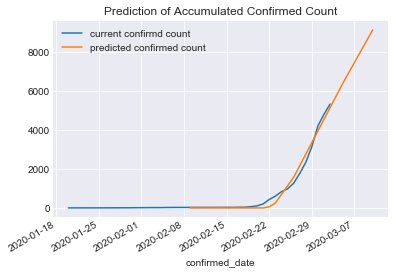

In [0]:
accumulated_count.plot()
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count')
plt.legend(['current confirmd count', 'predicted confirmed count'])
plt.show()